## Preprocessing

In [157]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, save_model, load_model
import numpy as np
import matplotlib.pyplot as plt

application_df = pd.read_csv("./Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [158]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME' and STATUS
application_df.drop(['EIN', 'NAME','STATUS'], axis=1, inplace=True)

In [159]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [160]:
# Look at APPLICATION_TYPE value counts for binning
application_value_counts = application_df['APPLICATION_TYPE'].value_counts()
application_value_counts


T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

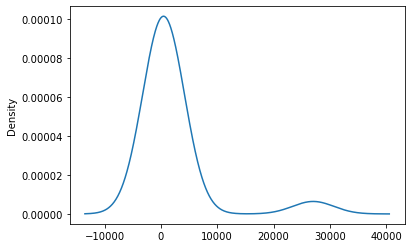

In [161]:
application_value_counts.plot(kind="density")

In [162]:
# Choose a cutoff value and create a list of application types to be replaced with less than 3 value counts.
# use the variable name `application_types_to_replace`
application_types_to_replace = application_df['APPLICATION_TYPE'].value_counts()[application_df['APPLICATION_TYPE'].value_counts() < 3].index.to_list()

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
T9         156
T13         66
T12         27
T2          16
Other        5
T25          3
T14          3
Name: APPLICATION_TYPE, dtype: int64

In [163]:
# Look at CLASSIFICATION value counts for binning
classification_value_counts = application_df["CLASSIFICATION"].value_counts()
classification_value_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C2561        1
C2600        1
C1570        1
C2170        1
C1900        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [164]:
# You may find it helpful to look at CLASSIFICATION value counts >1
application_df["CLASSIFICATION"].value_counts()[application_df["CLASSIFICATION"].value_counts() > 1]

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1237        9
C1235        9
C7210        7
C2400        6
C1720        6
C4100        6
C1600        5
C1257        5
C2710        3
C0           3
C1260        3
C1246        2
C3200        2
C1267        2
C1256        2
C1234        2
Name: CLASSIFICATION, dtype: int64

In [165]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = application_df["CLASSIFICATION"].value_counts()[application_df["CLASSIFICATION"].value_counts() < 500].index.to_list()

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: CLASSIFICATION, dtype: int64

In [166]:
# application_df = application_df.drop("INCOME_AMT", axis=1)

In [167]:
# Convert categorical data to numeric with `pd.get_dummies`
df = pd.get_dummies(application_df)

In [168]:
# Split our preprocessed data into our features and target arrays
X = df.drop("IS_SUCCESSFUL", axis=1)
y = df["IS_SUCCESSFUL"]

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

In [169]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [170]:
dim = X_train_scaled.shape[1]
dim

49

## Compile, Train and Evaluate the Model

In [176]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn_model = tf.keras.models.Sequential()


nn_model.add(tf.keras.layers.Dense(units=80, activation="relu", input_dim=dim))
nn_model.add(tf.keras.layers.Dense(units=55, activation="tanh"))
nn_model.add(tf.keras.layers.Dense(units=35, activation="tanh"))
nn_model.add(tf.keras.layers.Dense(units=25, activation="relu"))
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))



# Check the structure of the model
nn_model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 80)                4000      
_________________________________________________________________
dense_62 (Dense)             (None, 55)                4455      
_________________________________________________________________
dense_63 (Dense)             (None, 35)                1960      
_________________________________________________________________
dense_64 (Dense)             (None, 25)                900       
_________________________________________________________________
dense_65 (Dense)             (None, 1)                 26        
Total params: 11,341
Trainable params: 11,341
Non-trainable params: 0
_________________________________________________________________


In [177]:
# Compile the model
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

In [178]:
# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=125)

Train on 25724 samples
Epoch 1/125
25724/25724 [==============================] - 3s 111us/sample - loss: 0.5649 - accuracy: 0.7227
Epoch 2/125
25724/25724 [==============================] - 2s 75us/sample - loss: 0.5539 - accuracy: 0.7305
Epoch 3/125
25724/25724 [==============================] - 2s 75us/sample - loss: 0.5517 - accuracy: 0.7320
Epoch 4/125
25724/25724 [==============================] - 2s 76us/sample - loss: 0.5505 - accuracy: 0.7312
Epoch 5/125
25724/25724 [==============================] - 2s 75us/sample - loss: 0.5489 - accuracy: 0.7325
Epoch 6/125
25724/25724 [==============================] - 2s 75us/sample - loss: 0.5478 - accuracy: 0.7325
Epoch 7/125
25724/25724 [==============================] - 2s 75us/sample - loss: 0.5468 - accuracy: 0.7339
Epoch 8/125
25724/25724 [==============================] - 2s 80us/sample - loss: 0.5469 - accuracy: 0.7333
Epoch 9/125
25724/25724 [==============================] - 2s 81us/sample - loss: 0.5459 - accuracy: 0.7344
Epoc

Epoch 76/125
25724/25724 [==============================] - 3s 98us/sample - loss: 0.5327 - accuracy: 0.7418
Epoch 77/125
25724/25724 [==============================] - 3s 100us/sample - loss: 0.5328 - accuracy: 0.7415
Epoch 78/125
25724/25724 [==============================] - 3s 99us/sample - loss: 0.5328 - accuracy: 0.7415
Epoch 79/125
25724/25724 [==============================] - 3s 100us/sample - loss: 0.5333 - accuracy: 0.7416
Epoch 80/125
25724/25724 [==============================] - 3s 102us/sample - loss: 0.5324 - accuracy: 0.7418
Epoch 81/125
25724/25724 [==============================] - 3s 100us/sample - loss: 0.5324 - accuracy: 0.7411
Epoch 82/125
25724/25724 [==============================] - 3s 100us/sample - loss: 0.5323 - accuracy: 0.7416
Epoch 83/125
25724/25724 [==============================] - 3s 105us/sample - loss: 0.5327 - accuracy: 0.7416
Epoch 84/125
25724/25724 [==============================] - 3s 101us/sample - loss: 0.5322 - accuracy: 0.7423
Epoch 85/125

In [179]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/1 - 0s - loss: 0.5506 - accuracy: 0.7261
Loss: 0.558536191070045, Accuracy: 0.726064145565033


In [180]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','sigmoid'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=10,
        max_value=20,
        step=2), activation=activation, input_dim=X_train_scaled.shape[1]))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 8)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=10,
            max_value=20,
            step=2),
            activation=activation))
    
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_model

In [186]:
# Import the kerastuner library
import kerastuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=25,
    hyperband_iterations=2)

In [187]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=20,validation_data=(X_test_scaled,y_test))

Train on 25724 samples, validate on 8575 samples
Epoch 1/3
25724/25724 [==============================] - ETA: 11:48 - loss: 0.7688 - accuracy: 0.406 - ETA: 27s - loss: 0.6903 - accuracy: 0.5637  - ETA: 13s - loss: 0.6742 - accuracy: 0.590 - ETA: 9s - loss: 0.6524 - accuracy: 0.619 - ETA: 7s - loss: 0.6409 - accuracy: 0.63 - ETA: 5s - loss: 0.6340 - accuracy: 0.65 - ETA: 4s - loss: 0.6264 - accuracy: 0.66 - ETA: 4s - loss: 0.6216 - accuracy: 0.66 - ETA: 3s - loss: 0.6172 - accuracy: 0.67 - ETA: 3s - loss: 0.6142 - accuracy: 0.67 - ETA: 2s - loss: 0.6102 - accuracy: 0.68 - ETA: 2s - loss: 0.6088 - accuracy: 0.68 - ETA: 2s - loss: 0.6063 - accuracy: 0.68 - ETA: 2s - loss: 0.6048 - accuracy: 0.69 - ETA: 1s - loss: 0.6007 - accuracy: 0.69 - ETA: 1s - loss: 0.5988 - accuracy: 0.69 - ETA: 1s - loss: 0.5975 - accuracy: 0.69 - ETA: 1s - loss: 0.5945 - accuracy: 0.70 - ETA: 1s - loss: 0.5937 - accuracy: 0.70 - ETA: 1s - loss: 0.5931 - accuracy: 0.70 - ETA: 0s - loss: 0.5917 - accuracy: 0.70 - E

Train on 25724 samples, validate on 8575 samples
Epoch 1/3
25724/25724 [==============================] - ETA: 11:12 - loss: 0.6922 - accuracy: 0.625 - ETA: 23s - loss: 0.6849 - accuracy: 0.5399  - ETA: 12s - loss: 0.6786 - accuracy: 0.544 - ETA: 8s - loss: 0.6654 - accuracy: 0.574 - ETA: 6s - loss: 0.6511 - accuracy: 0.60 - ETA: 4s - loss: 0.6439 - accuracy: 0.62 - ETA: 4s - loss: 0.6414 - accuracy: 0.63 - ETA: 3s - loss: 0.6370 - accuracy: 0.63 - ETA: 3s - loss: 0.6295 - accuracy: 0.64 - ETA: 2s - loss: 0.6244 - accuracy: 0.65 - ETA: 2s - loss: 0.6205 - accuracy: 0.66 - ETA: 2s - loss: 0.6165 - accuracy: 0.66 - ETA: 1s - loss: 0.6125 - accuracy: 0.67 - ETA: 1s - loss: 0.6110 - accuracy: 0.67 - ETA: 1s - loss: 0.6085 - accuracy: 0.68 - ETA: 1s - loss: 0.6052 - accuracy: 0.68 - ETA: 1s - loss: 0.6029 - accuracy: 0.68 - ETA: 1s - loss: 0.6018 - accuracy: 0.68 - ETA: 0s - loss: 0.6006 - accuracy: 0.69 - ETA: 0s - loss: 0.5971 - accuracy: 0.69 - ETA: 0s - loss: 0.5955 - accuracy: 0.69 - E

Train on 25724 samples, validate on 8575 samples
Epoch 1/3
25724/25724 [==============================] - ETA: 7:47 - loss: 0.7807 - accuracy: 0.53 - ETA: 14s - loss: 0.7368 - accuracy: 0.5369 - ETA: 7s - loss: 0.7173 - accuracy: 0.525 - ETA: 4s - loss: 0.7054 - accuracy: 0.53 - ETA: 3s - loss: 0.6975 - accuracy: 0.55 - ETA: 2s - loss: 0.6907 - accuracy: 0.57 - ETA: 2s - loss: 0.6838 - accuracy: 0.58 - ETA: 2s - loss: 0.6788 - accuracy: 0.60 - ETA: 1s - loss: 0.6739 - accuracy: 0.61 - ETA: 1s - loss: 0.6679 - accuracy: 0.62 - ETA: 1s - loss: 0.6618 - accuracy: 0.63 - ETA: 1s - loss: 0.6569 - accuracy: 0.63 - ETA: 1s - loss: 0.6524 - accuracy: 0.64 - ETA: 0s - loss: 0.6486 - accuracy: 0.64 - ETA: 0s - loss: 0.6440 - accuracy: 0.65 - ETA: 0s - loss: 0.6412 - accuracy: 0.65 - ETA: 0s - loss: 0.6382 - accuracy: 0.66 - ETA: 0s - loss: 0.6352 - accuracy: 0.66 - ETA: 0s - loss: 0.6324 - accuracy: 0.66 - ETA: 0s - loss: 0.6309 - accuracy: 0.66 - ETA: 0s - loss: 0.6275 - accuracy: 0.67 - ETA: 0

Train on 25724 samples, validate on 8575 samples
Epoch 1/3
25724/25724 [==============================] - ETA: 8:13 - loss: 0.7365 - accuracy: 0.50 - ETA: 14s - loss: 0.7054 - accuracy: 0.5512 - ETA: 7s - loss: 0.6654 - accuracy: 0.617 - ETA: 4s - loss: 0.6441 - accuracy: 0.65 - ETA: 3s - loss: 0.6337 - accuracy: 0.66 - ETA: 3s - loss: 0.6211 - accuracy: 0.67 - ETA: 2s - loss: 0.6159 - accuracy: 0.67 - ETA: 2s - loss: 0.6111 - accuracy: 0.68 - ETA: 1s - loss: 0.6086 - accuracy: 0.68 - ETA: 1s - loss: 0.6030 - accuracy: 0.69 - ETA: 1s - loss: 0.5983 - accuracy: 0.69 - ETA: 1s - loss: 0.5941 - accuracy: 0.70 - ETA: 1s - loss: 0.5911 - accuracy: 0.70 - ETA: 0s - loss: 0.5886 - accuracy: 0.70 - ETA: 0s - loss: 0.5864 - accuracy: 0.70 - ETA: 0s - loss: 0.5857 - accuracy: 0.70 - ETA: 0s - loss: 0.5846 - accuracy: 0.70 - ETA: 0s - loss: 0.5837 - accuracy: 0.71 - ETA: 0s - loss: 0.5835 - accuracy: 0.71 - ETA: 0s - loss: 0.5825 - accuracy: 0.71 - ETA: 0s - loss: 0.5833 - accuracy: 0.70 - ETA: 0

Train on 25724 samples, validate on 8575 samples
Epoch 1/3
25724/25724 [==============================] - ETA: 9:39 - loss: 0.6879 - accuracy: 0.56 - ETA: 18s - loss: 0.7029 - accuracy: 0.4820 - ETA: 9s - loss: 0.6974 - accuracy: 0.509 - ETA: 6s - loss: 0.6961 - accuracy: 0.50 - ETA: 4s - loss: 0.6939 - accuracy: 0.52 - ETA: 3s - loss: 0.6933 - accuracy: 0.52 - ETA: 3s - loss: 0.6926 - accuracy: 0.52 - ETA: 2s - loss: 0.6916 - accuracy: 0.52 - ETA: 2s - loss: 0.6898 - accuracy: 0.52 - ETA: 2s - loss: 0.6886 - accuracy: 0.52 - ETA: 2s - loss: 0.6864 - accuracy: 0.54 - ETA: 1s - loss: 0.6841 - accuracy: 0.55 - ETA: 1s - loss: 0.6805 - accuracy: 0.56 - ETA: 1s - loss: 0.6762 - accuracy: 0.58 - ETA: 1s - loss: 0.6715 - accuracy: 0.59 - ETA: 1s - loss: 0.6671 - accuracy: 0.59 - ETA: 1s - loss: 0.6622 - accuracy: 0.60 - ETA: 0s - loss: 0.6583 - accuracy: 0.61 - ETA: 0s - loss: 0.6534 - accuracy: 0.62 - ETA: 0s - loss: 0.6489 - accuracy: 0.62 - ETA: 0s - loss: 0.6464 - accuracy: 0.63 - ETA: 0

Train on 25724 samples, validate on 8575 samples
Epoch 1/3
25724/25724 [==============================] - ETA: 12:05 - loss: 0.6925 - accuracy: 0.531 - ETA: 26s - loss: 0.6868 - accuracy: 0.5580  - ETA: 13s - loss: 0.6894 - accuracy: 0.546 - ETA: 9s - loss: 0.6897 - accuracy: 0.545 - ETA: 6s - loss: 0.6900 - accuracy: 0.54 - ETA: 5s - loss: 0.6905 - accuracy: 0.53 - ETA: 4s - loss: 0.6909 - accuracy: 0.53 - ETA: 4s - loss: 0.6910 - accuracy: 0.53 - ETA: 3s - loss: 0.6911 - accuracy: 0.53 - ETA: 3s - loss: 0.6914 - accuracy: 0.53 - ETA: 2s - loss: 0.6916 - accuracy: 0.52 - ETA: 2s - loss: 0.6917 - accuracy: 0.52 - ETA: 2s - loss: 0.6914 - accuracy: 0.53 - ETA: 2s - loss: 0.6914 - accuracy: 0.53 - ETA: 1s - loss: 0.6912 - accuracy: 0.53 - ETA: 1s - loss: 0.6912 - accuracy: 0.52 - ETA: 1s - loss: 0.6909 - accuracy: 0.52 - ETA: 1s - loss: 0.6900 - accuracy: 0.53 - ETA: 1s - loss: 0.6887 - accuracy: 0.53 - ETA: 1s - loss: 0.6866 - accuracy: 0.54 - ETA: 0s - loss: 0.6833 - accuracy: 0.55 - E

Train on 25724 samples, validate on 8575 samples
Epoch 1/3
25724/25724 [==============================] - ETA: 12:18 - loss: 0.7071 - accuracy: 0.406 - ETA: 31s - loss: 0.6904 - accuracy: 0.5326  - ETA: 15s - loss: 0.6859 - accuracy: 0.540 - ETA: 10s - loss: 0.6809 - accuracy: 0.567 - ETA: 8s - loss: 0.6750 - accuracy: 0.584 - ETA: 6s - loss: 0.6676 - accuracy: 0.60 - ETA: 5s - loss: 0.6587 - accuracy: 0.62 - ETA: 4s - loss: 0.6494 - accuracy: 0.63 - ETA: 4s - loss: 0.6435 - accuracy: 0.64 - ETA: 3s - loss: 0.6361 - accuracy: 0.65 - ETA: 3s - loss: 0.6313 - accuracy: 0.66 - ETA: 2s - loss: 0.6288 - accuracy: 0.66 - ETA: 2s - loss: 0.6243 - accuracy: 0.67 - ETA: 2s - loss: 0.6190 - accuracy: 0.67 - ETA: 2s - loss: 0.6158 - accuracy: 0.67 - ETA: 1s - loss: 0.6121 - accuracy: 0.68 - ETA: 1s - loss: 0.6097 - accuracy: 0.68 - ETA: 1s - loss: 0.6055 - accuracy: 0.68 - ETA: 1s - loss: 0.6033 - accuracy: 0.69 - ETA: 1s - loss: 0.6024 - accuracy: 0.69 - ETA: 1s - loss: 0.6023 - accuracy: 0.69 -

Train on 25724 samples, validate on 8575 samples
Epoch 1/3
25724/25724 [==============================] - ETA: 13:51 - loss: 0.7600 - accuracy: 0.406 - ETA: 38s - loss: 0.7147 - accuracy: 0.4787  - ETA: 17s - loss: 0.7054 - accuracy: 0.480 - ETA: 11s - loss: 0.7011 - accuracy: 0.492 - ETA: 8s - loss: 0.6989 - accuracy: 0.499 - ETA: 7s - loss: 0.6970 - accuracy: 0.51 - ETA: 5s - loss: 0.6949 - accuracy: 0.52 - ETA: 5s - loss: 0.6947 - accuracy: 0.52 - ETA: 4s - loss: 0.6946 - accuracy: 0.52 - ETA: 3s - loss: 0.6939 - accuracy: 0.52 - ETA: 3s - loss: 0.6936 - accuracy: 0.52 - ETA: 3s - loss: 0.6933 - accuracy: 0.52 - ETA: 2s - loss: 0.6928 - accuracy: 0.53 - ETA: 2s - loss: 0.6928 - accuracy: 0.52 - ETA: 2s - loss: 0.6928 - accuracy: 0.52 - ETA: 2s - loss: 0.6927 - accuracy: 0.52 - ETA: 1s - loss: 0.6928 - accuracy: 0.52 - ETA: 1s - loss: 0.6928 - accuracy: 0.52 - ETA: 1s - loss: 0.6928 - accuracy: 0.52 - ETA: 1s - loss: 0.6927 - accuracy: 0.52 - ETA: 1s - loss: 0.6927 - accuracy: 0.52 -

Train on 25724 samples, validate on 8575 samples
Epoch 1/3
25724/25724 [==============================] - ETA: 8:21 - loss: 0.7656 - accuracy: 0.40 - ETA: 13s - loss: 0.7135 - accuracy: 0.5084 - ETA: 7s - loss: 0.6780 - accuracy: 0.581 - ETA: 4s - loss: 0.6576 - accuracy: 0.61 - ETA: 3s - loss: 0.6444 - accuracy: 0.63 - ETA: 2s - loss: 0.6335 - accuracy: 0.65 - ETA: 2s - loss: 0.6302 - accuracy: 0.65 - ETA: 2s - loss: 0.6236 - accuracy: 0.66 - ETA: 1s - loss: 0.6180 - accuracy: 0.67 - ETA: 1s - loss: 0.6138 - accuracy: 0.67 - ETA: 1s - loss: 0.6092 - accuracy: 0.68 - ETA: 1s - loss: 0.6043 - accuracy: 0.68 - ETA: 1s - loss: 0.6000 - accuracy: 0.69 - ETA: 0s - loss: 0.5967 - accuracy: 0.69 - ETA: 0s - loss: 0.5957 - accuracy: 0.69 - ETA: 0s - loss: 0.5947 - accuracy: 0.69 - ETA: 0s - loss: 0.5937 - accuracy: 0.69 - ETA: 0s - loss: 0.5924 - accuracy: 0.69 - ETA: 0s - loss: 0.5906 - accuracy: 0.70 - ETA: 0s - loss: 0.5889 - accuracy: 0.70 - ETA: 0s - loss: 0.5875 - accuracy: 0.70 - ETA: 0

Train on 25724 samples, validate on 8575 samples
Epoch 1/3
25724/25724 [==============================] - ETA: 9:59 - loss: 0.6797 - accuracy: 0.56 - ETA: 20s - loss: 0.6923 - accuracy: 0.5302 - ETA: 10s - loss: 0.6858 - accuracy: 0.539 - ETA: 7s - loss: 0.6791 - accuracy: 0.547 - ETA: 5s - loss: 0.6704 - accuracy: 0.58 - ETA: 4s - loss: 0.6629 - accuracy: 0.60 - ETA: 3s - loss: 0.6547 - accuracy: 0.61 - ETA: 3s - loss: 0.6497 - accuracy: 0.63 - ETA: 2s - loss: 0.6434 - accuracy: 0.64 - ETA: 2s - loss: 0.6382 - accuracy: 0.65 - ETA: 2s - loss: 0.6323 - accuracy: 0.66 - ETA: 1s - loss: 0.6299 - accuracy: 0.66 - ETA: 1s - loss: 0.6260 - accuracy: 0.67 - ETA: 1s - loss: 0.6214 - accuracy: 0.67 - ETA: 1s - loss: 0.6192 - accuracy: 0.67 - ETA: 1s - loss: 0.6171 - accuracy: 0.68 - ETA: 1s - loss: 0.6134 - accuracy: 0.68 - ETA: 1s - loss: 0.6117 - accuracy: 0.68 - ETA: 0s - loss: 0.6093 - accuracy: 0.68 - ETA: 0s - loss: 0.6078 - accuracy: 0.68 - ETA: 0s - loss: 0.6053 - accuracy: 0.69 - ETA:

Train on 25724 samples, validate on 8575 samples
Epoch 1/3
25724/25724 [==============================] - ETA: 12:18 - loss: 0.6774 - accuracy: 0.625 - ETA: 31s - loss: 0.6848 - accuracy: 0.5430  - ETA: 16s - loss: 0.6771 - accuracy: 0.549 - ETA: 10s - loss: 0.6690 - accuracy: 0.566 - ETA: 8s - loss: 0.6639 - accuracy: 0.598 - ETA: 6s - loss: 0.6577 - accuracy: 0.61 - ETA: 5s - loss: 0.6485 - accuracy: 0.62 - ETA: 4s - loss: 0.6399 - accuracy: 0.64 - ETA: 4s - loss: 0.6291 - accuracy: 0.65 - ETA: 3s - loss: 0.6238 - accuracy: 0.65 - ETA: 3s - loss: 0.6191 - accuracy: 0.66 - ETA: 2s - loss: 0.6175 - accuracy: 0.67 - ETA: 2s - loss: 0.6136 - accuracy: 0.67 - ETA: 2s - loss: 0.6116 - accuracy: 0.67 - ETA: 2s - loss: 0.6087 - accuracy: 0.68 - ETA: 2s - loss: 0.6063 - accuracy: 0.68 - ETA: 1s - loss: 0.6041 - accuracy: 0.68 - ETA: 1s - loss: 0.6016 - accuracy: 0.68 - ETA: 1s - loss: 0.5984 - accuracy: 0.69 - ETA: 1s - loss: 0.5955 - accuracy: 0.69 - ETA: 1s - loss: 0.5929 - accuracy: 0.69 -

Train on 25724 samples, validate on 8575 samples
Epoch 1/3
25724/25724 [==============================] - ETA: 11:12 - loss: 0.7797 - accuracy: 0.625 - ETA: 25s - loss: 0.8170 - accuracy: 0.5579  - ETA: 12s - loss: 0.7907 - accuracy: 0.530 - ETA: 8s - loss: 0.7613 - accuracy: 0.525 - ETA: 6s - loss: 0.7438 - accuracy: 0.52 - ETA: 5s - loss: 0.7323 - accuracy: 0.53 - ETA: 4s - loss: 0.7253 - accuracy: 0.53 - ETA: 3s - loss: 0.7209 - accuracy: 0.52 - ETA: 3s - loss: 0.7174 - accuracy: 0.52 - ETA: 2s - loss: 0.7143 - accuracy: 0.52 - ETA: 2s - loss: 0.7122 - accuracy: 0.52 - ETA: 2s - loss: 0.7103 - accuracy: 0.52 - ETA: 1s - loss: 0.7086 - accuracy: 0.52 - ETA: 1s - loss: 0.7075 - accuracy: 0.52 - ETA: 1s - loss: 0.7063 - accuracy: 0.52 - ETA: 1s - loss: 0.7049 - accuracy: 0.53 - ETA: 1s - loss: 0.7039 - accuracy: 0.53 - ETA: 1s - loss: 0.7029 - accuracy: 0.53 - ETA: 1s - loss: 0.7019 - accuracy: 0.53 - ETA: 0s - loss: 0.7008 - accuracy: 0.53 - ETA: 0s - loss: 0.7000 - accuracy: 0.53 - E

Train on 25724 samples, validate on 8575 samples
Epoch 4/9
25724/25724 [==============================] - ETA: 12:14 - loss: 0.7361 - accuracy: 0.468 - ETA: 27s - loss: 0.6542 - accuracy: 0.6296  - ETA: 14s - loss: 0.6422 - accuracy: 0.646 - ETA: 9s - loss: 0.6329 - accuracy: 0.656 - ETA: 7s - loss: 0.6276 - accuracy: 0.66 - ETA: 5s - loss: 0.6184 - accuracy: 0.67 - ETA: 4s - loss: 0.6137 - accuracy: 0.68 - ETA: 4s - loss: 0.6054 - accuracy: 0.69 - ETA: 3s - loss: 0.6011 - accuracy: 0.69 - ETA: 3s - loss: 0.6000 - accuracy: 0.69 - ETA: 2s - loss: 0.5968 - accuracy: 0.69 - ETA: 2s - loss: 0.5952 - accuracy: 0.70 - ETA: 2s - loss: 0.5918 - accuracy: 0.70 - ETA: 2s - loss: 0.5882 - accuracy: 0.70 - ETA: 1s - loss: 0.5851 - accuracy: 0.71 - ETA: 1s - loss: 0.5838 - accuracy: 0.71 - ETA: 1s - loss: 0.5839 - accuracy: 0.71 - ETA: 1s - loss: 0.5816 - accuracy: 0.71 - ETA: 1s - loss: 0.5808 - accuracy: 0.71 - ETA: 1s - loss: 0.5802 - accuracy: 0.71 - ETA: 1s - loss: 0.5809 - accuracy: 0.71 - E

25724/25724 [==============================] - ETA: 2s - loss: 0.4239 - accuracy: 0.84 - ETA: 1s - loss: 0.5596 - accuracy: 0.72 - ETA: 1s - loss: 0.5575 - accuracy: 0.72 - ETA: 1s - loss: 0.5511 - accuracy: 0.73 - ETA: 1s - loss: 0.5500 - accuracy: 0.73 - ETA: 1s - loss: 0.5537 - accuracy: 0.73 - ETA: 1s - loss: 0.5541 - accuracy: 0.73 - ETA: 1s - loss: 0.5523 - accuracy: 0.73 - ETA: 1s - loss: 0.5492 - accuracy: 0.73 - ETA: 1s - loss: 0.5496 - accuracy: 0.73 - ETA: 1s - loss: 0.5475 - accuracy: 0.73 - ETA: 1s - loss: 0.5467 - accuracy: 0.73 - ETA: 1s - loss: 0.5478 - accuracy: 0.73 - ETA: 0s - loss: 0.5486 - accuracy: 0.73 - ETA: 0s - loss: 0.5503 - accuracy: 0.73 - ETA: 0s - loss: 0.5499 - accuracy: 0.73 - ETA: 0s - loss: 0.5490 - accuracy: 0.73 - ETA: 0s - loss: 0.5491 - accuracy: 0.73 - ETA: 0s - loss: 0.5480 - accuracy: 0.73 - ETA: 0s - loss: 0.5490 - accuracy: 0.73 - ETA: 0s - loss: 0.5481 - accuracy: 0.73 - ETA: 0s - loss: 0.5475 - accuracy: 0.73 - ETA: 0s - loss: 0.5484 - accu

Train on 25724 samples, validate on 8575 samples
Epoch 4/9
25724/25724 [==============================] - ETA: 10:10 - loss: 0.7189 - accuracy: 0.437 - ETA: 20s - loss: 0.6892 - accuracy: 0.5458  - ETA: 11s - loss: 0.6833 - accuracy: 0.576 - ETA: 7s - loss: 0.6777 - accuracy: 0.592 - ETA: 5s - loss: 0.6713 - accuracy: 0.60 - ETA: 4s - loss: 0.6658 - accuracy: 0.62 - ETA: 3s - loss: 0.6570 - accuracy: 0.63 - ETA: 3s - loss: 0.6474 - accuracy: 0.65 - ETA: 2s - loss: 0.6422 - accuracy: 0.65 - ETA: 2s - loss: 0.6346 - accuracy: 0.66 - ETA: 2s - loss: 0.6301 - accuracy: 0.67 - ETA: 2s - loss: 0.6282 - accuracy: 0.67 - ETA: 1s - loss: 0.6238 - accuracy: 0.67 - ETA: 1s - loss: 0.6204 - accuracy: 0.67 - ETA: 1s - loss: 0.6151 - accuracy: 0.68 - ETA: 1s - loss: 0.6133 - accuracy: 0.68 - ETA: 1s - loss: 0.6120 - accuracy: 0.68 - ETA: 1s - loss: 0.6079 - accuracy: 0.68 - ETA: 0s - loss: 0.6044 - accuracy: 0.69 - ETA: 0s - loss: 0.6027 - accuracy: 0.69 - ETA: 0s - loss: 0.6020 - accuracy: 0.69 - E

Train on 25724 samples, validate on 8575 samples
Epoch 4/9
25724/25724 [==============================] - ETA: 12:27 - loss: 0.6991 - accuracy: 0.375 - ETA: 30s - loss: 0.6932 - accuracy: 0.5537  - ETA: 15s - loss: 0.6855 - accuracy: 0.597 - ETA: 10s - loss: 0.6757 - accuracy: 0.626 - ETA: 8s - loss: 0.6665 - accuracy: 0.639 - ETA: 6s - loss: 0.6524 - accuracy: 0.65 - ETA: 5s - loss: 0.6488 - accuracy: 0.65 - ETA: 4s - loss: 0.6411 - accuracy: 0.66 - ETA: 4s - loss: 0.6342 - accuracy: 0.67 - ETA: 3s - loss: 0.6293 - accuracy: 0.67 - ETA: 3s - loss: 0.6222 - accuracy: 0.68 - ETA: 3s - loss: 0.6224 - accuracy: 0.68 - ETA: 2s - loss: 0.6208 - accuracy: 0.68 - ETA: 2s - loss: 0.6199 - accuracy: 0.68 - ETA: 2s - loss: 0.6163 - accuracy: 0.68 - ETA: 2s - loss: 0.6126 - accuracy: 0.69 - ETA: 1s - loss: 0.6097 - accuracy: 0.69 - ETA: 1s - loss: 0.6077 - accuracy: 0.69 - ETA: 1s - loss: 0.6035 - accuracy: 0.69 - ETA: 1s - loss: 0.6024 - accuracy: 0.69 - ETA: 1s - loss: 0.6005 - accuracy: 0.70 -

25724/25724 [==============================] - ETA: 2s - loss: 0.4157 - accuracy: 0.81 - ETA: 1s - loss: 0.5489 - accuracy: 0.73 - ETA: 1s - loss: 0.5328 - accuracy: 0.74 - ETA: 1s - loss: 0.5336 - accuracy: 0.74 - ETA: 1s - loss: 0.5307 - accuracy: 0.74 - ETA: 1s - loss: 0.5390 - accuracy: 0.73 - ETA: 1s - loss: 0.5388 - accuracy: 0.74 - ETA: 1s - loss: 0.5392 - accuracy: 0.74 - ETA: 1s - loss: 0.5391 - accuracy: 0.73 - ETA: 1s - loss: 0.5390 - accuracy: 0.73 - ETA: 1s - loss: 0.5401 - accuracy: 0.73 - ETA: 1s - loss: 0.5407 - accuracy: 0.74 - ETA: 1s - loss: 0.5419 - accuracy: 0.73 - ETA: 1s - loss: 0.5437 - accuracy: 0.73 - ETA: 1s - loss: 0.5455 - accuracy: 0.73 - ETA: 1s - loss: 0.5474 - accuracy: 0.73 - ETA: 0s - loss: 0.5477 - accuracy: 0.73 - ETA: 0s - loss: 0.5482 - accuracy: 0.73 - ETA: 0s - loss: 0.5481 - accuracy: 0.73 - ETA: 0s - loss: 0.5483 - accuracy: 0.73 - ETA: 0s - loss: 0.5468 - accuracy: 0.73 - ETA: 0s - loss: 0.5477 - accuracy: 0.73 - ETA: 0s - loss: 0.5480 - accu

Train on 25724 samples, validate on 8575 samples
Epoch 4/9
25724/25724 [==============================] - ETA: 10:50 - loss: 0.6863 - accuracy: 0.437 - ETA: 23s - loss: 0.6937 - accuracy: 0.5301  - ETA: 12s - loss: 0.6886 - accuracy: 0.566 - ETA: 8s - loss: 0.6819 - accuracy: 0.608 - ETA: 6s - loss: 0.6741 - accuracy: 0.62 - ETA: 5s - loss: 0.6649 - accuracy: 0.63 - ETA: 4s - loss: 0.6530 - accuracy: 0.64 - ETA: 3s - loss: 0.6455 - accuracy: 0.65 - ETA: 3s - loss: 0.6376 - accuracy: 0.66 - ETA: 3s - loss: 0.6311 - accuracy: 0.67 - ETA: 2s - loss: 0.6270 - accuracy: 0.67 - ETA: 2s - loss: 0.6208 - accuracy: 0.68 - ETA: 2s - loss: 0.6163 - accuracy: 0.68 - ETA: 1s - loss: 0.6119 - accuracy: 0.69 - ETA: 1s - loss: 0.6094 - accuracy: 0.69 - ETA: 1s - loss: 0.6079 - accuracy: 0.69 - ETA: 1s - loss: 0.6059 - accuracy: 0.69 - ETA: 1s - loss: 0.6031 - accuracy: 0.69 - ETA: 1s - loss: 0.6003 - accuracy: 0.70 - ETA: 1s - loss: 0.5995 - accuracy: 0.70 - ETA: 0s - loss: 0.5990 - accuracy: 0.70 - E

25724/25724 [==============================] - ETA: 2s - loss: 0.5894 - accuracy: 0.78 - ETA: 1s - loss: 0.5640 - accuracy: 0.72 - ETA: 1s - loss: 0.5723 - accuracy: 0.71 - ETA: 1s - loss: 0.5716 - accuracy: 0.72 - ETA: 1s - loss: 0.5662 - accuracy: 0.72 - ETA: 1s - loss: 0.5628 - accuracy: 0.72 - ETA: 1s - loss: 0.5622 - accuracy: 0.72 - ETA: 1s - loss: 0.5618 - accuracy: 0.72 - ETA: 1s - loss: 0.5600 - accuracy: 0.72 - ETA: 1s - loss: 0.5587 - accuracy: 0.72 - ETA: 1s - loss: 0.5596 - accuracy: 0.72 - ETA: 0s - loss: 0.5582 - accuracy: 0.72 - ETA: 0s - loss: 0.5580 - accuracy: 0.72 - ETA: 0s - loss: 0.5562 - accuracy: 0.72 - ETA: 0s - loss: 0.5544 - accuracy: 0.73 - ETA: 0s - loss: 0.5555 - accuracy: 0.72 - ETA: 0s - loss: 0.5543 - accuracy: 0.73 - ETA: 0s - loss: 0.5530 - accuracy: 0.73 - ETA: 0s - loss: 0.5521 - accuracy: 0.73 - ETA: 0s - loss: 0.5535 - accuracy: 0.73 - ETA: 0s - loss: 0.5536 - accuracy: 0.73 - ETA: 0s - loss: 0.5524 - accuracy: 0.73 - ETA: 0s - loss: 0.5517 - accu

Train on 25724 samples, validate on 8575 samples
Epoch 10/25
25724/25724 [==============================] - ETA: 12:32 - loss: 0.6978 - accuracy: 0.468 - ETA: 28s - loss: 0.6866 - accuracy: 0.5683  - ETA: 15s - loss: 0.6845 - accuracy: 0.567 - ETA: 10s - loss: 0.6792 - accuracy: 0.581 - ETA: 8s - loss: 0.6722 - accuracy: 0.594 - ETA: 6s - loss: 0.6636 - accuracy: 0.61 - ETA: 5s - loss: 0.6535 - accuracy: 0.62 - ETA: 4s - loss: 0.6432 - accuracy: 0.64 - ETA: 4s - loss: 0.6344 - accuracy: 0.65 - ETA: 3s - loss: 0.6255 - accuracy: 0.66 - ETA: 3s - loss: 0.6220 - accuracy: 0.66 - ETA: 3s - loss: 0.6168 - accuracy: 0.67 - ETA: 2s - loss: 0.6143 - accuracy: 0.67 - ETA: 2s - loss: 0.6079 - accuracy: 0.68 - ETA: 2s - loss: 0.6045 - accuracy: 0.68 - ETA: 2s - loss: 0.6012 - accuracy: 0.69 - ETA: 1s - loss: 0.5990 - accuracy: 0.69 - ETA: 1s - loss: 0.5962 - accuracy: 0.69 - ETA: 1s - loss: 0.5958 - accuracy: 0.69 - ETA: 1s - loss: 0.5940 - accuracy: 0.69 - ETA: 1s - loss: 0.5919 - accuracy: 0.69

25724/25724 [==============================] - ETA: 3s - loss: 0.5863 - accuracy: 0.75 - ETA: 1s - loss: 0.5506 - accuracy: 0.72 - ETA: 1s - loss: 0.5497 - accuracy: 0.72 - ETA: 1s - loss: 0.5518 - accuracy: 0.72 - ETA: 1s - loss: 0.5501 - accuracy: 0.72 - ETA: 1s - loss: 0.5559 - accuracy: 0.72 - ETA: 1s - loss: 0.5512 - accuracy: 0.72 - ETA: 1s - loss: 0.5561 - accuracy: 0.72 - ETA: 1s - loss: 0.5569 - accuracy: 0.72 - ETA: 1s - loss: 0.5561 - accuracy: 0.72 - ETA: 1s - loss: 0.5512 - accuracy: 0.72 - ETA: 1s - loss: 0.5506 - accuracy: 0.72 - ETA: 1s - loss: 0.5475 - accuracy: 0.73 - ETA: 1s - loss: 0.5458 - accuracy: 0.73 - ETA: 0s - loss: 0.5459 - accuracy: 0.73 - ETA: 0s - loss: 0.5469 - accuracy: 0.73 - ETA: 0s - loss: 0.5490 - accuracy: 0.72 - ETA: 0s - loss: 0.5495 - accuracy: 0.72 - ETA: 0s - loss: 0.5493 - accuracy: 0.72 - ETA: 0s - loss: 0.5499 - accuracy: 0.72 - ETA: 0s - loss: 0.5502 - accuracy: 0.72 - ETA: 0s - loss: 0.5509 - accuracy: 0.72 - ETA: 0s - loss: 0.5505 - accu

25724/25724 [==============================] - ETA: 2s - loss: 0.4035 - accuracy: 0.84 - ETA: 1s - loss: 0.5552 - accuracy: 0.73 - ETA: 1s - loss: 0.5578 - accuracy: 0.72 - ETA: 1s - loss: 0.5591 - accuracy: 0.72 - ETA: 1s - loss: 0.5509 - accuracy: 0.72 - ETA: 1s - loss: 0.5505 - accuracy: 0.72 - ETA: 1s - loss: 0.5493 - accuracy: 0.73 - ETA: 1s - loss: 0.5469 - accuracy: 0.73 - ETA: 1s - loss: 0.5501 - accuracy: 0.73 - ETA: 1s - loss: 0.5471 - accuracy: 0.73 - ETA: 1s - loss: 0.5480 - accuracy: 0.73 - ETA: 1s - loss: 0.5479 - accuracy: 0.73 - ETA: 1s - loss: 0.5495 - accuracy: 0.73 - ETA: 1s - loss: 0.5493 - accuracy: 0.73 - ETA: 1s - loss: 0.5471 - accuracy: 0.73 - ETA: 0s - loss: 0.5471 - accuracy: 0.73 - ETA: 0s - loss: 0.5450 - accuracy: 0.73 - ETA: 0s - loss: 0.5453 - accuracy: 0.73 - ETA: 0s - loss: 0.5457 - accuracy: 0.73 - ETA: 0s - loss: 0.5474 - accuracy: 0.73 - ETA: 0s - loss: 0.5474 - accuracy: 0.73 - ETA: 0s - loss: 0.5471 - accuracy: 0.73 - ETA: 0s - loss: 0.5468 - accu

25724/25724 [==============================] - ETA: 2s - loss: 0.4556 - accuracy: 0.81 - ETA: 1s - loss: 0.5369 - accuracy: 0.72 - ETA: 1s - loss: 0.5301 - accuracy: 0.74 - ETA: 1s - loss: 0.5300 - accuracy: 0.74 - ETA: 1s - loss: 0.5328 - accuracy: 0.74 - ETA: 1s - loss: 0.5365 - accuracy: 0.73 - ETA: 1s - loss: 0.5407 - accuracy: 0.73 - ETA: 1s - loss: 0.5402 - accuracy: 0.74 - ETA: 1s - loss: 0.5385 - accuracy: 0.74 - ETA: 1s - loss: 0.5414 - accuracy: 0.74 - ETA: 1s - loss: 0.5417 - accuracy: 0.73 - ETA: 1s - loss: 0.5400 - accuracy: 0.73 - ETA: 1s - loss: 0.5380 - accuracy: 0.73 - ETA: 1s - loss: 0.5363 - accuracy: 0.74 - ETA: 1s - loss: 0.5383 - accuracy: 0.74 - ETA: 0s - loss: 0.5400 - accuracy: 0.73 - ETA: 0s - loss: 0.5390 - accuracy: 0.74 - ETA: 0s - loss: 0.5387 - accuracy: 0.73 - ETA: 0s - loss: 0.5384 - accuracy: 0.74 - ETA: 0s - loss: 0.5385 - accuracy: 0.74 - ETA: 0s - loss: 0.5392 - accuracy: 0.74 - ETA: 0s - loss: 0.5412 - accuracy: 0.73 - ETA: 0s - loss: 0.5407 - accu

Train on 25724 samples, validate on 8575 samples
Epoch 10/25
25724/25724 [==============================] - ETA: 9:59 - loss: 0.6893 - accuracy: 0.62 - ETA: 22s - loss: 0.7004 - accuracy: 0.5167 - ETA: 11s - loss: 0.6928 - accuracy: 0.558 - ETA: 7s - loss: 0.6850 - accuracy: 0.584 - ETA: 5s - loss: 0.6776 - accuracy: 0.60 - ETA: 4s - loss: 0.6691 - accuracy: 0.62 - ETA: 4s - loss: 0.6627 - accuracy: 0.63 - ETA: 3s - loss: 0.6521 - accuracy: 0.64 - ETA: 3s - loss: 0.6451 - accuracy: 0.65 - ETA: 2s - loss: 0.6395 - accuracy: 0.65 - ETA: 2s - loss: 0.6322 - accuracy: 0.66 - ETA: 2s - loss: 0.6257 - accuracy: 0.67 - ETA: 1s - loss: 0.6200 - accuracy: 0.68 - ETA: 1s - loss: 0.6172 - accuracy: 0.68 - ETA: 1s - loss: 0.6147 - accuracy: 0.68 - ETA: 1s - loss: 0.6126 - accuracy: 0.68 - ETA: 1s - loss: 0.6087 - accuracy: 0.69 - ETA: 1s - loss: 0.6061 - accuracy: 0.69 - ETA: 0s - loss: 0.6051 - accuracy: 0.69 - ETA: 0s - loss: 0.6024 - accuracy: 0.69 - ETA: 0s - loss: 0.6003 - accuracy: 0.69 - ET

25724/25724 [==============================] - ETA: 2s - loss: 0.3607 - accuracy: 0.93 - ETA: 1s - loss: 0.5571 - accuracy: 0.71 - ETA: 1s - loss: 0.5571 - accuracy: 0.71 - ETA: 1s - loss: 0.5503 - accuracy: 0.72 - ETA: 1s - loss: 0.5542 - accuracy: 0.72 - ETA: 1s - loss: 0.5529 - accuracy: 0.72 - ETA: 1s - loss: 0.5479 - accuracy: 0.73 - ETA: 1s - loss: 0.5469 - accuracy: 0.73 - ETA: 1s - loss: 0.5469 - accuracy: 0.73 - ETA: 1s - loss: 0.5456 - accuracy: 0.73 - ETA: 0s - loss: 0.5452 - accuracy: 0.73 - ETA: 0s - loss: 0.5460 - accuracy: 0.73 - ETA: 0s - loss: 0.5471 - accuracy: 0.73 - ETA: 0s - loss: 0.5469 - accuracy: 0.73 - ETA: 0s - loss: 0.5479 - accuracy: 0.73 - ETA: 0s - loss: 0.5489 - accuracy: 0.73 - ETA: 0s - loss: 0.5482 - accuracy: 0.73 - ETA: 0s - loss: 0.5479 - accuracy: 0.73 - ETA: 0s - loss: 0.5476 - accuracy: 0.73 - ETA: 0s - loss: 0.5484 - accuracy: 0.73 - ETA: 0s - loss: 0.5474 - accuracy: 0.73 - ETA: 0s - loss: 0.5488 - accuracy: 0.73 - ETA: 0s - loss: 0.5488 - accu

Epoch 21/25
25724/25724 [==============================] - ETA: 2s - loss: 0.7346 - accuracy: 0.65 - ETA: 1s - loss: 0.5623 - accuracy: 0.72 - ETA: 1s - loss: 0.5572 - accuracy: 0.72 - ETA: 1s - loss: 0.5646 - accuracy: 0.71 - ETA: 1s - loss: 0.5596 - accuracy: 0.72 - ETA: 1s - loss: 0.5603 - accuracy: 0.72 - ETA: 1s - loss: 0.5494 - accuracy: 0.73 - ETA: 1s - loss: 0.5495 - accuracy: 0.73 - ETA: 1s - loss: 0.5501 - accuracy: 0.73 - ETA: 0s - loss: 0.5506 - accuracy: 0.72 - ETA: 0s - loss: 0.5515 - accuracy: 0.72 - ETA: 0s - loss: 0.5507 - accuracy: 0.73 - ETA: 0s - loss: 0.5498 - accuracy: 0.73 - ETA: 0s - loss: 0.5492 - accuracy: 0.73 - ETA: 0s - loss: 0.5477 - accuracy: 0.73 - ETA: 0s - loss: 0.5475 - accuracy: 0.73 - ETA: 0s - loss: 0.5463 - accuracy: 0.73 - ETA: 0s - loss: 0.5468 - accuracy: 0.73 - ETA: 0s - loss: 0.5455 - accuracy: 0.73 - ETA: 0s - loss: 0.5459 - accuracy: 0.73 - ETA: 0s - loss: 0.5453 - accuracy: 0.73 - ETA: 0s - loss: 0.5447 - accuracy: 0.73 - ETA: 0s - loss: 0

Train on 25724 samples, validate on 8575 samples
Epoch 1/9
25724/25724 [==============================] - ETA: 9:40 - loss: 0.6865 - accuracy: 0.56 - ETA: 19s - loss: 0.6612 - accuracy: 0.6381 - ETA: 9s - loss: 0.6440 - accuracy: 0.653 - ETA: 6s - loss: 0.6317 - accuracy: 0.66 - ETA: 4s - loss: 0.6279 - accuracy: 0.67 - ETA: 3s - loss: 0.6170 - accuracy: 0.68 - ETA: 3s - loss: 0.6129 - accuracy: 0.68 - ETA: 2s - loss: 0.6063 - accuracy: 0.69 - ETA: 2s - loss: 0.6024 - accuracy: 0.69 - ETA: 2s - loss: 0.6024 - accuracy: 0.69 - ETA: 1s - loss: 0.6004 - accuracy: 0.69 - ETA: 1s - loss: 0.5971 - accuracy: 0.69 - ETA: 1s - loss: 0.5964 - accuracy: 0.69 - ETA: 1s - loss: 0.5954 - accuracy: 0.70 - ETA: 1s - loss: 0.5935 - accuracy: 0.70 - ETA: 1s - loss: 0.5919 - accuracy: 0.70 - ETA: 0s - loss: 0.5900 - accuracy: 0.70 - ETA: 0s - loss: 0.5887 - accuracy: 0.70 - ETA: 0s - loss: 0.5867 - accuracy: 0.70 - ETA: 0s - loss: 0.5868 - accuracy: 0.70 - ETA: 0s - loss: 0.5874 - accuracy: 0.70 - ETA: 0

25724/25724 [==============================] - ETA: 2s - loss: 0.5290 - accuracy: 0.75 - ETA: 1s - loss: 0.5706 - accuracy: 0.71 - ETA: 1s - loss: 0.5485 - accuracy: 0.73 - ETA: 1s - loss: 0.5440 - accuracy: 0.73 - ETA: 1s - loss: 0.5418 - accuracy: 0.74 - ETA: 1s - loss: 0.5425 - accuracy: 0.74 - ETA: 1s - loss: 0.5473 - accuracy: 0.73 - ETA: 0s - loss: 0.5486 - accuracy: 0.73 - ETA: 0s - loss: 0.5509 - accuracy: 0.73 - ETA: 0s - loss: 0.5518 - accuracy: 0.73 - ETA: 0s - loss: 0.5531 - accuracy: 0.73 - ETA: 0s - loss: 0.5535 - accuracy: 0.73 - ETA: 0s - loss: 0.5518 - accuracy: 0.73 - ETA: 0s - loss: 0.5515 - accuracy: 0.73 - ETA: 0s - loss: 0.5519 - accuracy: 0.73 - ETA: 0s - loss: 0.5514 - accuracy: 0.73 - ETA: 0s - loss: 0.5503 - accuracy: 0.73 - ETA: 0s - loss: 0.5507 - accuracy: 0.73 - ETA: 0s - loss: 0.5502 - accuracy: 0.73 - ETA: 0s - loss: 0.5512 - accuracy: 0.73 - ETA: 0s - loss: 0.5510 - accuracy: 0.73 - ETA: 0s - loss: 0.5511 - accuracy: 0.73 - ETA: 0s - loss: 0.5510 - accu

Train on 25724 samples, validate on 8575 samples
Epoch 1/9
25724/25724 [==============================] - ETA: 12:57 - loss: 0.6913 - accuracy: 0.531 - ETA: 31s - loss: 0.6882 - accuracy: 0.5525  - ETA: 16s - loss: 0.6898 - accuracy: 0.544 - ETA: 11s - loss: 0.6907 - accuracy: 0.537 - ETA: 8s - loss: 0.6902 - accuracy: 0.541 - ETA: 6s - loss: 0.6893 - accuracy: 0.54 - ETA: 5s - loss: 0.6891 - accuracy: 0.54 - ETA: 4s - loss: 0.6901 - accuracy: 0.54 - ETA: 4s - loss: 0.6899 - accuracy: 0.54 - ETA: 3s - loss: 0.6904 - accuracy: 0.53 - ETA: 3s - loss: 0.6904 - accuracy: 0.53 - ETA: 3s - loss: 0.6904 - accuracy: 0.53 - ETA: 2s - loss: 0.6907 - accuracy: 0.53 - ETA: 2s - loss: 0.6909 - accuracy: 0.53 - ETA: 2s - loss: 0.6909 - accuracy: 0.53 - ETA: 2s - loss: 0.6911 - accuracy: 0.53 - ETA: 1s - loss: 0.6912 - accuracy: 0.53 - ETA: 1s - loss: 0.6910 - accuracy: 0.53 - ETA: 1s - loss: 0.6910 - accuracy: 0.53 - ETA: 1s - loss: 0.6910 - accuracy: 0.53 - ETA: 1s - loss: 0.6906 - accuracy: 0.53 -

25724/25724 [==============================] - ETA: 2s - loss: 0.4526 - accuracy: 0.87 - ETA: 1s - loss: 0.5695 - accuracy: 0.73 - ETA: 1s - loss: 0.5876 - accuracy: 0.72 - ETA: 1s - loss: 0.5793 - accuracy: 0.72 - ETA: 1s - loss: 0.5824 - accuracy: 0.72 - ETA: 1s - loss: 0.5778 - accuracy: 0.72 - ETA: 1s - loss: 0.5780 - accuracy: 0.72 - ETA: 1s - loss: 0.5755 - accuracy: 0.73 - ETA: 1s - loss: 0.5753 - accuracy: 0.73 - ETA: 1s - loss: 0.5746 - accuracy: 0.73 - ETA: 1s - loss: 0.5753 - accuracy: 0.73 - ETA: 1s - loss: 0.5749 - accuracy: 0.73 - ETA: 1s - loss: 0.5734 - accuracy: 0.73 - ETA: 1s - loss: 0.5727 - accuracy: 0.73 - ETA: 1s - loss: 0.5738 - accuracy: 0.73 - ETA: 0s - loss: 0.5759 - accuracy: 0.73 - ETA: 0s - loss: 0.5751 - accuracy: 0.73 - ETA: 0s - loss: 0.5745 - accuracy: 0.73 - ETA: 0s - loss: 0.5725 - accuracy: 0.73 - ETA: 0s - loss: 0.5733 - accuracy: 0.73 - ETA: 0s - loss: 0.5731 - accuracy: 0.73 - ETA: 0s - loss: 0.5747 - accuracy: 0.73 - ETA: 0s - loss: 0.5750 - accu

Train on 25724 samples, validate on 8575 samples
Epoch 1/9
25724/25724 [==============================] - ETA: 13:56 - loss: 0.6922 - accuracy: 0.562 - ETA: 35s - loss: 0.6899 - accuracy: 0.5404  - ETA: 18s - loss: 0.6846 - accuracy: 0.573 - ETA: 12s - loss: 0.6760 - accuracy: 0.595 - ETA: 9s - loss: 0.6679 - accuracy: 0.616 - ETA: 7s - loss: 0.6597 - accuracy: 0.63 - ETA: 6s - loss: 0.6516 - accuracy: 0.64 - ETA: 5s - loss: 0.6436 - accuracy: 0.65 - ETA: 4s - loss: 0.6350 - accuracy: 0.66 - ETA: 4s - loss: 0.6309 - accuracy: 0.66 - ETA: 3s - loss: 0.6268 - accuracy: 0.67 - ETA: 3s - loss: 0.6248 - accuracy: 0.67 - ETA: 3s - loss: 0.6214 - accuracy: 0.67 - ETA: 2s - loss: 0.6194 - accuracy: 0.67 - ETA: 2s - loss: 0.6152 - accuracy: 0.68 - ETA: 2s - loss: 0.6133 - accuracy: 0.68 - ETA: 2s - loss: 0.6111 - accuracy: 0.68 - ETA: 1s - loss: 0.6101 - accuracy: 0.68 - ETA: 1s - loss: 0.6086 - accuracy: 0.68 - ETA: 1s - loss: 0.6074 - accuracy: 0.68 - ETA: 1s - loss: 0.6058 - accuracy: 0.69 -

Epoch 6/9
25724/25724 [==============================] - ETA: 3s - loss: 0.3502 - accuracy: 0.87 - ETA: 1s - loss: 0.5311 - accuracy: 0.74 - ETA: 1s - loss: 0.5410 - accuracy: 0.73 - ETA: 1s - loss: 0.5451 - accuracy: 0.73 - ETA: 1s - loss: 0.5522 - accuracy: 0.72 - ETA: 1s - loss: 0.5497 - accuracy: 0.73 - ETA: 1s - loss: 0.5552 - accuracy: 0.72 - ETA: 1s - loss: 0.5559 - accuracy: 0.72 - ETA: 1s - loss: 0.5551 - accuracy: 0.72 - ETA: 1s - loss: 0.5553 - accuracy: 0.72 - ETA: 1s - loss: 0.5538 - accuracy: 0.72 - ETA: 1s - loss: 0.5514 - accuracy: 0.72 - ETA: 1s - loss: 0.5505 - accuracy: 0.72 - ETA: 1s - loss: 0.5513 - accuracy: 0.72 - ETA: 1s - loss: 0.5502 - accuracy: 0.73 - ETA: 1s - loss: 0.5494 - accuracy: 0.73 - ETA: 1s - loss: 0.5509 - accuracy: 0.72 - ETA: 0s - loss: 0.5511 - accuracy: 0.72 - ETA: 0s - loss: 0.5499 - accuracy: 0.72 - ETA: 0s - loss: 0.5503 - accuracy: 0.72 - ETA: 0s - loss: 0.5490 - accuracy: 0.72 - ETA: 0s - loss: 0.5473 - accuracy: 0.73 - ETA: 0s - loss: 0.5

Train on 25724 samples, validate on 8575 samples
Epoch 1/9
25724/25724 [==============================] - ETA: 13:45 - loss: 0.6844 - accuracy: 0.562 - ETA: 35s - loss: 0.6697 - accuracy: 0.6354  - ETA: 17s - loss: 0.6534 - accuracy: 0.645 - ETA: 12s - loss: 0.6447 - accuracy: 0.655 - ETA: 9s - loss: 0.6358 - accuracy: 0.662 - ETA: 7s - loss: 0.6285 - accuracy: 0.67 - ETA: 6s - loss: 0.6225 - accuracy: 0.67 - ETA: 5s - loss: 0.6194 - accuracy: 0.68 - ETA: 4s - loss: 0.6115 - accuracy: 0.68 - ETA: 4s - loss: 0.6096 - accuracy: 0.69 - ETA: 3s - loss: 0.6052 - accuracy: 0.69 - ETA: 3s - loss: 0.6007 - accuracy: 0.70 - ETA: 3s - loss: 0.5982 - accuracy: 0.70 - ETA: 2s - loss: 0.5980 - accuracy: 0.70 - ETA: 2s - loss: 0.5958 - accuracy: 0.70 - ETA: 2s - loss: 0.5949 - accuracy: 0.70 - ETA: 2s - loss: 0.5939 - accuracy: 0.70 - ETA: 2s - loss: 0.5916 - accuracy: 0.70 - ETA: 1s - loss: 0.5917 - accuracy: 0.70 - ETA: 1s - loss: 0.5889 - accuracy: 0.71 - ETA: 1s - loss: 0.5873 - accuracy: 0.71 -

25724/25724 [==============================] - ETA: 3s - loss: 0.5449 - accuracy: 0.71 - ETA: 1s - loss: 0.5722 - accuracy: 0.70 - ETA: 1s - loss: 0.5614 - accuracy: 0.71 - ETA: 1s - loss: 0.5545 - accuracy: 0.72 - ETA: 1s - loss: 0.5531 - accuracy: 0.72 - ETA: 1s - loss: 0.5522 - accuracy: 0.72 - ETA: 1s - loss: 0.5527 - accuracy: 0.72 - ETA: 1s - loss: 0.5528 - accuracy: 0.72 - ETA: 1s - loss: 0.5532 - accuracy: 0.72 - ETA: 1s - loss: 0.5520 - accuracy: 0.72 - ETA: 1s - loss: 0.5515 - accuracy: 0.72 - ETA: 1s - loss: 0.5510 - accuracy: 0.73 - ETA: 1s - loss: 0.5507 - accuracy: 0.73 - ETA: 1s - loss: 0.5499 - accuracy: 0.73 - ETA: 1s - loss: 0.5510 - accuracy: 0.73 - ETA: 0s - loss: 0.5517 - accuracy: 0.73 - ETA: 0s - loss: 0.5510 - accuracy: 0.72 - ETA: 0s - loss: 0.5511 - accuracy: 0.72 - ETA: 0s - loss: 0.5511 - accuracy: 0.72 - ETA: 0s - loss: 0.5500 - accuracy: 0.73 - ETA: 0s - loss: 0.5492 - accuracy: 0.73 - ETA: 0s - loss: 0.5493 - accuracy: 0.73 - ETA: 0s - loss: 0.5488 - accu

Train on 25724 samples, validate on 8575 samples
Epoch 1/9
25724/25724 [==============================] - ETA: 17:20 - loss: 0.6924 - accuracy: 0.593 - ETA: 55s - loss: 0.6905 - accuracy: 0.5576  - ETA: 28s - loss: 0.6886 - accuracy: 0.548 - ETA: 19s - loss: 0.6857 - accuracy: 0.538 - ETA: 15s - loss: 0.6799 - accuracy: 0.561 - ETA: 12s - loss: 0.6719 - accuracy: 0.580 - ETA: 10s - loss: 0.6674 - accuracy: 0.594 - ETA: 8s - loss: 0.6608 - accuracy: 0.608 - ETA: 7s - loss: 0.6576 - accuracy: 0.61 - ETA: 6s - loss: 0.6527 - accuracy: 0.62 - ETA: 6s - loss: 0.6462 - accuracy: 0.63 - ETA: 5s - loss: 0.6409 - accuracy: 0.64 - ETA: 4s - loss: 0.6365 - accuracy: 0.64 - ETA: 4s - loss: 0.6351 - accuracy: 0.64 - ETA: 4s - loss: 0.6321 - accuracy: 0.65 - ETA: 3s - loss: 0.6272 - accuracy: 0.65 - ETA: 3s - loss: 0.6232 - accuracy: 0.66 - ETA: 3s - loss: 0.6221 - accuracy: 0.66 - ETA: 3s - loss: 0.6202 - accuracy: 0.66 - ETA: 2s - loss: 0.6201 - accuracy: 0.66 - ETA: 2s - loss: 0.6190 - accuracy: 

25724/25724 [==============================] - ETA: 3s - loss: 0.5841 - accuracy: 0.71 - ETA: 2s - loss: 0.5292 - accuracy: 0.74 - ETA: 2s - loss: 0.5467 - accuracy: 0.73 - ETA: 2s - loss: 0.5565 - accuracy: 0.72 - ETA: 1s - loss: 0.5612 - accuracy: 0.72 - ETA: 1s - loss: 0.5546 - accuracy: 0.72 - ETA: 1s - loss: 0.5511 - accuracy: 0.73 - ETA: 1s - loss: 0.5478 - accuracy: 0.73 - ETA: 1s - loss: 0.5504 - accuracy: 0.73 - ETA: 1s - loss: 0.5509 - accuracy: 0.73 - ETA: 1s - loss: 0.5502 - accuracy: 0.73 - ETA: 1s - loss: 0.5524 - accuracy: 0.73 - ETA: 1s - loss: 0.5510 - accuracy: 0.73 - ETA: 1s - loss: 0.5508 - accuracy: 0.73 - ETA: 1s - loss: 0.5510 - accuracy: 0.73 - ETA: 1s - loss: 0.5501 - accuracy: 0.73 - ETA: 1s - loss: 0.5487 - accuracy: 0.73 - ETA: 1s - loss: 0.5465 - accuracy: 0.73 - ETA: 1s - loss: 0.5480 - accuracy: 0.73 - ETA: 1s - loss: 0.5469 - accuracy: 0.73 - ETA: 1s - loss: 0.5479 - accuracy: 0.73 - ETA: 1s - loss: 0.5484 - accuracy: 0.73 - ETA: 1s - loss: 0.5491 - accu

25724/25724 [==============================] - ETA: 3s - loss: 0.5200 - accuracy: 0.84 - ETA: 2s - loss: 0.5585 - accuracy: 0.72 - ETA: 1s - loss: 0.5609 - accuracy: 0.72 - ETA: 1s - loss: 0.5543 - accuracy: 0.72 - ETA: 1s - loss: 0.5480 - accuracy: 0.73 - ETA: 1s - loss: 0.5473 - accuracy: 0.73 - ETA: 1s - loss: 0.5427 - accuracy: 0.74 - ETA: 1s - loss: 0.5441 - accuracy: 0.74 - ETA: 1s - loss: 0.5504 - accuracy: 0.73 - ETA: 1s - loss: 0.5493 - accuracy: 0.73 - ETA: 1s - loss: 0.5512 - accuracy: 0.73 - ETA: 1s - loss: 0.5505 - accuracy: 0.73 - ETA: 1s - loss: 0.5500 - accuracy: 0.73 - ETA: 1s - loss: 0.5491 - accuracy: 0.73 - ETA: 1s - loss: 0.5474 - accuracy: 0.73 - ETA: 1s - loss: 0.5458 - accuracy: 0.74 - ETA: 1s - loss: 0.5452 - accuracy: 0.74 - ETA: 1s - loss: 0.5463 - accuracy: 0.73 - ETA: 1s - loss: 0.5470 - accuracy: 0.73 - ETA: 1s - loss: 0.5486 - accuracy: 0.73 - ETA: 1s - loss: 0.5481 - accuracy: 0.73 - ETA: 0s - loss: 0.5475 - accuracy: 0.73 - ETA: 0s - loss: 0.5467 - accu

Train on 25724 samples, validate on 8575 samples
Epoch 1/9
25724/25724 [==============================] - ETA: 10:10 - loss: 0.6687 - accuracy: 0.562 - ETA: 21s - loss: 0.6816 - accuracy: 0.5808  - ETA: 11s - loss: 0.6571 - accuracy: 0.625 - ETA: 7s - loss: 0.6392 - accuracy: 0.650 - ETA: 5s - loss: 0.6234 - accuracy: 0.66 - ETA: 4s - loss: 0.6194 - accuracy: 0.67 - ETA: 3s - loss: 0.6133 - accuracy: 0.67 - ETA: 3s - loss: 0.6073 - accuracy: 0.68 - ETA: 2s - loss: 0.6027 - accuracy: 0.68 - ETA: 2s - loss: 0.6003 - accuracy: 0.69 - ETA: 2s - loss: 0.5978 - accuracy: 0.69 - ETA: 2s - loss: 0.5949 - accuracy: 0.69 - ETA: 1s - loss: 0.5935 - accuracy: 0.70 - ETA: 1s - loss: 0.5905 - accuracy: 0.70 - ETA: 1s - loss: 0.5893 - accuracy: 0.70 - ETA: 1s - loss: 0.5867 - accuracy: 0.70 - ETA: 1s - loss: 0.5859 - accuracy: 0.70 - ETA: 1s - loss: 0.5844 - accuracy: 0.70 - ETA: 0s - loss: 0.5835 - accuracy: 0.71 - ETA: 0s - loss: 0.5829 - accuracy: 0.71 - ETA: 0s - loss: 0.5816 - accuracy: 0.71 - E

25724/25724 [==============================] - ETA: 2s - loss: 0.6142 - accuracy: 0.75 - ETA: 1s - loss: 0.5447 - accuracy: 0.73 - ETA: 1s - loss: 0.5476 - accuracy: 0.72 - ETA: 1s - loss: 0.5516 - accuracy: 0.72 - ETA: 1s - loss: 0.5497 - accuracy: 0.72 - ETA: 1s - loss: 0.5445 - accuracy: 0.73 - ETA: 1s - loss: 0.5437 - accuracy: 0.73 - ETA: 1s - loss: 0.5455 - accuracy: 0.73 - ETA: 1s - loss: 0.5458 - accuracy: 0.73 - ETA: 0s - loss: 0.5417 - accuracy: 0.73 - ETA: 0s - loss: 0.5440 - accuracy: 0.73 - ETA: 0s - loss: 0.5452 - accuracy: 0.73 - ETA: 0s - loss: 0.5435 - accuracy: 0.73 - ETA: 0s - loss: 0.5446 - accuracy: 0.73 - ETA: 0s - loss: 0.5454 - accuracy: 0.73 - ETA: 0s - loss: 0.5450 - accuracy: 0.73 - ETA: 0s - loss: 0.5457 - accuracy: 0.73 - ETA: 0s - loss: 0.5456 - accuracy: 0.73 - ETA: 0s - loss: 0.5456 - accuracy: 0.73 - ETA: 0s - loss: 0.5457 - accuracy: 0.73 - ETA: 0s - loss: 0.5457 - accuracy: 0.73 - ETA: 0s - loss: 0.5469 - accuracy: 0.73 - ETA: 0s - loss: 0.5477 - accu

Train on 25724 samples, validate on 8575 samples
Epoch 10/25
25724/25724 [==============================] - ETA: 13:05 - loss: 0.7169 - accuracy: 0.437 - ETA: 32s - loss: 0.6743 - accuracy: 0.5900  - ETA: 16s - loss: 0.6614 - accuracy: 0.609 - ETA: 10s - loss: 0.6439 - accuracy: 0.640 - ETA: 8s - loss: 0.6344 - accuracy: 0.655 - ETA: 6s - loss: 0.6243 - accuracy: 0.66 - ETA: 5s - loss: 0.6127 - accuracy: 0.68 - ETA: 4s - loss: 0.6117 - accuracy: 0.68 - ETA: 4s - loss: 0.6070 - accuracy: 0.69 - ETA: 3s - loss: 0.6034 - accuracy: 0.69 - ETA: 3s - loss: 0.6029 - accuracy: 0.69 - ETA: 3s - loss: 0.6015 - accuracy: 0.69 - ETA: 2s - loss: 0.5988 - accuracy: 0.70 - ETA: 2s - loss: 0.5982 - accuracy: 0.70 - ETA: 2s - loss: 0.5967 - accuracy: 0.70 - ETA: 2s - loss: 0.5948 - accuracy: 0.70 - ETA: 1s - loss: 0.5937 - accuracy: 0.70 - ETA: 1s - loss: 0.5929 - accuracy: 0.70 - ETA: 1s - loss: 0.5910 - accuracy: 0.70 - ETA: 1s - loss: 0.5903 - accuracy: 0.70 - ETA: 1s - loss: 0.5896 - accuracy: 0.71

25724/25724 [==============================] - ETA: 2s - loss: 0.4782 - accuracy: 0.84 - ETA: 1s - loss: 0.5193 - accuracy: 0.75 - ETA: 1s - loss: 0.5404 - accuracy: 0.73 - ETA: 1s - loss: 0.5409 - accuracy: 0.73 - ETA: 1s - loss: 0.5443 - accuracy: 0.73 - ETA: 1s - loss: 0.5477 - accuracy: 0.73 - ETA: 1s - loss: 0.5501 - accuracy: 0.73 - ETA: 1s - loss: 0.5476 - accuracy: 0.73 - ETA: 1s - loss: 0.5451 - accuracy: 0.73 - ETA: 1s - loss: 0.5506 - accuracy: 0.73 - ETA: 1s - loss: 0.5505 - accuracy: 0.73 - ETA: 1s - loss: 0.5500 - accuracy: 0.73 - ETA: 1s - loss: 0.5505 - accuracy: 0.73 - ETA: 0s - loss: 0.5496 - accuracy: 0.73 - ETA: 0s - loss: 0.5500 - accuracy: 0.73 - ETA: 0s - loss: 0.5490 - accuracy: 0.73 - ETA: 0s - loss: 0.5484 - accuracy: 0.73 - ETA: 0s - loss: 0.5504 - accuracy: 0.73 - ETA: 0s - loss: 0.5506 - accuracy: 0.73 - ETA: 0s - loss: 0.5500 - accuracy: 0.73 - ETA: 0s - loss: 0.5495 - accuracy: 0.73 - ETA: 0s - loss: 0.5496 - accuracy: 0.73 - ETA: 0s - loss: 0.5503 - accu

25724/25724 [==============================] - ETA: 2s - loss: 0.4719 - accuracy: 0.81 - ETA: 1s - loss: 0.5139 - accuracy: 0.76 - ETA: 1s - loss: 0.5351 - accuracy: 0.74 - ETA: 1s - loss: 0.5291 - accuracy: 0.75 - ETA: 1s - loss: 0.5379 - accuracy: 0.74 - ETA: 1s - loss: 0.5389 - accuracy: 0.74 - ETA: 1s - loss: 0.5414 - accuracy: 0.74 - ETA: 1s - loss: 0.5413 - accuracy: 0.74 - ETA: 1s - loss: 0.5416 - accuracy: 0.74 - ETA: 1s - loss: 0.5397 - accuracy: 0.74 - ETA: 1s - loss: 0.5393 - accuracy: 0.74 - ETA: 1s - loss: 0.5417 - accuracy: 0.74 - ETA: 1s - loss: 0.5415 - accuracy: 0.74 - ETA: 0s - loss: 0.5418 - accuracy: 0.74 - ETA: 0s - loss: 0.5427 - accuracy: 0.73 - ETA: 0s - loss: 0.5430 - accuracy: 0.73 - ETA: 0s - loss: 0.5436 - accuracy: 0.73 - ETA: 0s - loss: 0.5442 - accuracy: 0.73 - ETA: 0s - loss: 0.5449 - accuracy: 0.73 - ETA: 0s - loss: 0.5438 - accuracy: 0.73 - ETA: 0s - loss: 0.5447 - accuracy: 0.73 - ETA: 0s - loss: 0.5451 - accuracy: 0.73 - ETA: 0s - loss: 0.5456 - accu

25724/25724 [==============================] - ETA: 2s - loss: 0.6828 - accuracy: 0.62 - ETA: 1s - loss: 0.5538 - accuracy: 0.72 - ETA: 1s - loss: 0.5594 - accuracy: 0.72 - ETA: 1s - loss: 0.5458 - accuracy: 0.73 - ETA: 1s - loss: 0.5469 - accuracy: 0.73 - ETA: 1s - loss: 0.5484 - accuracy: 0.73 - ETA: 1s - loss: 0.5449 - accuracy: 0.73 - ETA: 1s - loss: 0.5437 - accuracy: 0.73 - ETA: 1s - loss: 0.5455 - accuracy: 0.73 - ETA: 1s - loss: 0.5495 - accuracy: 0.73 - ETA: 1s - loss: 0.5506 - accuracy: 0.73 - ETA: 1s - loss: 0.5497 - accuracy: 0.73 - ETA: 0s - loss: 0.5471 - accuracy: 0.73 - ETA: 0s - loss: 0.5484 - accuracy: 0.73 - ETA: 0s - loss: 0.5474 - accuracy: 0.73 - ETA: 0s - loss: 0.5470 - accuracy: 0.73 - ETA: 0s - loss: 0.5450 - accuracy: 0.73 - ETA: 0s - loss: 0.5442 - accuracy: 0.73 - ETA: 0s - loss: 0.5452 - accuracy: 0.73 - ETA: 0s - loss: 0.5459 - accuracy: 0.73 - ETA: 0s - loss: 0.5458 - accuracy: 0.73 - ETA: 0s - loss: 0.5459 - accuracy: 0.73 - ETA: 0s - loss: 0.5464 - accu

Train on 25724 samples, validate on 8575 samples
Epoch 10/25
25724/25724 [==============================] - ETA: 16:17 - loss: 0.6938 - accuracy: 0.531 - ETA: 52s - loss: 0.6928 - accuracy: 0.5280  - ETA: 25s - loss: 0.6905 - accuracy: 0.523 - ETA: 17s - loss: 0.6865 - accuracy: 0.569 - ETA: 13s - loss: 0.6804 - accuracy: 0.590 - ETA: 10s - loss: 0.6725 - accuracy: 0.608 - ETA: 8s - loss: 0.6632 - accuracy: 0.623 - ETA: 7s - loss: 0.6530 - accuracy: 0.63 - ETA: 6s - loss: 0.6442 - accuracy: 0.64 - ETA: 5s - loss: 0.6385 - accuracy: 0.65 - ETA: 5s - loss: 0.6365 - accuracy: 0.66 - ETA: 4s - loss: 0.6299 - accuracy: 0.66 - ETA: 4s - loss: 0.6267 - accuracy: 0.67 - ETA: 4s - loss: 0.6244 - accuracy: 0.67 - ETA: 3s - loss: 0.6189 - accuracy: 0.68 - ETA: 3s - loss: 0.6150 - accuracy: 0.68 - ETA: 3s - loss: 0.6111 - accuracy: 0.68 - ETA: 2s - loss: 0.6087 - accuracy: 0.69 - ETA: 2s - loss: 0.6049 - accuracy: 0.69 - ETA: 2s - loss: 0.6018 - accuracy: 0.69 - ETA: 2s - loss: 0.5995 - accuracy: 

25724/25724 [==============================] - ETA: 3s - loss: 0.5560 - accuracy: 0.78 - ETA: 2s - loss: 0.5573 - accuracy: 0.73 - ETA: 2s - loss: 0.5553 - accuracy: 0.73 - ETA: 1s - loss: 0.5506 - accuracy: 0.73 - ETA: 1s - loss: 0.5379 - accuracy: 0.74 - ETA: 1s - loss: 0.5366 - accuracy: 0.74 - ETA: 1s - loss: 0.5347 - accuracy: 0.74 - ETA: 1s - loss: 0.5363 - accuracy: 0.74 - ETA: 1s - loss: 0.5381 - accuracy: 0.74 - ETA: 1s - loss: 0.5429 - accuracy: 0.74 - ETA: 1s - loss: 0.5407 - accuracy: 0.74 - ETA: 1s - loss: 0.5429 - accuracy: 0.74 - ETA: 1s - loss: 0.5461 - accuracy: 0.73 - ETA: 1s - loss: 0.5478 - accuracy: 0.73 - ETA: 1s - loss: 0.5479 - accuracy: 0.73 - ETA: 1s - loss: 0.5498 - accuracy: 0.73 - ETA: 1s - loss: 0.5481 - accuracy: 0.73 - ETA: 1s - loss: 0.5507 - accuracy: 0.73 - ETA: 1s - loss: 0.5512 - accuracy: 0.73 - ETA: 1s - loss: 0.5517 - accuracy: 0.73 - ETA: 1s - loss: 0.5517 - accuracy: 0.73 - ETA: 1s - loss: 0.5530 - accuracy: 0.73 - ETA: 0s - loss: 0.5532 - accu

25724/25724 [==============================] - ETA: 3s - loss: 0.5545 - accuracy: 0.75 - ETA: 2s - loss: 0.5752 - accuracy: 0.71 - ETA: 2s - loss: 0.5657 - accuracy: 0.73 - ETA: 2s - loss: 0.5675 - accuracy: 0.72 - ETA: 1s - loss: 0.5588 - accuracy: 0.72 - ETA: 1s - loss: 0.5549 - accuracy: 0.72 - ETA: 1s - loss: 0.5559 - accuracy: 0.72 - ETA: 1s - loss: 0.5501 - accuracy: 0.73 - ETA: 1s - loss: 0.5509 - accuracy: 0.73 - ETA: 1s - loss: 0.5488 - accuracy: 0.73 - ETA: 1s - loss: 0.5480 - accuracy: 0.73 - ETA: 1s - loss: 0.5461 - accuracy: 0.73 - ETA: 1s - loss: 0.5433 - accuracy: 0.73 - ETA: 1s - loss: 0.5412 - accuracy: 0.74 - ETA: 1s - loss: 0.5444 - accuracy: 0.73 - ETA: 1s - loss: 0.5458 - accuracy: 0.73 - ETA: 1s - loss: 0.5446 - accuracy: 0.73 - ETA: 1s - loss: 0.5441 - accuracy: 0.73 - ETA: 1s - loss: 0.5457 - accuracy: 0.73 - ETA: 1s - loss: 0.5447 - accuracy: 0.73 - ETA: 1s - loss: 0.5466 - accuracy: 0.73 - ETA: 1s - loss: 0.5468 - accuracy: 0.73 - ETA: 1s - loss: 0.5470 - accu

25724/25724 [==============================] - ETA: 3s - loss: 0.6191 - accuracy: 0.68 - ETA: 2s - loss: 0.5289 - accuracy: 0.75 - ETA: 2s - loss: 0.5353 - accuracy: 0.74 - ETA: 2s - loss: 0.5271 - accuracy: 0.75 - ETA: 2s - loss: 0.5337 - accuracy: 0.74 - ETA: 2s - loss: 0.5321 - accuracy: 0.75 - ETA: 2s - loss: 0.5374 - accuracy: 0.74 - ETA: 2s - loss: 0.5329 - accuracy: 0.74 - ETA: 2s - loss: 0.5301 - accuracy: 0.74 - ETA: 2s - loss: 0.5282 - accuracy: 0.74 - ETA: 1s - loss: 0.5292 - accuracy: 0.74 - ETA: 1s - loss: 0.5319 - accuracy: 0.74 - ETA: 1s - loss: 0.5320 - accuracy: 0.74 - ETA: 1s - loss: 0.5339 - accuracy: 0.74 - ETA: 1s - loss: 0.5349 - accuracy: 0.74 - ETA: 1s - loss: 0.5367 - accuracy: 0.74 - ETA: 1s - loss: 0.5386 - accuracy: 0.73 - ETA: 1s - loss: 0.5371 - accuracy: 0.73 - ETA: 1s - loss: 0.5374 - accuracy: 0.73 - ETA: 1s - loss: 0.5396 - accuracy: 0.73 - ETA: 1s - loss: 0.5385 - accuracy: 0.73 - ETA: 1s - loss: 0.5400 - accuracy: 0.73 - ETA: 1s - loss: 0.5397 - accu

Train on 25724 samples, validate on 8575 samples
Epoch 1/25
25724/25724 [==============================] - ETA: 12:28 - loss: 0.6647 - accuracy: 0.625 - ETA: 30s - loss: 0.6989 - accuracy: 0.5512  - ETA: 15s - loss: 0.6942 - accuracy: 0.549 - ETA: 10s - loss: 0.6939 - accuracy: 0.538 - ETA: 8s - loss: 0.6931 - accuracy: 0.539 - ETA: 6s - loss: 0.6931 - accuracy: 0.53 - ETA: 5s - loss: 0.6928 - accuracy: 0.53 - ETA: 4s - loss: 0.6927 - accuracy: 0.53 - ETA: 3s - loss: 0.6921 - accuracy: 0.53 - ETA: 3s - loss: 0.6917 - accuracy: 0.53 - ETA: 3s - loss: 0.6913 - accuracy: 0.53 - ETA: 2s - loss: 0.6910 - accuracy: 0.53 - ETA: 2s - loss: 0.6907 - accuracy: 0.53 - ETA: 2s - loss: 0.6907 - accuracy: 0.53 - ETA: 2s - loss: 0.6905 - accuracy: 0.53 - ETA: 1s - loss: 0.6901 - accuracy: 0.54 - ETA: 1s - loss: 0.6896 - accuracy: 0.54 - ETA: 1s - loss: 0.6887 - accuracy: 0.55 - ETA: 1s - loss: 0.6875 - accuracy: 0.56 - ETA: 1s - loss: 0.6858 - accuracy: 0.57 - ETA: 1s - loss: 0.6837 - accuracy: 0.57 

25724/25724 [==============================] - ETA: 2s - loss: 0.4939 - accuracy: 0.81 - ETA: 1s - loss: 0.5708 - accuracy: 0.73 - ETA: 1s - loss: 0.5661 - accuracy: 0.73 - ETA: 1s - loss: 0.5740 - accuracy: 0.73 - ETA: 1s - loss: 0.5764 - accuracy: 0.73 - ETA: 1s - loss: 0.5767 - accuracy: 0.73 - ETA: 1s - loss: 0.5751 - accuracy: 0.73 - ETA: 1s - loss: 0.5708 - accuracy: 0.73 - ETA: 1s - loss: 0.5714 - accuracy: 0.73 - ETA: 1s - loss: 0.5710 - accuracy: 0.73 - ETA: 1s - loss: 0.5739 - accuracy: 0.73 - ETA: 1s - loss: 0.5735 - accuracy: 0.73 - ETA: 0s - loss: 0.5721 - accuracy: 0.73 - ETA: 0s - loss: 0.5726 - accuracy: 0.73 - ETA: 0s - loss: 0.5739 - accuracy: 0.73 - ETA: 0s - loss: 0.5758 - accuracy: 0.72 - ETA: 0s - loss: 0.5761 - accuracy: 0.72 - ETA: 0s - loss: 0.5752 - accuracy: 0.72 - ETA: 0s - loss: 0.5763 - accuracy: 0.72 - ETA: 0s - loss: 0.5756 - accuracy: 0.72 - ETA: 0s - loss: 0.5762 - accuracy: 0.72 - ETA: 0s - loss: 0.5759 - accuracy: 0.72 - ETA: 0s - loss: 0.5747 - accu

25724/25724 [==============================] - ETA: 2s - loss: 0.4495 - accuracy: 0.81 - ETA: 1s - loss: 0.5684 - accuracy: 0.72 - ETA: 1s - loss: 0.5778 - accuracy: 0.72 - ETA: 1s - loss: 0.5686 - accuracy: 0.73 - ETA: 1s - loss: 0.5638 - accuracy: 0.73 - ETA: 1s - loss: 0.5703 - accuracy: 0.73 - ETA: 1s - loss: 0.5741 - accuracy: 0.72 - ETA: 1s - loss: 0.5721 - accuracy: 0.73 - ETA: 1s - loss: 0.5719 - accuracy: 0.73 - ETA: 1s - loss: 0.5711 - accuracy: 0.73 - ETA: 1s - loss: 0.5711 - accuracy: 0.73 - ETA: 1s - loss: 0.5722 - accuracy: 0.73 - ETA: 1s - loss: 0.5709 - accuracy: 0.73 - ETA: 0s - loss: 0.5701 - accuracy: 0.73 - ETA: 0s - loss: 0.5717 - accuracy: 0.73 - ETA: 0s - loss: 0.5701 - accuracy: 0.73 - ETA: 0s - loss: 0.5725 - accuracy: 0.73 - ETA: 0s - loss: 0.5736 - accuracy: 0.72 - ETA: 0s - loss: 0.5726 - accuracy: 0.73 - ETA: 0s - loss: 0.5714 - accuracy: 0.73 - ETA: 0s - loss: 0.5721 - accuracy: 0.73 - ETA: 0s - loss: 0.5729 - accuracy: 0.73 - ETA: 0s - loss: 0.5731 - accu

25724/25724 [==============================] - ETA: 2s - loss: 0.5566 - accuracy: 0.75 - ETA: 1s - loss: 0.5836 - accuracy: 0.72 - ETA: 1s - loss: 0.5674 - accuracy: 0.74 - ETA: 1s - loss: 0.5741 - accuracy: 0.73 - ETA: 1s - loss: 0.5688 - accuracy: 0.73 - ETA: 1s - loss: 0.5678 - accuracy: 0.73 - ETA: 1s - loss: 0.5706 - accuracy: 0.73 - ETA: 1s - loss: 0.5671 - accuracy: 0.73 - ETA: 1s - loss: 0.5654 - accuracy: 0.73 - ETA: 1s - loss: 0.5656 - accuracy: 0.73 - ETA: 1s - loss: 0.5653 - accuracy: 0.73 - ETA: 1s - loss: 0.5649 - accuracy: 0.73 - ETA: 0s - loss: 0.5653 - accuracy: 0.73 - ETA: 0s - loss: 0.5654 - accuracy: 0.73 - ETA: 0s - loss: 0.5657 - accuracy: 0.73 - ETA: 0s - loss: 0.5656 - accuracy: 0.73 - ETA: 0s - loss: 0.5663 - accuracy: 0.73 - ETA: 0s - loss: 0.5659 - accuracy: 0.73 - ETA: 0s - loss: 0.5670 - accuracy: 0.73 - ETA: 0s - loss: 0.5660 - accuracy: 0.73 - ETA: 0s - loss: 0.5642 - accuracy: 0.73 - ETA: 0s - loss: 0.5655 - accuracy: 0.73 - ETA: 0s - loss: 0.5663 - accu

25724/25724 [==============================] - ETA: 2s - loss: 0.4660 - accuracy: 0.78 - ETA: 1s - loss: 0.5444 - accuracy: 0.74 - ETA: 1s - loss: 0.5700 - accuracy: 0.72 - ETA: 1s - loss: 0.5761 - accuracy: 0.72 - ETA: 1s - loss: 0.5717 - accuracy: 0.73 - ETA: 1s - loss: 0.5686 - accuracy: 0.73 - ETA: 1s - loss: 0.5705 - accuracy: 0.73 - ETA: 1s - loss: 0.5715 - accuracy: 0.72 - ETA: 1s - loss: 0.5693 - accuracy: 0.73 - ETA: 1s - loss: 0.5671 - accuracy: 0.73 - ETA: 1s - loss: 0.5691 - accuracy: 0.73 - ETA: 1s - loss: 0.5677 - accuracy: 0.73 - ETA: 1s - loss: 0.5680 - accuracy: 0.73 - ETA: 0s - loss: 0.5681 - accuracy: 0.73 - ETA: 0s - loss: 0.5686 - accuracy: 0.73 - ETA: 0s - loss: 0.5682 - accuracy: 0.73 - ETA: 0s - loss: 0.5686 - accuracy: 0.73 - ETA: 0s - loss: 0.5695 - accuracy: 0.73 - ETA: 0s - loss: 0.5687 - accuracy: 0.73 - ETA: 0s - loss: 0.5681 - accuracy: 0.73 - ETA: 0s - loss: 0.5681 - accuracy: 0.73 - ETA: 0s - loss: 0.5675 - accuracy: 0.73 - ETA: 0s - loss: 0.5674 - accu

Train on 25724 samples, validate on 8575 samples
Epoch 1/25
25724/25724 [==============================] - ETA: 14:21 - loss: 0.6924 - accuracy: 0.531 - ETA: 36s - loss: 0.6557 - accuracy: 0.6120  - ETA: 18s - loss: 0.6347 - accuracy: 0.654 - ETA: 13s - loss: 0.6317 - accuracy: 0.664 - ETA: 9s - loss: 0.6278 - accuracy: 0.667 - ETA: 8s - loss: 0.6223 - accuracy: 0.67 - ETA: 6s - loss: 0.6182 - accuracy: 0.67 - ETA: 5s - loss: 0.6127 - accuracy: 0.68 - ETA: 4s - loss: 0.6105 - accuracy: 0.68 - ETA: 4s - loss: 0.6062 - accuracy: 0.69 - ETA: 3s - loss: 0.6044 - accuracy: 0.69 - ETA: 3s - loss: 0.6022 - accuracy: 0.69 - ETA: 3s - loss: 0.5989 - accuracy: 0.70 - ETA: 2s - loss: 0.5959 - accuracy: 0.70 - ETA: 2s - loss: 0.5944 - accuracy: 0.70 - ETA: 2s - loss: 0.5910 - accuracy: 0.70 - ETA: 2s - loss: 0.5879 - accuracy: 0.70 - ETA: 2s - loss: 0.5874 - accuracy: 0.71 - ETA: 1s - loss: 0.5857 - accuracy: 0.71 - ETA: 1s - loss: 0.5845 - accuracy: 0.71 - ETA: 1s - loss: 0.5834 - accuracy: 0.71 

25724/25724 [==============================] - ETA: 3s - loss: 0.4481 - accuracy: 0.81 - ETA: 1s - loss: 0.5448 - accuracy: 0.73 - ETA: 1s - loss: 0.5337 - accuracy: 0.75 - ETA: 1s - loss: 0.5257 - accuracy: 0.75 - ETA: 1s - loss: 0.5346 - accuracy: 0.75 - ETA: 1s - loss: 0.5381 - accuracy: 0.74 - ETA: 1s - loss: 0.5406 - accuracy: 0.74 - ETA: 1s - loss: 0.5420 - accuracy: 0.74 - ETA: 1s - loss: 0.5416 - accuracy: 0.74 - ETA: 1s - loss: 0.5442 - accuracy: 0.74 - ETA: 1s - loss: 0.5445 - accuracy: 0.74 - ETA: 1s - loss: 0.5455 - accuracy: 0.74 - ETA: 1s - loss: 0.5455 - accuracy: 0.74 - ETA: 1s - loss: 0.5469 - accuracy: 0.73 - ETA: 1s - loss: 0.5481 - accuracy: 0.73 - ETA: 0s - loss: 0.5473 - accuracy: 0.73 - ETA: 0s - loss: 0.5484 - accuracy: 0.73 - ETA: 0s - loss: 0.5498 - accuracy: 0.73 - ETA: 0s - loss: 0.5488 - accuracy: 0.73 - ETA: 0s - loss: 0.5507 - accuracy: 0.73 - ETA: 0s - loss: 0.5504 - accuracy: 0.73 - ETA: 0s - loss: 0.5501 - accuracy: 0.73 - ETA: 0s - loss: 0.5494 - accu

25724/25724 [==============================] - ETA: 2s - loss: 0.4644 - accuracy: 0.78 - ETA: 1s - loss: 0.5505 - accuracy: 0.73 - ETA: 1s - loss: 0.5538 - accuracy: 0.72 - ETA: 1s - loss: 0.5563 - accuracy: 0.72 - ETA: 1s - loss: 0.5484 - accuracy: 0.73 - ETA: 1s - loss: 0.5435 - accuracy: 0.73 - ETA: 1s - loss: 0.5457 - accuracy: 0.73 - ETA: 1s - loss: 0.5460 - accuracy: 0.73 - ETA: 1s - loss: 0.5479 - accuracy: 0.73 - ETA: 1s - loss: 0.5501 - accuracy: 0.73 - ETA: 1s - loss: 0.5496 - accuracy: 0.73 - ETA: 1s - loss: 0.5467 - accuracy: 0.73 - ETA: 1s - loss: 0.5471 - accuracy: 0.73 - ETA: 0s - loss: 0.5481 - accuracy: 0.73 - ETA: 0s - loss: 0.5477 - accuracy: 0.73 - ETA: 0s - loss: 0.5484 - accuracy: 0.73 - ETA: 0s - loss: 0.5469 - accuracy: 0.73 - ETA: 0s - loss: 0.5462 - accuracy: 0.73 - ETA: 0s - loss: 0.5471 - accuracy: 0.73 - ETA: 0s - loss: 0.5471 - accuracy: 0.73 - ETA: 0s - loss: 0.5479 - accuracy: 0.73 - ETA: 0s - loss: 0.5479 - accuracy: 0.73 - ETA: 0s - loss: 0.5472 - accu

25724/25724 [==============================] - ETA: 2s - loss: 0.6206 - accuracy: 0.62 - ETA: 1s - loss: 0.5567 - accuracy: 0.71 - ETA: 1s - loss: 0.5459 - accuracy: 0.72 - ETA: 1s - loss: 0.5589 - accuracy: 0.71 - ETA: 1s - loss: 0.5569 - accuracy: 0.72 - ETA: 1s - loss: 0.5572 - accuracy: 0.71 - ETA: 1s - loss: 0.5574 - accuracy: 0.72 - ETA: 1s - loss: 0.5540 - accuracy: 0.72 - ETA: 1s - loss: 0.5543 - accuracy: 0.72 - ETA: 1s - loss: 0.5536 - accuracy: 0.72 - ETA: 1s - loss: 0.5543 - accuracy: 0.72 - ETA: 1s - loss: 0.5526 - accuracy: 0.72 - ETA: 1s - loss: 0.5516 - accuracy: 0.72 - ETA: 1s - loss: 0.5511 - accuracy: 0.72 - ETA: 1s - loss: 0.5494 - accuracy: 0.72 - ETA: 0s - loss: 0.5478 - accuracy: 0.72 - ETA: 0s - loss: 0.5470 - accuracy: 0.73 - ETA: 0s - loss: 0.5464 - accuracy: 0.73 - ETA: 0s - loss: 0.5475 - accuracy: 0.73 - ETA: 0s - loss: 0.5480 - accuracy: 0.73 - ETA: 0s - loss: 0.5472 - accuracy: 0.73 - ETA: 0s - loss: 0.5478 - accuracy: 0.73 - ETA: 0s - loss: 0.5482 - accu

25724/25724 [==============================] - ETA: 3s - loss: 0.5738 - accuracy: 0.65 - ETA: 1s - loss: 0.5570 - accuracy: 0.73 - ETA: 1s - loss: 0.5356 - accuracy: 0.74 - ETA: 1s - loss: 0.5381 - accuracy: 0.74 - ETA: 1s - loss: 0.5403 - accuracy: 0.73 - ETA: 1s - loss: 0.5462 - accuracy: 0.73 - ETA: 1s - loss: 0.5429 - accuracy: 0.73 - ETA: 1s - loss: 0.5440 - accuracy: 0.73 - ETA: 1s - loss: 0.5463 - accuracy: 0.73 - ETA: 1s - loss: 0.5485 - accuracy: 0.72 - ETA: 1s - loss: 0.5479 - accuracy: 0.73 - ETA: 1s - loss: 0.5464 - accuracy: 0.73 - ETA: 1s - loss: 0.5472 - accuracy: 0.73 - ETA: 1s - loss: 0.5446 - accuracy: 0.73 - ETA: 1s - loss: 0.5451 - accuracy: 0.73 - ETA: 1s - loss: 0.5447 - accuracy: 0.73 - ETA: 0s - loss: 0.5416 - accuracy: 0.73 - ETA: 0s - loss: 0.5419 - accuracy: 0.73 - ETA: 0s - loss: 0.5431 - accuracy: 0.73 - ETA: 0s - loss: 0.5438 - accuracy: 0.73 - ETA: 0s - loss: 0.5438 - accuracy: 0.73 - ETA: 0s - loss: 0.5430 - accuracy: 0.73 - ETA: 0s - loss: 0.5434 - accu

25724/25724 [==============================] - ETA: 3s - loss: 0.5443 - accuracy: 0.75 - ETA: 1s - loss: 0.5554 - accuracy: 0.72 - ETA: 1s - loss: 0.5515 - accuracy: 0.72 - ETA: 1s - loss: 0.5411 - accuracy: 0.73 - ETA: 1s - loss: 0.5457 - accuracy: 0.73 - ETA: 1s - loss: 0.5456 - accuracy: 0.73 - ETA: 1s - loss: 0.5451 - accuracy: 0.73 - ETA: 1s - loss: 0.5466 - accuracy: 0.73 - ETA: 1s - loss: 0.5463 - accuracy: 0.73 - ETA: 1s - loss: 0.5421 - accuracy: 0.73 - ETA: 1s - loss: 0.5396 - accuracy: 0.74 - ETA: 1s - loss: 0.5395 - accuracy: 0.74 - ETA: 1s - loss: 0.5391 - accuracy: 0.74 - ETA: 1s - loss: 0.5391 - accuracy: 0.73 - ETA: 1s - loss: 0.5395 - accuracy: 0.73 - ETA: 1s - loss: 0.5387 - accuracy: 0.73 - ETA: 0s - loss: 0.5389 - accuracy: 0.73 - ETA: 0s - loss: 0.5422 - accuracy: 0.73 - ETA: 0s - loss: 0.5424 - accuracy: 0.73 - ETA: 0s - loss: 0.5426 - accuracy: 0.73 - ETA: 0s - loss: 0.5426 - accuracy: 0.73 - ETA: 0s - loss: 0.5442 - accuracy: 0.73 - ETA: 0s - loss: 0.5446 - accu

Train on 25724 samples, validate on 8575 samples
Epoch 1/25
25724/25724 [==============================] - ETA: 11:37 - loss: 0.7130 - accuracy: 0.437 - ETA: 28s - loss: 0.6910 - accuracy: 0.5375  - ETA: 14s - loss: 0.6914 - accuracy: 0.532 - ETA: 9s - loss: 0.6920 - accuracy: 0.524 - ETA: 7s - loss: 0.6915 - accuracy: 0.52 - ETA: 5s - loss: 0.6908 - accuracy: 0.53 - ETA: 4s - loss: 0.6901 - accuracy: 0.53 - ETA: 4s - loss: 0.6905 - accuracy: 0.53 - ETA: 3s - loss: 0.6900 - accuracy: 0.53 - ETA: 3s - loss: 0.6893 - accuracy: 0.53 - ETA: 2s - loss: 0.6887 - accuracy: 0.53 - ETA: 2s - loss: 0.6874 - accuracy: 0.54 - ETA: 2s - loss: 0.6861 - accuracy: 0.55 - ETA: 2s - loss: 0.6838 - accuracy: 0.56 - ETA: 1s - loss: 0.6811 - accuracy: 0.57 - ETA: 1s - loss: 0.6775 - accuracy: 0.58 - ETA: 1s - loss: 0.6737 - accuracy: 0.59 - ETA: 1s - loss: 0.6696 - accuracy: 0.60 - ETA: 1s - loss: 0.6660 - accuracy: 0.60 - ETA: 1s - loss: 0.6626 - accuracy: 0.61 - ETA: 0s - loss: 0.6589 - accuracy: 0.61 - 

25724/25724 [==============================] - ETA: 2s - loss: 0.6927 - accuracy: 0.65 - ETA: 1s - loss: 0.5655 - accuracy: 0.74 - ETA: 1s - loss: 0.5647 - accuracy: 0.74 - ETA: 1s - loss: 0.5783 - accuracy: 0.72 - ETA: 1s - loss: 0.5782 - accuracy: 0.72 - ETA: 1s - loss: 0.5786 - accuracy: 0.72 - ETA: 1s - loss: 0.5759 - accuracy: 0.72 - ETA: 1s - loss: 0.5757 - accuracy: 0.73 - ETA: 1s - loss: 0.5751 - accuracy: 0.73 - ETA: 1s - loss: 0.5745 - accuracy: 0.72 - ETA: 1s - loss: 0.5750 - accuracy: 0.72 - ETA: 0s - loss: 0.5737 - accuracy: 0.73 - ETA: 0s - loss: 0.5728 - accuracy: 0.73 - ETA: 0s - loss: 0.5721 - accuracy: 0.73 - ETA: 0s - loss: 0.5722 - accuracy: 0.73 - ETA: 0s - loss: 0.5719 - accuracy: 0.73 - ETA: 0s - loss: 0.5734 - accuracy: 0.73 - ETA: 0s - loss: 0.5733 - accuracy: 0.73 - ETA: 0s - loss: 0.5739 - accuracy: 0.72 - ETA: 0s - loss: 0.5736 - accuracy: 0.72 - ETA: 0s - loss: 0.5730 - accuracy: 0.72 - ETA: 0s - loss: 0.5727 - accuracy: 0.73 - ETA: 0s - loss: 0.5726 - accu

25724/25724 [==============================] - ETA: 2s - loss: 0.4430 - accuracy: 0.81 - ETA: 1s - loss: 0.5321 - accuracy: 0.75 - ETA: 1s - loss: 0.5541 - accuracy: 0.73 - ETA: 1s - loss: 0.5549 - accuracy: 0.73 - ETA: 1s - loss: 0.5590 - accuracy: 0.72 - ETA: 1s - loss: 0.5560 - accuracy: 0.73 - ETA: 1s - loss: 0.5532 - accuracy: 0.73 - ETA: 1s - loss: 0.5542 - accuracy: 0.73 - ETA: 1s - loss: 0.5528 - accuracy: 0.73 - ETA: 1s - loss: 0.5509 - accuracy: 0.73 - ETA: 1s - loss: 0.5508 - accuracy: 0.73 - ETA: 1s - loss: 0.5496 - accuracy: 0.74 - ETA: 0s - loss: 0.5519 - accuracy: 0.73 - ETA: 0s - loss: 0.5492 - accuracy: 0.74 - ETA: 0s - loss: 0.5498 - accuracy: 0.74 - ETA: 0s - loss: 0.5500 - accuracy: 0.74 - ETA: 0s - loss: 0.5509 - accuracy: 0.73 - ETA: 0s - loss: 0.5516 - accuracy: 0.73 - ETA: 0s - loss: 0.5529 - accuracy: 0.73 - ETA: 0s - loss: 0.5537 - accuracy: 0.73 - ETA: 0s - loss: 0.5541 - accuracy: 0.73 - ETA: 0s - loss: 0.5534 - accuracy: 0.73 - ETA: 0s - loss: 0.5540 - accu

25724/25724 [==============================] - ETA: 2s - loss: 0.5502 - accuracy: 0.71 - ETA: 1s - loss: 0.5622 - accuracy: 0.73 - ETA: 1s - loss: 0.5605 - accuracy: 0.72 - ETA: 1s - loss: 0.5514 - accuracy: 0.73 - ETA: 1s - loss: 0.5562 - accuracy: 0.73 - ETA: 1s - loss: 0.5528 - accuracy: 0.73 - ETA: 1s - loss: 0.5492 - accuracy: 0.73 - ETA: 1s - loss: 0.5486 - accuracy: 0.73 - ETA: 1s - loss: 0.5509 - accuracy: 0.73 - ETA: 1s - loss: 0.5506 - accuracy: 0.73 - ETA: 1s - loss: 0.5495 - accuracy: 0.73 - ETA: 1s - loss: 0.5499 - accuracy: 0.73 - ETA: 1s - loss: 0.5475 - accuracy: 0.73 - ETA: 0s - loss: 0.5471 - accuracy: 0.73 - ETA: 0s - loss: 0.5477 - accuracy: 0.73 - ETA: 0s - loss: 0.5502 - accuracy: 0.73 - ETA: 0s - loss: 0.5508 - accuracy: 0.73 - ETA: 0s - loss: 0.5511 - accuracy: 0.73 - ETA: 0s - loss: 0.5516 - accuracy: 0.73 - ETA: 0s - loss: 0.5529 - accuracy: 0.73 - ETA: 0s - loss: 0.5533 - accuracy: 0.73 - ETA: 0s - loss: 0.5550 - accuracy: 0.73 - ETA: 0s - loss: 0.5532 - accu

25724/25724 [==============================] - ETA: 2s - loss: 0.6259 - accuracy: 0.62 - ETA: 1s - loss: 0.5138 - accuracy: 0.76 - ETA: 1s - loss: 0.5285 - accuracy: 0.75 - ETA: 1s - loss: 0.5373 - accuracy: 0.74 - ETA: 1s - loss: 0.5384 - accuracy: 0.74 - ETA: 1s - loss: 0.5414 - accuracy: 0.74 - ETA: 1s - loss: 0.5454 - accuracy: 0.73 - ETA: 1s - loss: 0.5430 - accuracy: 0.74 - ETA: 1s - loss: 0.5469 - accuracy: 0.73 - ETA: 1s - loss: 0.5494 - accuracy: 0.73 - ETA: 1s - loss: 0.5515 - accuracy: 0.73 - ETA: 1s - loss: 0.5534 - accuracy: 0.73 - ETA: 0s - loss: 0.5524 - accuracy: 0.73 - ETA: 0s - loss: 0.5540 - accuracy: 0.73 - ETA: 0s - loss: 0.5535 - accuracy: 0.73 - ETA: 0s - loss: 0.5523 - accuracy: 0.73 - ETA: 0s - loss: 0.5521 - accuracy: 0.73 - ETA: 0s - loss: 0.5515 - accuracy: 0.73 - ETA: 0s - loss: 0.5507 - accuracy: 0.73 - ETA: 0s - loss: 0.5518 - accuracy: 0.73 - ETA: 0s - loss: 0.5516 - accuracy: 0.73 - ETA: 0s - loss: 0.5519 - accuracy: 0.73 - ETA: 0s - loss: 0.5509 - accu

Train on 25724 samples, validate on 8575 samples
Epoch 1/25
25724/25724 [==============================] - ETA: 14:43 - loss: 0.6929 - accuracy: 0.562 - ETA: 40s - loss: 0.6862 - accuracy: 0.6264  - ETA: 21s - loss: 0.6862 - accuracy: 0.578 - ETA: 14s - loss: 0.6835 - accuracy: 0.578 - ETA: 11s - loss: 0.6777 - accuracy: 0.597 - ETA: 9s - loss: 0.6724 - accuracy: 0.614 - ETA: 7s - loss: 0.6677 - accuracy: 0.62 - ETA: 6s - loss: 0.6600 - accuracy: 0.63 - ETA: 5s - loss: 0.6521 - accuracy: 0.64 - ETA: 5s - loss: 0.6452 - accuracy: 0.65 - ETA: 4s - loss: 0.6377 - accuracy: 0.66 - ETA: 4s - loss: 0.6329 - accuracy: 0.66 - ETA: 3s - loss: 0.6275 - accuracy: 0.67 - ETA: 3s - loss: 0.6213 - accuracy: 0.67 - ETA: 3s - loss: 0.6182 - accuracy: 0.68 - ETA: 2s - loss: 0.6129 - accuracy: 0.68 - ETA: 2s - loss: 0.6097 - accuracy: 0.68 - ETA: 2s - loss: 0.6081 - accuracy: 0.68 - ETA: 2s - loss: 0.6082 - accuracy: 0.69 - ETA: 2s - loss: 0.6051 - accuracy: 0.69 - ETA: 1s - loss: 0.6016 - accuracy: 0.6

25724/25724 [==============================] - ETA: 3s - loss: 0.5209 - accuracy: 0.75 - ETA: 1s - loss: 0.5689 - accuracy: 0.70 - ETA: 1s - loss: 0.5766 - accuracy: 0.70 - ETA: 1s - loss: 0.5588 - accuracy: 0.71 - ETA: 1s - loss: 0.5580 - accuracy: 0.72 - ETA: 1s - loss: 0.5572 - accuracy: 0.72 - ETA: 1s - loss: 0.5554 - accuracy: 0.72 - ETA: 1s - loss: 0.5546 - accuracy: 0.72 - ETA: 1s - loss: 0.5558 - accuracy: 0.72 - ETA: 1s - loss: 0.5536 - accuracy: 0.72 - ETA: 1s - loss: 0.5512 - accuracy: 0.72 - ETA: 1s - loss: 0.5553 - accuracy: 0.72 - ETA: 1s - loss: 0.5535 - accuracy: 0.72 - ETA: 1s - loss: 0.5537 - accuracy: 0.72 - ETA: 1s - loss: 0.5542 - accuracy: 0.72 - ETA: 1s - loss: 0.5544 - accuracy: 0.72 - ETA: 1s - loss: 0.5549 - accuracy: 0.72 - ETA: 1s - loss: 0.5539 - accuracy: 0.72 - ETA: 1s - loss: 0.5540 - accuracy: 0.72 - ETA: 1s - loss: 0.5566 - accuracy: 0.72 - ETA: 0s - loss: 0.5564 - accuracy: 0.72 - ETA: 0s - loss: 0.5561 - accuracy: 0.72 - ETA: 0s - loss: 0.5552 - accu

25724/25724 [==============================] - ETA: 3s - loss: 0.4491 - accuracy: 0.81 - ETA: 2s - loss: 0.5184 - accuracy: 0.75 - ETA: 1s - loss: 0.5408 - accuracy: 0.73 - ETA: 1s - loss: 0.5384 - accuracy: 0.73 - ETA: 1s - loss: 0.5368 - accuracy: 0.74 - ETA: 1s - loss: 0.5466 - accuracy: 0.73 - ETA: 1s - loss: 0.5466 - accuracy: 0.73 - ETA: 1s - loss: 0.5448 - accuracy: 0.73 - ETA: 1s - loss: 0.5444 - accuracy: 0.73 - ETA: 1s - loss: 0.5404 - accuracy: 0.73 - ETA: 1s - loss: 0.5427 - accuracy: 0.73 - ETA: 1s - loss: 0.5408 - accuracy: 0.73 - ETA: 1s - loss: 0.5415 - accuracy: 0.73 - ETA: 1s - loss: 0.5425 - accuracy: 0.73 - ETA: 1s - loss: 0.5439 - accuracy: 0.73 - ETA: 1s - loss: 0.5435 - accuracy: 0.73 - ETA: 1s - loss: 0.5439 - accuracy: 0.73 - ETA: 1s - loss: 0.5456 - accuracy: 0.73 - ETA: 1s - loss: 0.5443 - accuracy: 0.73 - ETA: 1s - loss: 0.5437 - accuracy: 0.73 - ETA: 0s - loss: 0.5432 - accuracy: 0.73 - ETA: 0s - loss: 0.5455 - accuracy: 0.73 - ETA: 0s - loss: 0.5455 - accu

25724/25724 [==============================] - ETA: 3s - loss: 0.7230 - accuracy: 0.62 - ETA: 1s - loss: 0.5595 - accuracy: 0.72 - ETA: 1s - loss: 0.5445 - accuracy: 0.72 - ETA: 1s - loss: 0.5441 - accuracy: 0.72 - ETA: 1s - loss: 0.5414 - accuracy: 0.73 - ETA: 1s - loss: 0.5376 - accuracy: 0.73 - ETA: 1s - loss: 0.5374 - accuracy: 0.73 - ETA: 1s - loss: 0.5395 - accuracy: 0.73 - ETA: 1s - loss: 0.5418 - accuracy: 0.73 - ETA: 1s - loss: 0.5413 - accuracy: 0.73 - ETA: 1s - loss: 0.5410 - accuracy: 0.73 - ETA: 1s - loss: 0.5416 - accuracy: 0.73 - ETA: 1s - loss: 0.5395 - accuracy: 0.73 - ETA: 1s - loss: 0.5389 - accuracy: 0.73 - ETA: 1s - loss: 0.5407 - accuracy: 0.73 - ETA: 1s - loss: 0.5413 - accuracy: 0.73 - ETA: 1s - loss: 0.5431 - accuracy: 0.73 - ETA: 1s - loss: 0.5443 - accuracy: 0.73 - ETA: 1s - loss: 0.5439 - accuracy: 0.73 - ETA: 1s - loss: 0.5459 - accuracy: 0.73 - ETA: 0s - loss: 0.5446 - accuracy: 0.73 - ETA: 0s - loss: 0.5463 - accuracy: 0.73 - ETA: 0s - loss: 0.5458 - accu

25724/25724 [==============================] - ETA: 3s - loss: 0.6253 - accuracy: 0.68 - ETA: 2s - loss: 0.5686 - accuracy: 0.72 - ETA: 2s - loss: 0.5495 - accuracy: 0.73 - ETA: 2s - loss: 0.5386 - accuracy: 0.74 - ETA: 1s - loss: 0.5465 - accuracy: 0.73 - ETA: 1s - loss: 0.5445 - accuracy: 0.74 - ETA: 1s - loss: 0.5487 - accuracy: 0.73 - ETA: 1s - loss: 0.5470 - accuracy: 0.73 - ETA: 1s - loss: 0.5466 - accuracy: 0.73 - ETA: 1s - loss: 0.5462 - accuracy: 0.73 - ETA: 1s - loss: 0.5482 - accuracy: 0.73 - ETA: 1s - loss: 0.5498 - accuracy: 0.73 - ETA: 1s - loss: 0.5465 - accuracy: 0.73 - ETA: 1s - loss: 0.5483 - accuracy: 0.73 - ETA: 1s - loss: 0.5458 - accuracy: 0.73 - ETA: 1s - loss: 0.5485 - accuracy: 0.73 - ETA: 1s - loss: 0.5492 - accuracy: 0.73 - ETA: 1s - loss: 0.5483 - accuracy: 0.73 - ETA: 1s - loss: 0.5484 - accuracy: 0.73 - ETA: 1s - loss: 0.5487 - accuracy: 0.73 - ETA: 1s - loss: 0.5478 - accuracy: 0.73 - ETA: 1s - loss: 0.5478 - accuracy: 0.73 - ETA: 1s - loss: 0.5475 - accu

25724/25724 [==============================] - ETA: 3s - loss: 0.3900 - accuracy: 0.81 - ETA: 2s - loss: 0.5231 - accuracy: 0.73 - ETA: 1s - loss: 0.5262 - accuracy: 0.74 - ETA: 1s - loss: 0.5274 - accuracy: 0.74 - ETA: 1s - loss: 0.5347 - accuracy: 0.74 - ETA: 1s - loss: 0.5434 - accuracy: 0.73 - ETA: 1s - loss: 0.5445 - accuracy: 0.73 - ETA: 1s - loss: 0.5461 - accuracy: 0.73 - ETA: 1s - loss: 0.5434 - accuracy: 0.73 - ETA: 1s - loss: 0.5437 - accuracy: 0.73 - ETA: 1s - loss: 0.5424 - accuracy: 0.73 - ETA: 1s - loss: 0.5443 - accuracy: 0.73 - ETA: 1s - loss: 0.5434 - accuracy: 0.73 - ETA: 1s - loss: 0.5412 - accuracy: 0.73 - ETA: 1s - loss: 0.5427 - accuracy: 0.73 - ETA: 1s - loss: 0.5419 - accuracy: 0.73 - ETA: 1s - loss: 0.5414 - accuracy: 0.73 - ETA: 1s - loss: 0.5414 - accuracy: 0.73 - ETA: 1s - loss: 0.5409 - accuracy: 0.73 - ETA: 1s - loss: 0.5408 - accuracy: 0.73 - ETA: 1s - loss: 0.5420 - accuracy: 0.73 - ETA: 1s - loss: 0.5425 - accuracy: 0.73 - ETA: 0s - loss: 0.5416 - accu

25724/25724 [==============================] - ETA: 3s - loss: 0.4528 - accuracy: 0.78 - ETA: 2s - loss: 0.5361 - accuracy: 0.73 - ETA: 1s - loss: 0.5265 - accuracy: 0.75 - ETA: 1s - loss: 0.5315 - accuracy: 0.75 - ETA: 1s - loss: 0.5329 - accuracy: 0.74 - ETA: 1s - loss: 0.5305 - accuracy: 0.74 - ETA: 1s - loss: 0.5343 - accuracy: 0.74 - ETA: 1s - loss: 0.5352 - accuracy: 0.74 - ETA: 1s - loss: 0.5366 - accuracy: 0.74 - ETA: 1s - loss: 0.5395 - accuracy: 0.73 - ETA: 1s - loss: 0.5377 - accuracy: 0.73 - ETA: 1s - loss: 0.5382 - accuracy: 0.73 - ETA: 1s - loss: 0.5404 - accuracy: 0.73 - ETA: 1s - loss: 0.5380 - accuracy: 0.73 - ETA: 1s - loss: 0.5374 - accuracy: 0.73 - ETA: 1s - loss: 0.5364 - accuracy: 0.73 - ETA: 1s - loss: 0.5379 - accuracy: 0.73 - ETA: 1s - loss: 0.5393 - accuracy: 0.73 - ETA: 1s - loss: 0.5403 - accuracy: 0.73 - ETA: 1s - loss: 0.5395 - accuracy: 0.73 - ETA: 1s - loss: 0.5405 - accuracy: 0.73 - ETA: 1s - loss: 0.5415 - accuracy: 0.73 - ETA: 0s - loss: 0.5415 - accu

Train on 25724 samples, validate on 8575 samples
Epoch 1/3
25724/25724 [==============================] - ETA: 12:02 - loss: 0.8900 - accuracy: 0.437 - ETA: 27s - loss: 0.8176 - accuracy: 0.4618  - ETA: 14s - loss: 0.7800 - accuracy: 0.467 - ETA: 9s - loss: 0.7552 - accuracy: 0.477 - ETA: 7s - loss: 0.7408 - accuracy: 0.47 - ETA: 6s - loss: 0.7318 - accuracy: 0.48 - ETA: 5s - loss: 0.7249 - accuracy: 0.49 - ETA: 4s - loss: 0.7199 - accuracy: 0.49 - ETA: 3s - loss: 0.7159 - accuracy: 0.50 - ETA: 3s - loss: 0.7129 - accuracy: 0.50 - ETA: 2s - loss: 0.7104 - accuracy: 0.50 - ETA: 2s - loss: 0.7081 - accuracy: 0.50 - ETA: 2s - loss: 0.7062 - accuracy: 0.51 - ETA: 2s - loss: 0.7041 - accuracy: 0.51 - ETA: 1s - loss: 0.7023 - accuracy: 0.51 - ETA: 1s - loss: 0.6998 - accuracy: 0.52 - ETA: 1s - loss: 0.6972 - accuracy: 0.53 - ETA: 1s - loss: 0.6944 - accuracy: 0.54 - ETA: 1s - loss: 0.6913 - accuracy: 0.55 - ETA: 1s - loss: 0.6881 - accuracy: 0.56 - ETA: 1s - loss: 0.6851 - accuracy: 0.56 - E

Train on 25724 samples, validate on 8575 samples
Epoch 1/3
25724/25724 [==============================] - ETA: 10:37 - loss: 0.6949 - accuracy: 0.468 - ETA: 22s - loss: 0.6917 - accuracy: 0.5172  - ETA: 11s - loss: 0.6880 - accuracy: 0.544 - ETA: 8s - loss: 0.6890 - accuracy: 0.536 - ETA: 6s - loss: 0.6890 - accuracy: 0.53 - ETA: 4s - loss: 0.6878 - accuracy: 0.53 - ETA: 4s - loss: 0.6869 - accuracy: 0.53 - ETA: 3s - loss: 0.6863 - accuracy: 0.53 - ETA: 3s - loss: 0.6853 - accuracy: 0.53 - ETA: 2s - loss: 0.6839 - accuracy: 0.53 - ETA: 2s - loss: 0.6822 - accuracy: 0.54 - ETA: 2s - loss: 0.6797 - accuracy: 0.56 - ETA: 1s - loss: 0.6772 - accuracy: 0.57 - ETA: 1s - loss: 0.6735 - accuracy: 0.58 - ETA: 1s - loss: 0.6711 - accuracy: 0.59 - ETA: 1s - loss: 0.6684 - accuracy: 0.59 - ETA: 1s - loss: 0.6647 - accuracy: 0.60 - ETA: 1s - loss: 0.6614 - accuracy: 0.61 - ETA: 0s - loss: 0.6576 - accuracy: 0.62 - ETA: 0s - loss: 0.6551 - accuracy: 0.62 - ETA: 0s - loss: 0.6515 - accuracy: 0.63 - E

Train on 25724 samples, validate on 8575 samples
Epoch 1/3
25724/25724 [==============================] - ETA: 14:30 - loss: 0.7018 - accuracy: 0.437 - ETA: 38s - loss: 0.6691 - accuracy: 0.6033  - ETA: 20s - loss: 0.6540 - accuracy: 0.632 - ETA: 13s - loss: 0.6366 - accuracy: 0.652 - ETA: 10s - loss: 0.6249 - accuracy: 0.670 - ETA: 8s - loss: 0.6214 - accuracy: 0.677 - ETA: 6s - loss: 0.6146 - accuracy: 0.68 - ETA: 5s - loss: 0.6144 - accuracy: 0.68 - ETA: 5s - loss: 0.6124 - accuracy: 0.69 - ETA: 4s - loss: 0.6080 - accuracy: 0.69 - ETA: 4s - loss: 0.6022 - accuracy: 0.70 - ETA: 3s - loss: 0.6013 - accuracy: 0.70 - ETA: 3s - loss: 0.5999 - accuracy: 0.70 - ETA: 2s - loss: 0.5983 - accuracy: 0.70 - ETA: 2s - loss: 0.5982 - accuracy: 0.70 - ETA: 2s - loss: 0.5975 - accuracy: 0.70 - ETA: 2s - loss: 0.5960 - accuracy: 0.70 - ETA: 2s - loss: 0.5957 - accuracy: 0.70 - ETA: 1s - loss: 0.5949 - accuracy: 0.70 - ETA: 1s - loss: 0.5945 - accuracy: 0.70 - ETA: 1s - loss: 0.5935 - accuracy: 0.70

Train on 25724 samples, validate on 8575 samples
Epoch 1/3
25724/25724 [==============================] - ETA: 9:16 - loss: 0.7109 - accuracy: 0.46 - ETA: 18s - loss: 0.6616 - accuracy: 0.5968 - ETA: 9s - loss: 0.6470 - accuracy: 0.637 - ETA: 6s - loss: 0.6285 - accuracy: 0.66 - ETA: 5s - loss: 0.6179 - accuracy: 0.67 - ETA: 4s - loss: 0.6072 - accuracy: 0.68 - ETA: 3s - loss: 0.6077 - accuracy: 0.68 - ETA: 2s - loss: 0.6069 - accuracy: 0.68 - ETA: 2s - loss: 0.6049 - accuracy: 0.69 - ETA: 2s - loss: 0.6022 - accuracy: 0.69 - ETA: 1s - loss: 0.5996 - accuracy: 0.69 - ETA: 1s - loss: 0.5974 - accuracy: 0.70 - ETA: 1s - loss: 0.5958 - accuracy: 0.70 - ETA: 1s - loss: 0.5935 - accuracy: 0.70 - ETA: 1s - loss: 0.5900 - accuracy: 0.70 - ETA: 1s - loss: 0.5888 - accuracy: 0.70 - ETA: 0s - loss: 0.5886 - accuracy: 0.70 - ETA: 0s - loss: 0.5884 - accuracy: 0.70 - ETA: 0s - loss: 0.5870 - accuracy: 0.70 - ETA: 0s - loss: 0.5867 - accuracy: 0.70 - ETA: 0s - loss: 0.5859 - accuracy: 0.70 - ETA: 0

Train on 25724 samples, validate on 8575 samples
Epoch 1/3
25724/25724 [==============================] - ETA: 12:15 - loss: 0.8018 - accuracy: 0.406 - ETA: 30s - loss: 0.7243 - accuracy: 0.4625  - ETA: 16s - loss: 0.7058 - accuracy: 0.531 - ETA: 10s - loss: 0.6944 - accuracy: 0.570 - ETA: 8s - loss: 0.6865 - accuracy: 0.587 - ETA: 6s - loss: 0.6790 - accuracy: 0.59 - ETA: 5s - loss: 0.6700 - accuracy: 0.61 - ETA: 4s - loss: 0.6618 - accuracy: 0.62 - ETA: 4s - loss: 0.6556 - accuracy: 0.63 - ETA: 3s - loss: 0.6456 - accuracy: 0.64 - ETA: 3s - loss: 0.6378 - accuracy: 0.65 - ETA: 2s - loss: 0.6334 - accuracy: 0.66 - ETA: 2s - loss: 0.6300 - accuracy: 0.66 - ETA: 2s - loss: 0.6237 - accuracy: 0.67 - ETA: 2s - loss: 0.6212 - accuracy: 0.67 - ETA: 2s - loss: 0.6172 - accuracy: 0.67 - ETA: 1s - loss: 0.6127 - accuracy: 0.68 - ETA: 1s - loss: 0.6102 - accuracy: 0.68 - ETA: 1s - loss: 0.6088 - accuracy: 0.68 - ETA: 1s - loss: 0.6054 - accuracy: 0.68 - ETA: 1s - loss: 0.6038 - accuracy: 0.68 -

Train on 25724 samples, validate on 8575 samples
Epoch 1/3
25724/25724 [==============================] - ETA: 13:29 - loss: 0.6899 - accuracy: 0.562 - ETA: 34s - loss: 0.6425 - accuracy: 0.6589  - ETA: 17s - loss: 0.6338 - accuracy: 0.670 - ETA: 12s - loss: 0.6236 - accuracy: 0.678 - ETA: 9s - loss: 0.6151 - accuracy: 0.687 - ETA: 7s - loss: 0.6079 - accuracy: 0.69 - ETA: 6s - loss: 0.6069 - accuracy: 0.69 - ETA: 5s - loss: 0.5997 - accuracy: 0.70 - ETA: 4s - loss: 0.5933 - accuracy: 0.70 - ETA: 4s - loss: 0.5898 - accuracy: 0.70 - ETA: 3s - loss: 0.5908 - accuracy: 0.70 - ETA: 3s - loss: 0.5888 - accuracy: 0.71 - ETA: 3s - loss: 0.5848 - accuracy: 0.71 - ETA: 2s - loss: 0.5846 - accuracy: 0.71 - ETA: 2s - loss: 0.5838 - accuracy: 0.71 - ETA: 2s - loss: 0.5837 - accuracy: 0.71 - ETA: 2s - loss: 0.5830 - accuracy: 0.71 - ETA: 1s - loss: 0.5804 - accuracy: 0.71 - ETA: 1s - loss: 0.5796 - accuracy: 0.71 - ETA: 1s - loss: 0.5796 - accuracy: 0.71 - ETA: 1s - loss: 0.5778 - accuracy: 0.71 -

Train on 25724 samples, validate on 8575 samples
Epoch 1/3
25724/25724 [==============================] - ETA: 10:45 - loss: 0.6720 - accuracy: 0.562 - ETA: 24s - loss: 0.6716 - accuracy: 0.6296  - ETA: 12s - loss: 0.6754 - accuracy: 0.616 - ETA: 8s - loss: 0.6733 - accuracy: 0.618 - ETA: 6s - loss: 0.6662 - accuracy: 0.63 - ETA: 5s - loss: 0.6616 - accuracy: 0.64 - ETA: 4s - loss: 0.6589 - accuracy: 0.64 - ETA: 3s - loss: 0.6504 - accuracy: 0.65 - ETA: 3s - loss: 0.6436 - accuracy: 0.66 - ETA: 3s - loss: 0.6392 - accuracy: 0.66 - ETA: 2s - loss: 0.6384 - accuracy: 0.66 - ETA: 2s - loss: 0.6358 - accuracy: 0.67 - ETA: 2s - loss: 0.6328 - accuracy: 0.67 - ETA: 2s - loss: 0.6292 - accuracy: 0.67 - ETA: 1s - loss: 0.6243 - accuracy: 0.68 - ETA: 1s - loss: 0.6208 - accuracy: 0.68 - ETA: 1s - loss: 0.6175 - accuracy: 0.68 - ETA: 1s - loss: 0.6154 - accuracy: 0.68 - ETA: 1s - loss: 0.6127 - accuracy: 0.69 - ETA: 1s - loss: 0.6088 - accuracy: 0.69 - ETA: 0s - loss: 0.6069 - accuracy: 0.69 - E

Train on 25724 samples, validate on 8575 samples
Epoch 1/3
25724/25724 [==============================] - ETA: 10:33 - loss: 0.6790 - accuracy: 0.593 - ETA: 24s - loss: 0.7026 - accuracy: 0.5243  - ETA: 12s - loss: 0.6964 - accuracy: 0.529 - ETA: 8s - loss: 0.6949 - accuracy: 0.524 - ETA: 6s - loss: 0.6929 - accuracy: 0.53 - ETA: 5s - loss: 0.6902 - accuracy: 0.53 - ETA: 4s - loss: 0.6902 - accuracy: 0.53 - ETA: 3s - loss: 0.6882 - accuracy: 0.53 - ETA: 3s - loss: 0.6873 - accuracy: 0.53 - ETA: 2s - loss: 0.6862 - accuracy: 0.54 - ETA: 2s - loss: 0.6846 - accuracy: 0.55 - ETA: 2s - loss: 0.6820 - accuracy: 0.57 - ETA: 2s - loss: 0.6791 - accuracy: 0.58 - ETA: 1s - loss: 0.6761 - accuracy: 0.59 - ETA: 1s - loss: 0.6728 - accuracy: 0.60 - ETA: 1s - loss: 0.6686 - accuracy: 0.60 - ETA: 1s - loss: 0.6641 - accuracy: 0.61 - ETA: 1s - loss: 0.6600 - accuracy: 0.62 - ETA: 1s - loss: 0.6556 - accuracy: 0.62 - ETA: 0s - loss: 0.6524 - accuracy: 0.63 - ETA: 0s - loss: 0.6495 - accuracy: 0.63 - E

Train on 25724 samples, validate on 8575 samples
Epoch 1/3
25724/25724 [==============================] - ETA: 11:34 - loss: 0.6684 - accuracy: 0.656 - ETA: 26s - loss: 0.6972 - accuracy: 0.4873  - ETA: 13s - loss: 0.6951 - accuracy: 0.504 - ETA: 9s - loss: 0.6943 - accuracy: 0.507 - ETA: 7s - loss: 0.6930 - accuracy: 0.51 - ETA: 5s - loss: 0.6923 - accuracy: 0.52 - ETA: 4s - loss: 0.6921 - accuracy: 0.52 - ETA: 4s - loss: 0.6916 - accuracy: 0.52 - ETA: 3s - loss: 0.6910 - accuracy: 0.52 - ETA: 3s - loss: 0.6901 - accuracy: 0.52 - ETA: 2s - loss: 0.6888 - accuracy: 0.52 - ETA: 2s - loss: 0.6874 - accuracy: 0.52 - ETA: 2s - loss: 0.6853 - accuracy: 0.54 - ETA: 2s - loss: 0.6828 - accuracy: 0.55 - ETA: 1s - loss: 0.6791 - accuracy: 0.56 - ETA: 1s - loss: 0.6754 - accuracy: 0.57 - ETA: 1s - loss: 0.6714 - accuracy: 0.58 - ETA: 1s - loss: 0.6670 - accuracy: 0.59 - ETA: 1s - loss: 0.6629 - accuracy: 0.59 - ETA: 1s - loss: 0.6609 - accuracy: 0.60 - ETA: 1s - loss: 0.6570 - accuracy: 0.60 - E

Train on 25724 samples, validate on 8575 samples
Epoch 1/3
25724/25724 [==============================] - ETA: 11:42 - loss: 0.6909 - accuracy: 0.593 - ETA: 28s - loss: 0.6840 - accuracy: 0.5600  - ETA: 15s - loss: 0.6724 - accuracy: 0.632 - ETA: 10s - loss: 0.6595 - accuracy: 0.661 - ETA: 7s - loss: 0.6516 - accuracy: 0.673 - ETA: 6s - loss: 0.6450 - accuracy: 0.67 - ETA: 5s - loss: 0.6388 - accuracy: 0.68 - ETA: 4s - loss: 0.6329 - accuracy: 0.68 - ETA: 3s - loss: 0.6239 - accuracy: 0.69 - ETA: 3s - loss: 0.6187 - accuracy: 0.69 - ETA: 3s - loss: 0.6167 - accuracy: 0.69 - ETA: 2s - loss: 0.6108 - accuracy: 0.70 - ETA: 2s - loss: 0.6080 - accuracy: 0.70 - ETA: 2s - loss: 0.6035 - accuracy: 0.70 - ETA: 2s - loss: 0.6014 - accuracy: 0.70 - ETA: 1s - loss: 0.6003 - accuracy: 0.70 - ETA: 1s - loss: 0.5976 - accuracy: 0.70 - ETA: 1s - loss: 0.5967 - accuracy: 0.71 - ETA: 1s - loss: 0.5945 - accuracy: 0.71 - ETA: 1s - loss: 0.5919 - accuracy: 0.71 - ETA: 1s - loss: 0.5899 - accuracy: 0.71 -

Train on 25724 samples, validate on 8575 samples
Epoch 1/3
25724/25724 [==============================] - ETA: 11:39 - loss: 0.6507 - accuracy: 0.625 - ETA: 28s - loss: 0.6915 - accuracy: 0.5450  - ETA: 14s - loss: 0.6863 - accuracy: 0.583 - ETA: 9s - loss: 0.6792 - accuracy: 0.599 - ETA: 7s - loss: 0.6702 - accuracy: 0.62 - ETA: 6s - loss: 0.6635 - accuracy: 0.63 - ETA: 5s - loss: 0.6561 - accuracy: 0.64 - ETA: 4s - loss: 0.6494 - accuracy: 0.65 - ETA: 3s - loss: 0.6448 - accuracy: 0.66 - ETA: 3s - loss: 0.6359 - accuracy: 0.67 - ETA: 2s - loss: 0.6326 - accuracy: 0.67 - ETA: 2s - loss: 0.6306 - accuracy: 0.67 - ETA: 2s - loss: 0.6282 - accuracy: 0.67 - ETA: 2s - loss: 0.6259 - accuracy: 0.68 - ETA: 1s - loss: 0.6222 - accuracy: 0.68 - ETA: 1s - loss: 0.6192 - accuracy: 0.68 - ETA: 1s - loss: 0.6177 - accuracy: 0.68 - ETA: 1s - loss: 0.6168 - accuracy: 0.69 - ETA: 1s - loss: 0.6142 - accuracy: 0.69 - ETA: 1s - loss: 0.6109 - accuracy: 0.69 - ETA: 1s - loss: 0.6076 - accuracy: 0.69 - E

Train on 25724 samples, validate on 8575 samples
Epoch 1/3
25724/25724 [==============================] - ETA: 14:28 - loss: 0.7469 - accuracy: 0.406 - ETA: 38s - loss: 0.6671 - accuracy: 0.6114  - ETA: 19s - loss: 0.6488 - accuracy: 0.641 - ETA: 13s - loss: 0.6369 - accuracy: 0.652 - ETA: 10s - loss: 0.6315 - accuracy: 0.658 - ETA: 8s - loss: 0.6271 - accuracy: 0.661 - ETA: 6s - loss: 0.6239 - accuracy: 0.66 - ETA: 5s - loss: 0.6192 - accuracy: 0.66 - ETA: 5s - loss: 0.6150 - accuracy: 0.67 - ETA: 4s - loss: 0.6128 - accuracy: 0.67 - ETA: 3s - loss: 0.6097 - accuracy: 0.68 - ETA: 3s - loss: 0.6042 - accuracy: 0.68 - ETA: 3s - loss: 0.6017 - accuracy: 0.68 - ETA: 2s - loss: 0.5971 - accuracy: 0.69 - ETA: 2s - loss: 0.5973 - accuracy: 0.69 - ETA: 2s - loss: 0.5961 - accuracy: 0.69 - ETA: 2s - loss: 0.5956 - accuracy: 0.69 - ETA: 2s - loss: 0.5945 - accuracy: 0.69 - ETA: 1s - loss: 0.5938 - accuracy: 0.69 - ETA: 1s - loss: 0.5913 - accuracy: 0.70 - ETA: 1s - loss: 0.5897 - accuracy: 0.70

Train on 25724 samples, validate on 8575 samples
Epoch 4/9
25724/25724 [==============================] - ETA: 11:44 - loss: 0.6914 - accuracy: 0.625 - ETA: 28s - loss: 0.6907 - accuracy: 0.5638  - ETA: 14s - loss: 0.6858 - accuracy: 0.549 - ETA: 9s - loss: 0.6756 - accuracy: 0.554 - ETA: 7s - loss: 0.6697 - accuracy: 0.57 - ETA: 6s - loss: 0.6658 - accuracy: 0.58 - ETA: 5s - loss: 0.6599 - accuracy: 0.60 - ETA: 4s - loss: 0.6556 - accuracy: 0.61 - ETA: 3s - loss: 0.6454 - accuracy: 0.63 - ETA: 3s - loss: 0.6400 - accuracy: 0.64 - ETA: 3s - loss: 0.6335 - accuracy: 0.65 - ETA: 2s - loss: 0.6291 - accuracy: 0.65 - ETA: 2s - loss: 0.6246 - accuracy: 0.66 - ETA: 2s - loss: 0.6175 - accuracy: 0.66 - ETA: 2s - loss: 0.6128 - accuracy: 0.67 - ETA: 1s - loss: 0.6094 - accuracy: 0.67 - ETA: 1s - loss: 0.6093 - accuracy: 0.67 - ETA: 1s - loss: 0.6073 - accuracy: 0.68 - ETA: 1s - loss: 0.6057 - accuracy: 0.68 - ETA: 1s - loss: 0.6028 - accuracy: 0.68 - ETA: 1s - loss: 0.6019 - accuracy: 0.68 - E

25724/25724 [==============================] - ETA: 2s - loss: 0.5128 - accuracy: 0.81 - ETA: 1s - loss: 0.5131 - accuracy: 0.77 - ETA: 1s - loss: 0.5238 - accuracy: 0.76 - ETA: 1s - loss: 0.5267 - accuracy: 0.75 - ETA: 1s - loss: 0.5303 - accuracy: 0.74 - ETA: 1s - loss: 0.5334 - accuracy: 0.74 - ETA: 1s - loss: 0.5360 - accuracy: 0.74 - ETA: 1s - loss: 0.5371 - accuracy: 0.74 - ETA: 1s - loss: 0.5369 - accuracy: 0.74 - ETA: 1s - loss: 0.5343 - accuracy: 0.74 - ETA: 1s - loss: 0.5330 - accuracy: 0.74 - ETA: 1s - loss: 0.5337 - accuracy: 0.74 - ETA: 1s - loss: 0.5380 - accuracy: 0.74 - ETA: 1s - loss: 0.5378 - accuracy: 0.74 - ETA: 1s - loss: 0.5386 - accuracy: 0.74 - ETA: 0s - loss: 0.5406 - accuracy: 0.73 - ETA: 0s - loss: 0.5422 - accuracy: 0.73 - ETA: 0s - loss: 0.5410 - accuracy: 0.73 - ETA: 0s - loss: 0.5416 - accuracy: 0.73 - ETA: 0s - loss: 0.5422 - accuracy: 0.73 - ETA: 0s - loss: 0.5431 - accuracy: 0.73 - ETA: 0s - loss: 0.5427 - accuracy: 0.73 - ETA: 0s - loss: 0.5421 - accu

Train on 25724 samples, validate on 8575 samples
Epoch 4/9
25724/25724 [==============================] - ETA: 14:21 - loss: 0.6733 - accuracy: 0.593 - ETA: 38s - loss: 0.6821 - accuracy: 0.5639  - ETA: 19s - loss: 0.6564 - accuracy: 0.624 - ETA: 13s - loss: 0.6403 - accuracy: 0.647 - ETA: 10s - loss: 0.6355 - accuracy: 0.656 - ETA: 8s - loss: 0.6282 - accuracy: 0.667 - ETA: 6s - loss: 0.6243 - accuracy: 0.67 - ETA: 5s - loss: 0.6232 - accuracy: 0.67 - ETA: 5s - loss: 0.6170 - accuracy: 0.68 - ETA: 4s - loss: 0.6165 - accuracy: 0.68 - ETA: 4s - loss: 0.6112 - accuracy: 0.68 - ETA: 3s - loss: 0.6091 - accuracy: 0.68 - ETA: 3s - loss: 0.6057 - accuracy: 0.69 - ETA: 3s - loss: 0.6023 - accuracy: 0.69 - ETA: 2s - loss: 0.5998 - accuracy: 0.69 - ETA: 2s - loss: 0.5991 - accuracy: 0.69 - ETA: 2s - loss: 0.5983 - accuracy: 0.69 - ETA: 2s - loss: 0.5975 - accuracy: 0.70 - ETA: 2s - loss: 0.5978 - accuracy: 0.69 - ETA: 1s - loss: 0.5959 - accuracy: 0.70 - ETA: 1s - loss: 0.5947 - accuracy: 0.70

Epoch 9/9
25724/25724 [==============================] - ETA: 2s - loss: 0.4111 - accuracy: 0.87 - ETA: 1s - loss: 0.5190 - accuracy: 0.76 - ETA: 1s - loss: 0.5325 - accuracy: 0.75 - ETA: 1s - loss: 0.5347 - accuracy: 0.74 - ETA: 1s - loss: 0.5408 - accuracy: 0.73 - ETA: 1s - loss: 0.5418 - accuracy: 0.73 - ETA: 1s - loss: 0.5363 - accuracy: 0.74 - ETA: 1s - loss: 0.5392 - accuracy: 0.74 - ETA: 1s - loss: 0.5394 - accuracy: 0.74 - ETA: 1s - loss: 0.5434 - accuracy: 0.73 - ETA: 1s - loss: 0.5457 - accuracy: 0.73 - ETA: 1s - loss: 0.5452 - accuracy: 0.73 - ETA: 1s - loss: 0.5451 - accuracy: 0.73 - ETA: 1s - loss: 0.5475 - accuracy: 0.73 - ETA: 1s - loss: 0.5484 - accuracy: 0.73 - ETA: 1s - loss: 0.5512 - accuracy: 0.72 - ETA: 0s - loss: 0.5519 - accuracy: 0.73 - ETA: 0s - loss: 0.5524 - accuracy: 0.72 - ETA: 0s - loss: 0.5523 - accuracy: 0.72 - ETA: 0s - loss: 0.5524 - accuracy: 0.73 - ETA: 0s - loss: 0.5518 - accuracy: 0.73 - ETA: 0s - loss: 0.5509 - accuracy: 0.73 - ETA: 0s - loss: 0.5

Train on 25724 samples, validate on 8575 samples
Epoch 4/9
25724/25724 [==============================] - ETA: 13:29 - loss: 0.6876 - accuracy: 0.531 - ETA: 34s - loss: 0.6847 - accuracy: 0.5651  - ETA: 17s - loss: 0.6626 - accuracy: 0.613 - ETA: 11s - loss: 0.6441 - accuracy: 0.641 - ETA: 9s - loss: 0.6308 - accuracy: 0.658 - ETA: 7s - loss: 0.6182 - accuracy: 0.67 - ETA: 6s - loss: 0.6138 - accuracy: 0.67 - ETA: 5s - loss: 0.6064 - accuracy: 0.68 - ETA: 4s - loss: 0.6022 - accuracy: 0.69 - ETA: 4s - loss: 0.5990 - accuracy: 0.69 - ETA: 3s - loss: 0.5981 - accuracy: 0.69 - ETA: 3s - loss: 0.5964 - accuracy: 0.69 - ETA: 2s - loss: 0.5940 - accuracy: 0.70 - ETA: 2s - loss: 0.5933 - accuracy: 0.70 - ETA: 2s - loss: 0.5917 - accuracy: 0.70 - ETA: 2s - loss: 0.5901 - accuracy: 0.70 - ETA: 2s - loss: 0.5867 - accuracy: 0.70 - ETA: 1s - loss: 0.5858 - accuracy: 0.70 - ETA: 1s - loss: 0.5855 - accuracy: 0.70 - ETA: 1s - loss: 0.5830 - accuracy: 0.71 - ETA: 1s - loss: 0.5822 - accuracy: 0.71 -

25724/25724 [==============================] - ETA: 2s - loss: 0.6873 - accuracy: 0.65 - ETA: 1s - loss: 0.5459 - accuracy: 0.74 - ETA: 1s - loss: 0.5449 - accuracy: 0.74 - ETA: 1s - loss: 0.5452 - accuracy: 0.74 - ETA: 1s - loss: 0.5520 - accuracy: 0.73 - ETA: 1s - loss: 0.5526 - accuracy: 0.73 - ETA: 1s - loss: 0.5517 - accuracy: 0.73 - ETA: 1s - loss: 0.5511 - accuracy: 0.73 - ETA: 1s - loss: 0.5537 - accuracy: 0.73 - ETA: 1s - loss: 0.5521 - accuracy: 0.73 - ETA: 1s - loss: 0.5521 - accuracy: 0.73 - ETA: 1s - loss: 0.5492 - accuracy: 0.73 - ETA: 1s - loss: 0.5517 - accuracy: 0.73 - ETA: 1s - loss: 0.5492 - accuracy: 0.73 - ETA: 1s - loss: 0.5506 - accuracy: 0.73 - ETA: 0s - loss: 0.5499 - accuracy: 0.73 - ETA: 0s - loss: 0.5470 - accuracy: 0.73 - ETA: 0s - loss: 0.5485 - accuracy: 0.73 - ETA: 0s - loss: 0.5485 - accuracy: 0.73 - ETA: 0s - loss: 0.5482 - accuracy: 0.73 - ETA: 0s - loss: 0.5494 - accuracy: 0.73 - ETA: 0s - loss: 0.5500 - accuracy: 0.73 - ETA: 0s - loss: 0.5496 - accu

Train on 25724 samples, validate on 8575 samples
Epoch 4/9
25724/25724 [==============================] - ETA: 9:36 - loss: 0.8102 - accuracy: 0.46 - ETA: 20s - loss: 0.7101 - accuracy: 0.5485 - ETA: 10s - loss: 0.6871 - accuracy: 0.589 - ETA: 7s - loss: 0.6702 - accuracy: 0.619 - ETA: 5s - loss: 0.6570 - accuracy: 0.63 - ETA: 4s - loss: 0.6415 - accuracy: 0.65 - ETA: 3s - loss: 0.6350 - accuracy: 0.66 - ETA: 3s - loss: 0.6275 - accuracy: 0.67 - ETA: 2s - loss: 0.6188 - accuracy: 0.67 - ETA: 2s - loss: 0.6176 - accuracy: 0.68 - ETA: 2s - loss: 0.6149 - accuracy: 0.68 - ETA: 1s - loss: 0.6116 - accuracy: 0.68 - ETA: 1s - loss: 0.6083 - accuracy: 0.69 - ETA: 1s - loss: 0.6061 - accuracy: 0.69 - ETA: 1s - loss: 0.6018 - accuracy: 0.69 - ETA: 1s - loss: 0.5994 - accuracy: 0.69 - ETA: 1s - loss: 0.5957 - accuracy: 0.70 - ETA: 0s - loss: 0.5938 - accuracy: 0.70 - ETA: 0s - loss: 0.5912 - accuracy: 0.70 - ETA: 0s - loss: 0.5894 - accuracy: 0.70 - ETA: 0s - loss: 0.5889 - accuracy: 0.70 - ETA:

Train on 25724 samples, validate on 8575 samples
Epoch 10/25
25724/25724 [==============================] - ETA: 11:38 - loss: 0.7092 - accuracy: 0.406 - ETA: 28s - loss: 0.6900 - accuracy: 0.5375  - ETA: 14s - loss: 0.6820 - accuracy: 0.589 - ETA: 10s - loss: 0.6804 - accuracy: 0.597 - ETA: 7s - loss: 0.6772 - accuracy: 0.615 - ETA: 6s - loss: 0.6735 - accuracy: 0.62 - ETA: 5s - loss: 0.6697 - accuracy: 0.63 - ETA: 4s - loss: 0.6644 - accuracy: 0.63 - ETA: 3s - loss: 0.6590 - accuracy: 0.64 - ETA: 3s - loss: 0.6524 - accuracy: 0.65 - ETA: 3s - loss: 0.6469 - accuracy: 0.65 - ETA: 2s - loss: 0.6413 - accuracy: 0.66 - ETA: 2s - loss: 0.6359 - accuracy: 0.66 - ETA: 2s - loss: 0.6307 - accuracy: 0.67 - ETA: 2s - loss: 0.6275 - accuracy: 0.67 - ETA: 1s - loss: 0.6227 - accuracy: 0.68 - ETA: 1s - loss: 0.6203 - accuracy: 0.68 - ETA: 1s - loss: 0.6173 - accuracy: 0.68 - ETA: 1s - loss: 0.6141 - accuracy: 0.68 - ETA: 1s - loss: 0.6116 - accuracy: 0.68 - ETA: 1s - loss: 0.6097 - accuracy: 0.69

25724/25724 [==============================] - ETA: 2s - loss: 0.5924 - accuracy: 0.71 - ETA: 1s - loss: 0.5607 - accuracy: 0.72 - ETA: 1s - loss: 0.5546 - accuracy: 0.72 - ETA: 1s - loss: 0.5483 - accuracy: 0.73 - ETA: 1s - loss: 0.5477 - accuracy: 0.73 - ETA: 1s - loss: 0.5463 - accuracy: 0.73 - ETA: 1s - loss: 0.5452 - accuracy: 0.73 - ETA: 1s - loss: 0.5431 - accuracy: 0.73 - ETA: 1s - loss: 0.5443 - accuracy: 0.73 - ETA: 1s - loss: 0.5436 - accuracy: 0.73 - ETA: 1s - loss: 0.5444 - accuracy: 0.73 - ETA: 1s - loss: 0.5430 - accuracy: 0.73 - ETA: 1s - loss: 0.5451 - accuracy: 0.73 - ETA: 1s - loss: 0.5450 - accuracy: 0.73 - ETA: 0s - loss: 0.5460 - accuracy: 0.73 - ETA: 0s - loss: 0.5477 - accuracy: 0.73 - ETA: 0s - loss: 0.5490 - accuracy: 0.73 - ETA: 0s - loss: 0.5485 - accuracy: 0.73 - ETA: 0s - loss: 0.5481 - accuracy: 0.73 - ETA: 0s - loss: 0.5473 - accuracy: 0.73 - ETA: 0s - loss: 0.5489 - accuracy: 0.73 - ETA: 0s - loss: 0.5493 - accuracy: 0.73 - ETA: 0s - loss: 0.5497 - accu

25724/25724 [==============================] - ETA: 2s - loss: 0.5021 - accuracy: 0.84 - ETA: 1s - loss: 0.5294 - accuracy: 0.75 - ETA: 1s - loss: 0.5362 - accuracy: 0.74 - ETA: 1s - loss: 0.5429 - accuracy: 0.73 - ETA: 1s - loss: 0.5482 - accuracy: 0.73 - ETA: 1s - loss: 0.5471 - accuracy: 0.73 - ETA: 1s - loss: 0.5460 - accuracy: 0.73 - ETA: 1s - loss: 0.5434 - accuracy: 0.73 - ETA: 1s - loss: 0.5454 - accuracy: 0.73 - ETA: 1s - loss: 0.5466 - accuracy: 0.73 - ETA: 1s - loss: 0.5469 - accuracy: 0.73 - ETA: 1s - loss: 0.5470 - accuracy: 0.73 - ETA: 1s - loss: 0.5468 - accuracy: 0.73 - ETA: 1s - loss: 0.5465 - accuracy: 0.73 - ETA: 0s - loss: 0.5462 - accuracy: 0.73 - ETA: 0s - loss: 0.5466 - accuracy: 0.73 - ETA: 0s - loss: 0.5471 - accuracy: 0.73 - ETA: 0s - loss: 0.5471 - accuracy: 0.72 - ETA: 0s - loss: 0.5484 - accuracy: 0.72 - ETA: 0s - loss: 0.5488 - accuracy: 0.72 - ETA: 0s - loss: 0.5482 - accuracy: 0.72 - ETA: 0s - loss: 0.5484 - accuracy: 0.73 - ETA: 0s - loss: 0.5480 - accu

25724/25724 [==============================] - ETA: 2s - loss: 0.5302 - accuracy: 0.68 - ETA: 1s - loss: 0.5283 - accuracy: 0.75 - ETA: 1s - loss: 0.5471 - accuracy: 0.73 - ETA: 1s - loss: 0.5392 - accuracy: 0.74 - ETA: 1s - loss: 0.5405 - accuracy: 0.74 - ETA: 1s - loss: 0.5473 - accuracy: 0.73 - ETA: 1s - loss: 0.5446 - accuracy: 0.73 - ETA: 1s - loss: 0.5416 - accuracy: 0.73 - ETA: 1s - loss: 0.5458 - accuracy: 0.73 - ETA: 1s - loss: 0.5461 - accuracy: 0.73 - ETA: 1s - loss: 0.5488 - accuracy: 0.73 - ETA: 1s - loss: 0.5489 - accuracy: 0.73 - ETA: 1s - loss: 0.5490 - accuracy: 0.73 - ETA: 1s - loss: 0.5481 - accuracy: 0.73 - ETA: 1s - loss: 0.5480 - accuracy: 0.73 - ETA: 1s - loss: 0.5485 - accuracy: 0.73 - ETA: 0s - loss: 0.5491 - accuracy: 0.73 - ETA: 0s - loss: 0.5482 - accuracy: 0.73 - ETA: 0s - loss: 0.5482 - accuracy: 0.73 - ETA: 0s - loss: 0.5482 - accuracy: 0.73 - ETA: 0s - loss: 0.5474 - accuracy: 0.73 - ETA: 0s - loss: 0.5469 - accuracy: 0.73 - ETA: 0s - loss: 0.5445 - accu

Train on 25724 samples, validate on 8575 samples
Epoch 10/25
25724/25724 [==============================] - ETA: 14:04 - loss: 0.6048 - accuracy: 0.718 - ETA: 35s - loss: 0.6553 - accuracy: 0.6068  - ETA: 18s - loss: 0.6371 - accuracy: 0.647 - ETA: 12s - loss: 0.6279 - accuracy: 0.654 - ETA: 9s - loss: 0.6270 - accuracy: 0.662 - ETA: 7s - loss: 0.6172 - accuracy: 0.66 - ETA: 6s - loss: 0.6097 - accuracy: 0.67 - ETA: 5s - loss: 0.6009 - accuracy: 0.68 - ETA: 4s - loss: 0.6007 - accuracy: 0.69 - ETA: 4s - loss: 0.5991 - accuracy: 0.69 - ETA: 3s - loss: 0.5970 - accuracy: 0.69 - ETA: 3s - loss: 0.5952 - accuracy: 0.69 - ETA: 3s - loss: 0.5956 - accuracy: 0.69 - ETA: 2s - loss: 0.5965 - accuracy: 0.69 - ETA: 2s - loss: 0.5958 - accuracy: 0.69 - ETA: 2s - loss: 0.5938 - accuracy: 0.69 - ETA: 2s - loss: 0.5911 - accuracy: 0.70 - ETA: 2s - loss: 0.5905 - accuracy: 0.70 - ETA: 1s - loss: 0.5896 - accuracy: 0.70 - ETA: 1s - loss: 0.5881 - accuracy: 0.70 - ETA: 1s - loss: 0.5873 - accuracy: 0.70

25724/25724 [==============================] - ETA: 2s - loss: 0.6236 - accuracy: 0.59 - ETA: 1s - loss: 0.5440 - accuracy: 0.73 - ETA: 1s - loss: 0.5696 - accuracy: 0.71 - ETA: 1s - loss: 0.5637 - accuracy: 0.72 - ETA: 1s - loss: 0.5646 - accuracy: 0.72 - ETA: 1s - loss: 0.5571 - accuracy: 0.72 - ETA: 1s - loss: 0.5546 - accuracy: 0.73 - ETA: 1s - loss: 0.5525 - accuracy: 0.73 - ETA: 1s - loss: 0.5533 - accuracy: 0.73 - ETA: 1s - loss: 0.5515 - accuracy: 0.73 - ETA: 1s - loss: 0.5531 - accuracy: 0.73 - ETA: 1s - loss: 0.5508 - accuracy: 0.73 - ETA: 1s - loss: 0.5509 - accuracy: 0.73 - ETA: 1s - loss: 0.5493 - accuracy: 0.73 - ETA: 1s - loss: 0.5503 - accuracy: 0.73 - ETA: 1s - loss: 0.5511 - accuracy: 0.73 - ETA: 0s - loss: 0.5504 - accuracy: 0.73 - ETA: 0s - loss: 0.5503 - accuracy: 0.73 - ETA: 0s - loss: 0.5502 - accuracy: 0.73 - ETA: 0s - loss: 0.5517 - accuracy: 0.73 - ETA: 0s - loss: 0.5513 - accuracy: 0.73 - ETA: 0s - loss: 0.5508 - accuracy: 0.73 - ETA: 0s - loss: 0.5510 - accu

Epoch 19/25
25724/25724 [==============================] - ETA: 2s - loss: 0.5149 - accuracy: 0.81 - ETA: 1s - loss: 0.5364 - accuracy: 0.74 - ETA: 1s - loss: 0.5422 - accuracy: 0.73 - ETA: 1s - loss: 0.5556 - accuracy: 0.72 - ETA: 1s - loss: 0.5593 - accuracy: 0.72 - ETA: 1s - loss: 0.5531 - accuracy: 0.72 - ETA: 1s - loss: 0.5496 - accuracy: 0.73 - ETA: 1s - loss: 0.5507 - accuracy: 0.72 - ETA: 1s - loss: 0.5472 - accuracy: 0.73 - ETA: 1s - loss: 0.5486 - accuracy: 0.73 - ETA: 1s - loss: 0.5516 - accuracy: 0.73 - ETA: 1s - loss: 0.5495 - accuracy: 0.73 - ETA: 1s - loss: 0.5488 - accuracy: 0.73 - ETA: 1s - loss: 0.5464 - accuracy: 0.73 - ETA: 1s - loss: 0.5445 - accuracy: 0.73 - ETA: 1s - loss: 0.5452 - accuracy: 0.73 - ETA: 1s - loss: 0.5475 - accuracy: 0.73 - ETA: 0s - loss: 0.5479 - accuracy: 0.73 - ETA: 0s - loss: 0.5458 - accuracy: 0.73 - ETA: 0s - loss: 0.5447 - accuracy: 0.73 - ETA: 0s - loss: 0.5476 - accuracy: 0.73 - ETA: 0s - loss: 0.5499 - accuracy: 0.73 - ETA: 0s - loss: 0

25724/25724 [==============================] - ETA: 3s - loss: 0.5220 - accuracy: 0.71 - ETA: 1s - loss: 0.5354 - accuracy: 0.74 - ETA: 1s - loss: 0.5373 - accuracy: 0.73 - ETA: 1s - loss: 0.5369 - accuracy: 0.73 - ETA: 1s - loss: 0.5331 - accuracy: 0.74 - ETA: 1s - loss: 0.5420 - accuracy: 0.73 - ETA: 1s - loss: 0.5468 - accuracy: 0.73 - ETA: 1s - loss: 0.5472 - accuracy: 0.73 - ETA: 1s - loss: 0.5423 - accuracy: 0.73 - ETA: 1s - loss: 0.5421 - accuracy: 0.73 - ETA: 1s - loss: 0.5408 - accuracy: 0.73 - ETA: 1s - loss: 0.5416 - accuracy: 0.73 - ETA: 1s - loss: 0.5414 - accuracy: 0.73 - ETA: 1s - loss: 0.5416 - accuracy: 0.73 - ETA: 1s - loss: 0.5402 - accuracy: 0.73 - ETA: 1s - loss: 0.5406 - accuracy: 0.73 - ETA: 1s - loss: 0.5405 - accuracy: 0.73 - ETA: 0s - loss: 0.5428 - accuracy: 0.73 - ETA: 0s - loss: 0.5425 - accuracy: 0.73 - ETA: 0s - loss: 0.5421 - accuracy: 0.73 - ETA: 0s - loss: 0.5424 - accuracy: 0.73 - ETA: 0s - loss: 0.5434 - accuracy: 0.73 - ETA: 0s - loss: 0.5429 - accu

Train on 25724 samples, validate on 8575 samples
Epoch 1/9
25724/25724 [==============================] - ETA: 17:33 - loss: 1.1665 - accuracy: 0.375 - ETA: 56s - loss: 0.9560 - accuracy: 0.4786  - ETA: 28s - loss: 0.9207 - accuracy: 0.467 - ETA: 19s - loss: 0.8879 - accuracy: 0.460 - ETA: 14s - loss: 0.8581 - accuracy: 0.458 - ETA: 11s - loss: 0.8300 - accuracy: 0.463 - ETA: 9s - loss: 0.8098 - accuracy: 0.464 - ETA: 8s - loss: 0.7946 - accuracy: 0.46 - ETA: 7s - loss: 0.7821 - accuracy: 0.46 - ETA: 6s - loss: 0.7717 - accuracy: 0.47 - ETA: 5s - loss: 0.7635 - accuracy: 0.47 - ETA: 5s - loss: 0.7568 - accuracy: 0.48 - ETA: 4s - loss: 0.7515 - accuracy: 0.48 - ETA: 4s - loss: 0.7471 - accuracy: 0.48 - ETA: 4s - loss: 0.7434 - accuracy: 0.48 - ETA: 3s - loss: 0.7398 - accuracy: 0.49 - ETA: 3s - loss: 0.7363 - accuracy: 0.49 - ETA: 3s - loss: 0.7337 - accuracy: 0.49 - ETA: 2s - loss: 0.7314 - accuracy: 0.49 - ETA: 2s - loss: 0.7290 - accuracy: 0.50 - ETA: 2s - loss: 0.7272 - accuracy: 0.

25724/25724 [==============================] - ETA: 3s - loss: 0.4394 - accuracy: 0.87 - ETA: 2s - loss: 0.5599 - accuracy: 0.75 - ETA: 2s - loss: 0.5809 - accuracy: 0.72 - ETA: 1s - loss: 0.5861 - accuracy: 0.72 - ETA: 1s - loss: 0.5875 - accuracy: 0.72 - ETA: 1s - loss: 0.5810 - accuracy: 0.73 - ETA: 1s - loss: 0.5815 - accuracy: 0.73 - ETA: 1s - loss: 0.5793 - accuracy: 0.73 - ETA: 1s - loss: 0.5841 - accuracy: 0.72 - ETA: 1s - loss: 0.5818 - accuracy: 0.73 - ETA: 1s - loss: 0.5818 - accuracy: 0.72 - ETA: 1s - loss: 0.5849 - accuracy: 0.72 - ETA: 1s - loss: 0.5838 - accuracy: 0.72 - ETA: 1s - loss: 0.5862 - accuracy: 0.72 - ETA: 1s - loss: 0.5853 - accuracy: 0.72 - ETA: 1s - loss: 0.5862 - accuracy: 0.72 - ETA: 1s - loss: 0.5857 - accuracy: 0.72 - ETA: 1s - loss: 0.5852 - accuracy: 0.72 - ETA: 1s - loss: 0.5828 - accuracy: 0.72 - ETA: 1s - loss: 0.5835 - accuracy: 0.72 - ETA: 1s - loss: 0.5828 - accuracy: 0.72 - ETA: 1s - loss: 0.5832 - accuracy: 0.72 - ETA: 0s - loss: 0.5847 - accu

25724/25724 [==============================] - ETA: 3s - loss: 0.4907 - accuracy: 0.81 - ETA: 2s - loss: 0.5888 - accuracy: 0.72 - ETA: 2s - loss: 0.5836 - accuracy: 0.72 - ETA: 2s - loss: 0.5830 - accuracy: 0.72 - ETA: 2s - loss: 0.5844 - accuracy: 0.72 - ETA: 2s - loss: 0.5795 - accuracy: 0.72 - ETA: 2s - loss: 0.5799 - accuracy: 0.72 - ETA: 2s - loss: 0.5820 - accuracy: 0.72 - ETA: 2s - loss: 0.5790 - accuracy: 0.73 - ETA: 2s - loss: 0.5784 - accuracy: 0.73 - ETA: 2s - loss: 0.5767 - accuracy: 0.73 - ETA: 2s - loss: 0.5743 - accuracy: 0.73 - ETA: 2s - loss: 0.5755 - accuracy: 0.73 - ETA: 1s - loss: 0.5757 - accuracy: 0.73 - ETA: 1s - loss: 0.5735 - accuracy: 0.73 - ETA: 1s - loss: 0.5738 - accuracy: 0.73 - ETA: 1s - loss: 0.5758 - accuracy: 0.73 - ETA: 1s - loss: 0.5752 - accuracy: 0.73 - ETA: 1s - loss: 0.5763 - accuracy: 0.73 - ETA: 1s - loss: 0.5756 - accuracy: 0.73 - ETA: 1s - loss: 0.5776 - accuracy: 0.73 - ETA: 1s - loss: 0.5762 - accuracy: 0.73 - ETA: 1s - loss: 0.5767 - accu

Train on 25724 samples, validate on 8575 samples
Epoch 1/9
25724/25724 [==============================] - ETA: 9:57 - loss: 0.6999 - accuracy: 0.59 - ETA: 22s - loss: 0.6757 - accuracy: 0.5845 - ETA: 11s - loss: 0.6565 - accuracy: 0.615 - ETA: 7s - loss: 0.6370 - accuracy: 0.652 - ETA: 5s - loss: 0.6242 - accuracy: 0.66 - ETA: 4s - loss: 0.6174 - accuracy: 0.67 - ETA: 3s - loss: 0.6137 - accuracy: 0.68 - ETA: 3s - loss: 0.6082 - accuracy: 0.68 - ETA: 2s - loss: 0.6073 - accuracy: 0.68 - ETA: 2s - loss: 0.6057 - accuracy: 0.68 - ETA: 2s - loss: 0.6011 - accuracy: 0.69 - ETA: 2s - loss: 0.5984 - accuracy: 0.69 - ETA: 1s - loss: 0.5940 - accuracy: 0.70 - ETA: 1s - loss: 0.5933 - accuracy: 0.70 - ETA: 1s - loss: 0.5915 - accuracy: 0.70 - ETA: 1s - loss: 0.5898 - accuracy: 0.70 - ETA: 1s - loss: 0.5892 - accuracy: 0.70 - ETA: 1s - loss: 0.5871 - accuracy: 0.70 - ETA: 0s - loss: 0.5872 - accuracy: 0.70 - ETA: 0s - loss: 0.5874 - accuracy: 0.70 - ETA: 0s - loss: 0.5860 - accuracy: 0.71 - ETA:

25724/25724 [==============================] - ETA: 2s - loss: 0.6244 - accuracy: 0.65 - ETA: 1s - loss: 0.5591 - accuracy: 0.70 - ETA: 1s - loss: 0.5661 - accuracy: 0.71 - ETA: 1s - loss: 0.5556 - accuracy: 0.71 - ETA: 1s - loss: 0.5573 - accuracy: 0.72 - ETA: 1s - loss: 0.5518 - accuracy: 0.72 - ETA: 1s - loss: 0.5516 - accuracy: 0.72 - ETA: 1s - loss: 0.5504 - accuracy: 0.72 - ETA: 1s - loss: 0.5457 - accuracy: 0.73 - ETA: 0s - loss: 0.5480 - accuracy: 0.73 - ETA: 0s - loss: 0.5456 - accuracy: 0.73 - ETA: 0s - loss: 0.5460 - accuracy: 0.73 - ETA: 0s - loss: 0.5470 - accuracy: 0.73 - ETA: 0s - loss: 0.5488 - accuracy: 0.73 - ETA: 0s - loss: 0.5492 - accuracy: 0.73 - ETA: 0s - loss: 0.5492 - accuracy: 0.73 - ETA: 0s - loss: 0.5509 - accuracy: 0.73 - ETA: 0s - loss: 0.5515 - accuracy: 0.73 - ETA: 0s - loss: 0.5512 - accuracy: 0.73 - ETA: 0s - loss: 0.5512 - accuracy: 0.73 - ETA: 0s - loss: 0.5500 - accuracy: 0.73 - ETA: 0s - loss: 0.5503 - accuracy: 0.73 - ETA: 0s - loss: 0.5503 - accu

Train on 25724 samples, validate on 8575 samples
Epoch 1/9
25724/25724 [==============================] - ETA: 11:58 - loss: 0.9154 - accuracy: 0.437 - ETA: 28s - loss: 0.7956 - accuracy: 0.5012  - ETA: 14s - loss: 0.7658 - accuracy: 0.487 - ETA: 10s - loss: 0.7439 - accuracy: 0.487 - ETA: 7s - loss: 0.7314 - accuracy: 0.487 - ETA: 6s - loss: 0.7240 - accuracy: 0.49 - ETA: 5s - loss: 0.7183 - accuracy: 0.50 - ETA: 4s - loss: 0.7145 - accuracy: 0.50 - ETA: 3s - loss: 0.7108 - accuracy: 0.51 - ETA: 3s - loss: 0.7074 - accuracy: 0.51 - ETA: 3s - loss: 0.7053 - accuracy: 0.51 - ETA: 2s - loss: 0.7033 - accuracy: 0.51 - ETA: 2s - loss: 0.7015 - accuracy: 0.52 - ETA: 2s - loss: 0.6995 - accuracy: 0.53 - ETA: 2s - loss: 0.6972 - accuracy: 0.54 - ETA: 1s - loss: 0.6949 - accuracy: 0.54 - ETA: 1s - loss: 0.6926 - accuracy: 0.55 - ETA: 1s - loss: 0.6899 - accuracy: 0.56 - ETA: 1s - loss: 0.6861 - accuracy: 0.57 - ETA: 1s - loss: 0.6830 - accuracy: 0.58 - ETA: 1s - loss: 0.6794 - accuracy: 0.59 -

25724/25724 [==============================] - ETA: 2s - loss: 0.4020 - accuracy: 0.90 - ETA: 1s - loss: 0.5775 - accuracy: 0.72 - ETA: 1s - loss: 0.5789 - accuracy: 0.72 - ETA: 1s - loss: 0.5761 - accuracy: 0.72 - ETA: 1s - loss: 0.5722 - accuracy: 0.73 - ETA: 1s - loss: 0.5709 - accuracy: 0.73 - ETA: 1s - loss: 0.5681 - accuracy: 0.73 - ETA: 1s - loss: 0.5672 - accuracy: 0.73 - ETA: 1s - loss: 0.5683 - accuracy: 0.73 - ETA: 1s - loss: 0.5682 - accuracy: 0.73 - ETA: 1s - loss: 0.5715 - accuracy: 0.73 - ETA: 1s - loss: 0.5713 - accuracy: 0.73 - ETA: 0s - loss: 0.5723 - accuracy: 0.72 - ETA: 0s - loss: 0.5724 - accuracy: 0.72 - ETA: 0s - loss: 0.5712 - accuracy: 0.73 - ETA: 0s - loss: 0.5718 - accuracy: 0.72 - ETA: 0s - loss: 0.5718 - accuracy: 0.72 - ETA: 0s - loss: 0.5701 - accuracy: 0.73 - ETA: 0s - loss: 0.5706 - accuracy: 0.73 - ETA: 0s - loss: 0.5697 - accuracy: 0.73 - ETA: 0s - loss: 0.5700 - accuracy: 0.73 - ETA: 0s - loss: 0.5699 - accuracy: 0.73 - ETA: 0s - loss: 0.5696 - accu

Train on 25724 samples, validate on 8575 samples
Epoch 1/9
25724/25724 [==============================] - ETA: 9:56 - loss: 0.7876 - accuracy: 0.43 - ETA: 23s - loss: 0.7210 - accuracy: 0.5517 - ETA: 12s - loss: 0.6985 - accuracy: 0.576 - ETA: 8s - loss: 0.6838 - accuracy: 0.599 - ETA: 6s - loss: 0.6744 - accuracy: 0.61 - ETA: 5s - loss: 0.6629 - accuracy: 0.63 - ETA: 4s - loss: 0.6558 - accuracy: 0.64 - ETA: 3s - loss: 0.6500 - accuracy: 0.65 - ETA: 3s - loss: 0.6450 - accuracy: 0.65 - ETA: 2s - loss: 0.6376 - accuracy: 0.66 - ETA: 2s - loss: 0.6333 - accuracy: 0.67 - ETA: 2s - loss: 0.6292 - accuracy: 0.67 - ETA: 2s - loss: 0.6244 - accuracy: 0.67 - ETA: 1s - loss: 0.6207 - accuracy: 0.68 - ETA: 1s - loss: 0.6182 - accuracy: 0.68 - ETA: 1s - loss: 0.6160 - accuracy: 0.68 - ETA: 1s - loss: 0.6131 - accuracy: 0.69 - ETA: 1s - loss: 0.6119 - accuracy: 0.69 - ETA: 1s - loss: 0.6095 - accuracy: 0.69 - ETA: 0s - loss: 0.6071 - accuracy: 0.69 - ETA: 0s - loss: 0.6055 - accuracy: 0.69 - ETA:

25724/25724 [==============================] - ETA: 2s - loss: 0.3679 - accuracy: 0.81 - ETA: 1s - loss: 0.5526 - accuracy: 0.71 - ETA: 1s - loss: 0.5522 - accuracy: 0.71 - ETA: 1s - loss: 0.5527 - accuracy: 0.71 - ETA: 1s - loss: 0.5536 - accuracy: 0.71 - ETA: 1s - loss: 0.5534 - accuracy: 0.72 - ETA: 1s - loss: 0.5516 - accuracy: 0.72 - ETA: 1s - loss: 0.5493 - accuracy: 0.72 - ETA: 1s - loss: 0.5518 - accuracy: 0.72 - ETA: 1s - loss: 0.5508 - accuracy: 0.72 - ETA: 1s - loss: 0.5535 - accuracy: 0.72 - ETA: 0s - loss: 0.5530 - accuracy: 0.72 - ETA: 0s - loss: 0.5540 - accuracy: 0.72 - ETA: 0s - loss: 0.5535 - accuracy: 0.72 - ETA: 0s - loss: 0.5536 - accuracy: 0.72 - ETA: 0s - loss: 0.5541 - accuracy: 0.72 - ETA: 0s - loss: 0.5546 - accuracy: 0.72 - ETA: 0s - loss: 0.5531 - accuracy: 0.72 - ETA: 0s - loss: 0.5532 - accuracy: 0.72 - ETA: 0s - loss: 0.5538 - accuracy: 0.72 - ETA: 0s - loss: 0.5527 - accuracy: 0.72 - ETA: 0s - loss: 0.5522 - accuracy: 0.72 - ETA: 0s - loss: 0.5513 - accu

Train on 25724 samples, validate on 8575 samples
Epoch 1/9
25724/25724 [==============================] - ETA: 16:33 - loss: 0.7460 - accuracy: 0.500 - ETA: 48s - loss: 0.6854 - accuracy: 0.5580  - ETA: 24s - loss: 0.6670 - accuracy: 0.599 - ETA: 17s - loss: 0.6557 - accuracy: 0.622 - ETA: 12s - loss: 0.6448 - accuracy: 0.641 - ETA: 10s - loss: 0.6348 - accuracy: 0.656 - ETA: 8s - loss: 0.6303 - accuracy: 0.665 - ETA: 7s - loss: 0.6244 - accuracy: 0.67 - ETA: 6s - loss: 0.6201 - accuracy: 0.67 - ETA: 5s - loss: 0.6157 - accuracy: 0.68 - ETA: 5s - loss: 0.6127 - accuracy: 0.68 - ETA: 4s - loss: 0.6102 - accuracy: 0.68 - ETA: 4s - loss: 0.6088 - accuracy: 0.68 - ETA: 3s - loss: 0.6067 - accuracy: 0.69 - ETA: 3s - loss: 0.6020 - accuracy: 0.69 - ETA: 3s - loss: 0.5996 - accuracy: 0.69 - ETA: 3s - loss: 0.5967 - accuracy: 0.70 - ETA: 2s - loss: 0.5944 - accuracy: 0.70 - ETA: 2s - loss: 0.5914 - accuracy: 0.70 - ETA: 2s - loss: 0.5895 - accuracy: 0.70 - ETA: 2s - loss: 0.5884 - accuracy: 0.

25724/25724 [==============================] - ETA: 3s - loss: 0.4636 - accuracy: 0.78 - ETA: 2s - loss: 0.5591 - accuracy: 0.72 - ETA: 1s - loss: 0.5558 - accuracy: 0.72 - ETA: 1s - loss: 0.5485 - accuracy: 0.73 - ETA: 1s - loss: 0.5439 - accuracy: 0.73 - ETA: 1s - loss: 0.5420 - accuracy: 0.73 - ETA: 1s - loss: 0.5459 - accuracy: 0.73 - ETA: 1s - loss: 0.5424 - accuracy: 0.73 - ETA: 1s - loss: 0.5451 - accuracy: 0.73 - ETA: 1s - loss: 0.5424 - accuracy: 0.73 - ETA: 1s - loss: 0.5413 - accuracy: 0.73 - ETA: 1s - loss: 0.5431 - accuracy: 0.73 - ETA: 1s - loss: 0.5438 - accuracy: 0.73 - ETA: 1s - loss: 0.5430 - accuracy: 0.73 - ETA: 1s - loss: 0.5431 - accuracy: 0.73 - ETA: 1s - loss: 0.5427 - accuracy: 0.73 - ETA: 1s - loss: 0.5438 - accuracy: 0.73 - ETA: 1s - loss: 0.5460 - accuracy: 0.73 - ETA: 1s - loss: 0.5463 - accuracy: 0.73 - ETA: 1s - loss: 0.5447 - accuracy: 0.73 - ETA: 1s - loss: 0.5478 - accuracy: 0.73 - ETA: 0s - loss: 0.5483 - accuracy: 0.73 - ETA: 0s - loss: 0.5483 - accu

25724/25724 [==============================] - ETA: 3s - loss: 0.7235 - accuracy: 0.62 - ETA: 2s - loss: 0.5234 - accuracy: 0.76 - ETA: 2s - loss: 0.5429 - accuracy: 0.75 - ETA: 2s - loss: 0.5380 - accuracy: 0.75 - ETA: 2s - loss: 0.5350 - accuracy: 0.75 - ETA: 1s - loss: 0.5406 - accuracy: 0.74 - ETA: 2s - loss: 0.5454 - accuracy: 0.74 - ETA: 1s - loss: 0.5426 - accuracy: 0.74 - ETA: 1s - loss: 0.5387 - accuracy: 0.74 - ETA: 1s - loss: 0.5393 - accuracy: 0.74 - ETA: 1s - loss: 0.5418 - accuracy: 0.74 - ETA: 1s - loss: 0.5400 - accuracy: 0.74 - ETA: 1s - loss: 0.5412 - accuracy: 0.73 - ETA: 1s - loss: 0.5436 - accuracy: 0.73 - ETA: 1s - loss: 0.5457 - accuracy: 0.73 - ETA: 1s - loss: 0.5451 - accuracy: 0.73 - ETA: 1s - loss: 0.5485 - accuracy: 0.73 - ETA: 1s - loss: 0.5487 - accuracy: 0.73 - ETA: 1s - loss: 0.5486 - accuracy: 0.73 - ETA: 1s - loss: 0.5494 - accuracy: 0.73 - ETA: 1s - loss: 0.5487 - accuracy: 0.73 - ETA: 1s - loss: 0.5497 - accuracy: 0.73 - ETA: 1s - loss: 0.5493 - accu

Train on 25724 samples, validate on 8575 samples
Epoch 1/9
25724/25724 [==============================] - ETA: 15:33 - loss: 0.7166 - accuracy: 0.500 - ETA: 56s - loss: 0.6964 - accuracy: 0.5276  - ETA: 29s - loss: 0.6897 - accuracy: 0.558 - ETA: 20s - loss: 0.6882 - accuracy: 0.590 - ETA: 16s - loss: 0.6843 - accuracy: 0.606 - ETA: 13s - loss: 0.6811 - accuracy: 0.607 - ETA: 11s - loss: 0.6763 - accuracy: 0.619 - ETA: 10s - loss: 0.6727 - accuracy: 0.631 - ETA: 9s - loss: 0.6682 - accuracy: 0.639 - ETA: 8s - loss: 0.6610 - accuracy: 0.64 - ETA: 7s - loss: 0.6534 - accuracy: 0.65 - ETA: 6s - loss: 0.6490 - accuracy: 0.65 - ETA: 6s - loss: 0.6428 - accuracy: 0.66 - ETA: 5s - loss: 0.6410 - accuracy: 0.66 - ETA: 5s - loss: 0.6350 - accuracy: 0.67 - ETA: 4s - loss: 0.6303 - accuracy: 0.67 - ETA: 4s - loss: 0.6253 - accuracy: 0.68 - ETA: 4s - loss: 0.6222 - accuracy: 0.68 - ETA: 3s - loss: 0.6197 - accuracy: 0.68 - ETA: 3s - loss: 0.6196 - accuracy: 0.68 - ETA: 3s - loss: 0.6157 - accuracy

25724/25724 [==============================] - ETA: 3s - loss: 0.6103 - accuracy: 0.71 - ETA: 2s - loss: 0.5571 - accuracy: 0.75 - ETA: 2s - loss: 0.5434 - accuracy: 0.75 - ETA: 2s - loss: 0.5445 - accuracy: 0.75 - ETA: 2s - loss: 0.5526 - accuracy: 0.74 - ETA: 2s - loss: 0.5543 - accuracy: 0.74 - ETA: 2s - loss: 0.5515 - accuracy: 0.74 - ETA: 2s - loss: 0.5527 - accuracy: 0.73 - ETA: 1s - loss: 0.5528 - accuracy: 0.73 - ETA: 1s - loss: 0.5540 - accuracy: 0.73 - ETA: 1s - loss: 0.5542 - accuracy: 0.73 - ETA: 1s - loss: 0.5559 - accuracy: 0.73 - ETA: 1s - loss: 0.5529 - accuracy: 0.73 - ETA: 1s - loss: 0.5539 - accuracy: 0.73 - ETA: 1s - loss: 0.5535 - accuracy: 0.73 - ETA: 1s - loss: 0.5524 - accuracy: 0.73 - ETA: 1s - loss: 0.5514 - accuracy: 0.73 - ETA: 1s - loss: 0.5508 - accuracy: 0.73 - ETA: 1s - loss: 0.5526 - accuracy: 0.73 - ETA: 1s - loss: 0.5537 - accuracy: 0.72 - ETA: 1s - loss: 0.5527 - accuracy: 0.73 - ETA: 1s - loss: 0.5518 - accuracy: 0.73 - ETA: 1s - loss: 0.5511 - accu

25724/25724 [==============================] - ETA: 3s - loss: 0.4979 - accuracy: 0.78 - ETA: 2s - loss: 0.5482 - accuracy: 0.71 - ETA: 1s - loss: 0.5339 - accuracy: 0.74 - ETA: 1s - loss: 0.5260 - accuracy: 0.74 - ETA: 1s - loss: 0.5298 - accuracy: 0.74 - ETA: 1s - loss: 0.5364 - accuracy: 0.73 - ETA: 1s - loss: 0.5390 - accuracy: 0.73 - ETA: 1s - loss: 0.5396 - accuracy: 0.73 - ETA: 1s - loss: 0.5390 - accuracy: 0.73 - ETA: 1s - loss: 0.5410 - accuracy: 0.73 - ETA: 1s - loss: 0.5414 - accuracy: 0.73 - ETA: 1s - loss: 0.5422 - accuracy: 0.73 - ETA: 1s - loss: 0.5445 - accuracy: 0.73 - ETA: 1s - loss: 0.5433 - accuracy: 0.73 - ETA: 1s - loss: 0.5437 - accuracy: 0.73 - ETA: 1s - loss: 0.5406 - accuracy: 0.73 - ETA: 1s - loss: 0.5424 - accuracy: 0.73 - ETA: 1s - loss: 0.5435 - accuracy: 0.73 - ETA: 1s - loss: 0.5441 - accuracy: 0.73 - ETA: 1s - loss: 0.5464 - accuracy: 0.73 - ETA: 1s - loss: 0.5474 - accuracy: 0.73 - ETA: 0s - loss: 0.5469 - accuracy: 0.73 - ETA: 0s - loss: 0.5449 - accu

Train on 25724 samples, validate on 8575 samples
Epoch 10/25
25724/25724 [==============================] - ETA: 15:06 - loss: 0.6818 - accuracy: 0.531 - ETA: 46s - loss: 0.6968 - accuracy: 0.4891  - ETA: 24s - loss: 0.6900 - accuracy: 0.535 - ETA: 16s - loss: 0.6837 - accuracy: 0.556 - ETA: 12s - loss: 0.6759 - accuracy: 0.585 - ETA: 9s - loss: 0.6712 - accuracy: 0.608 - ETA: 8s - loss: 0.6658 - accuracy: 0.62 - ETA: 7s - loss: 0.6594 - accuracy: 0.63 - ETA: 6s - loss: 0.6528 - accuracy: 0.64 - ETA: 5s - loss: 0.6481 - accuracy: 0.65 - ETA: 4s - loss: 0.6392 - accuracy: 0.66 - ETA: 4s - loss: 0.6361 - accuracy: 0.66 - ETA: 4s - loss: 0.6301 - accuracy: 0.67 - ETA: 3s - loss: 0.6261 - accuracy: 0.67 - ETA: 3s - loss: 0.6241 - accuracy: 0.67 - ETA: 3s - loss: 0.6218 - accuracy: 0.68 - ETA: 3s - loss: 0.6187 - accuracy: 0.68 - ETA: 2s - loss: 0.6165 - accuracy: 0.68 - ETA: 2s - loss: 0.6147 - accuracy: 0.68 - ETA: 2s - loss: 0.6133 - accuracy: 0.68 - ETA: 2s - loss: 0.6110 - accuracy: 0.

25724/25724 [==============================] - ETA: 3s - loss: 0.3827 - accuracy: 0.87 - ETA: 3s - loss: 0.5803 - accuracy: 0.70 - ETA: 2s - loss: 0.5658 - accuracy: 0.71 - ETA: 2s - loss: 0.5657 - accuracy: 0.71 - ETA: 2s - loss: 0.5632 - accuracy: 0.72 - ETA: 1s - loss: 0.5584 - accuracy: 0.72 - ETA: 1s - loss: 0.5538 - accuracy: 0.72 - ETA: 1s - loss: 0.5519 - accuracy: 0.72 - ETA: 1s - loss: 0.5463 - accuracy: 0.73 - ETA: 1s - loss: 0.5505 - accuracy: 0.72 - ETA: 1s - loss: 0.5510 - accuracy: 0.72 - ETA: 1s - loss: 0.5507 - accuracy: 0.73 - ETA: 1s - loss: 0.5484 - accuracy: 0.73 - ETA: 1s - loss: 0.5472 - accuracy: 0.73 - ETA: 1s - loss: 0.5452 - accuracy: 0.73 - ETA: 1s - loss: 0.5460 - accuracy: 0.73 - ETA: 1s - loss: 0.5485 - accuracy: 0.73 - ETA: 1s - loss: 0.5482 - accuracy: 0.73 - ETA: 1s - loss: 0.5481 - accuracy: 0.73 - ETA: 1s - loss: 0.5498 - accuracy: 0.73 - ETA: 1s - loss: 0.5492 - accuracy: 0.73 - ETA: 1s - loss: 0.5489 - accuracy: 0.73 - ETA: 0s - loss: 0.5497 - accu

25724/25724 [==============================] - ETA: 3s - loss: 0.7360 - accuracy: 0.53 - ETA: 1s - loss: 0.5643 - accuracy: 0.73 - ETA: 1s - loss: 0.5556 - accuracy: 0.72 - ETA: 1s - loss: 0.5528 - accuracy: 0.73 - ETA: 1s - loss: 0.5479 - accuracy: 0.73 - ETA: 1s - loss: 0.5438 - accuracy: 0.73 - ETA: 1s - loss: 0.5427 - accuracy: 0.74 - ETA: 1s - loss: 0.5434 - accuracy: 0.74 - ETA: 1s - loss: 0.5414 - accuracy: 0.74 - ETA: 1s - loss: 0.5458 - accuracy: 0.73 - ETA: 1s - loss: 0.5479 - accuracy: 0.73 - ETA: 1s - loss: 0.5483 - accuracy: 0.73 - ETA: 1s - loss: 0.5485 - accuracy: 0.73 - ETA: 1s - loss: 0.5498 - accuracy: 0.73 - ETA: 1s - loss: 0.5470 - accuracy: 0.73 - ETA: 1s - loss: 0.5474 - accuracy: 0.73 - ETA: 1s - loss: 0.5497 - accuracy: 0.73 - ETA: 1s - loss: 0.5497 - accuracy: 0.73 - ETA: 1s - loss: 0.5484 - accuracy: 0.73 - ETA: 1s - loss: 0.5484 - accuracy: 0.73 - ETA: 0s - loss: 0.5474 - accuracy: 0.73 - ETA: 0s - loss: 0.5471 - accuracy: 0.73 - ETA: 0s - loss: 0.5458 - accu

25724/25724 [==============================] - ETA: 3s - loss: 0.4828 - accuracy: 0.81 - ETA: 1s - loss: 0.5444 - accuracy: 0.73 - ETA: 1s - loss: 0.5387 - accuracy: 0.73 - ETA: 1s - loss: 0.5537 - accuracy: 0.72 - ETA: 1s - loss: 0.5479 - accuracy: 0.72 - ETA: 1s - loss: 0.5538 - accuracy: 0.72 - ETA: 1s - loss: 0.5526 - accuracy: 0.72 - ETA: 1s - loss: 0.5517 - accuracy: 0.72 - ETA: 1s - loss: 0.5528 - accuracy: 0.72 - ETA: 1s - loss: 0.5519 - accuracy: 0.72 - ETA: 1s - loss: 0.5551 - accuracy: 0.72 - ETA: 1s - loss: 0.5548 - accuracy: 0.72 - ETA: 1s - loss: 0.5547 - accuracy: 0.72 - ETA: 1s - loss: 0.5525 - accuracy: 0.72 - ETA: 1s - loss: 0.5511 - accuracy: 0.72 - ETA: 1s - loss: 0.5504 - accuracy: 0.72 - ETA: 1s - loss: 0.5507 - accuracy: 0.72 - ETA: 1s - loss: 0.5496 - accuracy: 0.72 - ETA: 1s - loss: 0.5489 - accuracy: 0.72 - ETA: 1s - loss: 0.5470 - accuracy: 0.73 - ETA: 0s - loss: 0.5491 - accuracy: 0.72 - ETA: 0s - loss: 0.5483 - accuracy: 0.73 - ETA: 0s - loss: 0.5467 - accu

Train on 25724 samples, validate on 8575 samples
Epoch 10/25
25724/25724 [==============================] - ETA: 12:08 - loss: 0.8800 - accuracy: 0.437 - ETA: 31s - loss: 0.8063 - accuracy: 0.4531  - ETA: 16s - loss: 0.7647 - accuracy: 0.460 - ETA: 10s - loss: 0.7415 - accuracy: 0.475 - ETA: 8s - loss: 0.7283 - accuracy: 0.486 - ETA: 6s - loss: 0.7210 - accuracy: 0.49 - ETA: 5s - loss: 0.7157 - accuracy: 0.49 - ETA: 4s - loss: 0.7118 - accuracy: 0.50 - ETA: 4s - loss: 0.7090 - accuracy: 0.50 - ETA: 3s - loss: 0.7067 - accuracy: 0.51 - ETA: 3s - loss: 0.7045 - accuracy: 0.51 - ETA: 2s - loss: 0.7021 - accuracy: 0.52 - ETA: 2s - loss: 0.7003 - accuracy: 0.52 - ETA: 2s - loss: 0.6981 - accuracy: 0.53 - ETA: 2s - loss: 0.6959 - accuracy: 0.54 - ETA: 2s - loss: 0.6930 - accuracy: 0.55 - ETA: 1s - loss: 0.6896 - accuracy: 0.56 - ETA: 1s - loss: 0.6860 - accuracy: 0.57 - ETA: 1s - loss: 0.6820 - accuracy: 0.58 - ETA: 1s - loss: 0.6778 - accuracy: 0.58 - ETA: 1s - loss: 0.6747 - accuracy: 0.59

25724/25724 [==============================] - ETA: 2s - loss: 0.5330 - accuracy: 0.71 - ETA: 1s - loss: 0.5698 - accuracy: 0.72 - ETA: 1s - loss: 0.5732 - accuracy: 0.72 - ETA: 1s - loss: 0.5714 - accuracy: 0.72 - ETA: 1s - loss: 0.5706 - accuracy: 0.72 - ETA: 1s - loss: 0.5714 - accuracy: 0.72 - ETA: 1s - loss: 0.5704 - accuracy: 0.73 - ETA: 1s - loss: 0.5668 - accuracy: 0.73 - ETA: 1s - loss: 0.5662 - accuracy: 0.73 - ETA: 1s - loss: 0.5681 - accuracy: 0.73 - ETA: 1s - loss: 0.5693 - accuracy: 0.73 - ETA: 1s - loss: 0.5710 - accuracy: 0.73 - ETA: 1s - loss: 0.5705 - accuracy: 0.73 - ETA: 0s - loss: 0.5707 - accuracy: 0.73 - ETA: 0s - loss: 0.5701 - accuracy: 0.73 - ETA: 0s - loss: 0.5703 - accuracy: 0.73 - ETA: 0s - loss: 0.5690 - accuracy: 0.73 - ETA: 0s - loss: 0.5689 - accuracy: 0.73 - ETA: 0s - loss: 0.5692 - accuracy: 0.73 - ETA: 0s - loss: 0.5701 - accuracy: 0.73 - ETA: 0s - loss: 0.5695 - accuracy: 0.73 - ETA: 0s - loss: 0.5684 - accuracy: 0.73 - ETA: 0s - loss: 0.5679 - accu

25724/25724 [==============================] - ETA: 2s - loss: 0.6500 - accuracy: 0.65 - ETA: 1s - loss: 0.5712 - accuracy: 0.73 - ETA: 1s - loss: 0.5734 - accuracy: 0.72 - ETA: 1s - loss: 0.5639 - accuracy: 0.73 - ETA: 1s - loss: 0.5682 - accuracy: 0.73 - ETA: 1s - loss: 0.5682 - accuracy: 0.73 - ETA: 1s - loss: 0.5711 - accuracy: 0.72 - ETA: 1s - loss: 0.5726 - accuracy: 0.72 - ETA: 1s - loss: 0.5703 - accuracy: 0.72 - ETA: 1s - loss: 0.5683 - accuracy: 0.73 - ETA: 1s - loss: 0.5720 - accuracy: 0.72 - ETA: 1s - loss: 0.5714 - accuracy: 0.72 - ETA: 1s - loss: 0.5690 - accuracy: 0.73 - ETA: 0s - loss: 0.5682 - accuracy: 0.73 - ETA: 0s - loss: 0.5681 - accuracy: 0.73 - ETA: 0s - loss: 0.5675 - accuracy: 0.73 - ETA: 0s - loss: 0.5665 - accuracy: 0.73 - ETA: 0s - loss: 0.5689 - accuracy: 0.73 - ETA: 0s - loss: 0.5676 - accuracy: 0.73 - ETA: 0s - loss: 0.5675 - accuracy: 0.73 - ETA: 0s - loss: 0.5681 - accuracy: 0.73 - ETA: 0s - loss: 0.5673 - accuracy: 0.73 - ETA: 0s - loss: 0.5683 - accu

25724/25724 [==============================] - ETA: 2s - loss: 0.6866 - accuracy: 0.68 - ETA: 1s - loss: 0.5462 - accuracy: 0.73 - ETA: 1s - loss: 0.5594 - accuracy: 0.72 - ETA: 1s - loss: 0.5588 - accuracy: 0.72 - ETA: 1s - loss: 0.5614 - accuracy: 0.72 - ETA: 1s - loss: 0.5619 - accuracy: 0.72 - ETA: 1s - loss: 0.5627 - accuracy: 0.72 - ETA: 1s - loss: 0.5606 - accuracy: 0.72 - ETA: 1s - loss: 0.5578 - accuracy: 0.73 - ETA: 1s - loss: 0.5575 - accuracy: 0.73 - ETA: 1s - loss: 0.5582 - accuracy: 0.73 - ETA: 1s - loss: 0.5592 - accuracy: 0.72 - ETA: 1s - loss: 0.5587 - accuracy: 0.72 - ETA: 1s - loss: 0.5570 - accuracy: 0.73 - ETA: 1s - loss: 0.5592 - accuracy: 0.72 - ETA: 0s - loss: 0.5582 - accuracy: 0.72 - ETA: 0s - loss: 0.5568 - accuracy: 0.73 - ETA: 0s - loss: 0.5564 - accuracy: 0.73 - ETA: 0s - loss: 0.5577 - accuracy: 0.73 - ETA: 0s - loss: 0.5579 - accuracy: 0.72 - ETA: 0s - loss: 0.5588 - accuracy: 0.72 - ETA: 0s - loss: 0.5581 - accuracy: 0.72 - ETA: 0s - loss: 0.5577 - accu

Train on 25724 samples, validate on 8575 samples
Epoch 1/25
25724/25724 [==============================] - ETA: 10:25 - loss: 0.7272 - accuracy: 0.500 - ETA: 24s - loss: 0.7062 - accuracy: 0.5565  - ETA: 12s - loss: 0.6800 - accuracy: 0.607 - ETA: 8s - loss: 0.6646 - accuracy: 0.628 - ETA: 6s - loss: 0.6502 - accuracy: 0.65 - ETA: 5s - loss: 0.6411 - accuracy: 0.66 - ETA: 4s - loss: 0.6343 - accuracy: 0.67 - ETA: 3s - loss: 0.6279 - accuracy: 0.67 - ETA: 3s - loss: 0.6199 - accuracy: 0.68 - ETA: 3s - loss: 0.6173 - accuracy: 0.68 - ETA: 2s - loss: 0.6164 - accuracy: 0.68 - ETA: 2s - loss: 0.6139 - accuracy: 0.69 - ETA: 2s - loss: 0.6105 - accuracy: 0.69 - ETA: 2s - loss: 0.6073 - accuracy: 0.69 - ETA: 1s - loss: 0.6051 - accuracy: 0.69 - ETA: 1s - loss: 0.6007 - accuracy: 0.70 - ETA: 1s - loss: 0.5992 - accuracy: 0.70 - ETA: 1s - loss: 0.5968 - accuracy: 0.70 - ETA: 1s - loss: 0.5953 - accuracy: 0.70 - ETA: 1s - loss: 0.5941 - accuracy: 0.70 - ETA: 1s - loss: 0.5943 - accuracy: 0.70 - 

25724/25724 [==============================] - ETA: 2s - loss: 0.6114 - accuracy: 0.59 - ETA: 1s - loss: 0.5498 - accuracy: 0.72 - ETA: 1s - loss: 0.5462 - accuracy: 0.73 - ETA: 1s - loss: 0.5449 - accuracy: 0.73 - ETA: 1s - loss: 0.5412 - accuracy: 0.73 - ETA: 1s - loss: 0.5407 - accuracy: 0.73 - ETA: 1s - loss: 0.5444 - accuracy: 0.73 - ETA: 1s - loss: 0.5465 - accuracy: 0.73 - ETA: 1s - loss: 0.5504 - accuracy: 0.73 - ETA: 1s - loss: 0.5504 - accuracy: 0.73 - ETA: 1s - loss: 0.5488 - accuracy: 0.73 - ETA: 0s - loss: 0.5463 - accuracy: 0.73 - ETA: 0s - loss: 0.5477 - accuracy: 0.73 - ETA: 0s - loss: 0.5465 - accuracy: 0.73 - ETA: 0s - loss: 0.5477 - accuracy: 0.73 - ETA: 0s - loss: 0.5478 - accuracy: 0.73 - ETA: 0s - loss: 0.5484 - accuracy: 0.73 - ETA: 0s - loss: 0.5498 - accuracy: 0.73 - ETA: 0s - loss: 0.5499 - accuracy: 0.73 - ETA: 0s - loss: 0.5495 - accuracy: 0.73 - ETA: 0s - loss: 0.5506 - accuracy: 0.73 - ETA: 0s - loss: 0.5516 - accuracy: 0.72 - ETA: 0s - loss: 0.5516 - accu

25724/25724 [==============================] - ETA: 2s - loss: 0.4472 - accuracy: 0.84 - ETA: 1s - loss: 0.5216 - accuracy: 0.75 - ETA: 1s - loss: 0.5428 - accuracy: 0.74 - ETA: 1s - loss: 0.5433 - accuracy: 0.74 - ETA: 1s - loss: 0.5400 - accuracy: 0.74 - ETA: 1s - loss: 0.5418 - accuracy: 0.74 - ETA: 1s - loss: 0.5427 - accuracy: 0.73 - ETA: 1s - loss: 0.5414 - accuracy: 0.73 - ETA: 1s - loss: 0.5445 - accuracy: 0.73 - ETA: 1s - loss: 0.5455 - accuracy: 0.73 - ETA: 1s - loss: 0.5462 - accuracy: 0.73 - ETA: 1s - loss: 0.5480 - accuracy: 0.72 - ETA: 0s - loss: 0.5484 - accuracy: 0.72 - ETA: 0s - loss: 0.5499 - accuracy: 0.72 - ETA: 0s - loss: 0.5487 - accuracy: 0.72 - ETA: 0s - loss: 0.5471 - accuracy: 0.73 - ETA: 0s - loss: 0.5457 - accuracy: 0.73 - ETA: 0s - loss: 0.5449 - accuracy: 0.73 - ETA: 0s - loss: 0.5441 - accuracy: 0.73 - ETA: 0s - loss: 0.5446 - accuracy: 0.73 - ETA: 0s - loss: 0.5459 - accuracy: 0.73 - ETA: 0s - loss: 0.5470 - accuracy: 0.73 - ETA: 0s - loss: 0.5461 - accu

25724/25724 [==============================] - ETA: 2s - loss: 0.5610 - accuracy: 0.65 - ETA: 1s - loss: 0.5491 - accuracy: 0.74 - ETA: 1s - loss: 0.5426 - accuracy: 0.74 - ETA: 1s - loss: 0.5469 - accuracy: 0.73 - ETA: 1s - loss: 0.5412 - accuracy: 0.74 - ETA: 1s - loss: 0.5398 - accuracy: 0.74 - ETA: 1s - loss: 0.5445 - accuracy: 0.73 - ETA: 1s - loss: 0.5390 - accuracy: 0.74 - ETA: 1s - loss: 0.5388 - accuracy: 0.73 - ETA: 1s - loss: 0.5408 - accuracy: 0.73 - ETA: 0s - loss: 0.5414 - accuracy: 0.73 - ETA: 0s - loss: 0.5410 - accuracy: 0.73 - ETA: 0s - loss: 0.5423 - accuracy: 0.73 - ETA: 0s - loss: 0.5432 - accuracy: 0.73 - ETA: 0s - loss: 0.5434 - accuracy: 0.73 - ETA: 0s - loss: 0.5445 - accuracy: 0.73 - ETA: 0s - loss: 0.5446 - accuracy: 0.73 - ETA: 0s - loss: 0.5425 - accuracy: 0.73 - ETA: 0s - loss: 0.5423 - accuracy: 0.73 - ETA: 0s - loss: 0.5431 - accuracy: 0.73 - ETA: 0s - loss: 0.5425 - accuracy: 0.73 - ETA: 0s - loss: 0.5414 - accuracy: 0.73 - ETA: 0s - loss: 0.5416 - accu

25724/25724 [==============================] - ETA: 2s - loss: 0.5815 - accuracy: 0.68 - ETA: 1s - loss: 0.5550 - accuracy: 0.72 - ETA: 1s - loss: 0.5543 - accuracy: 0.72 - ETA: 1s - loss: 0.5450 - accuracy: 0.73 - ETA: 1s - loss: 0.5425 - accuracy: 0.73 - ETA: 1s - loss: 0.5401 - accuracy: 0.73 - ETA: 1s - loss: 0.5404 - accuracy: 0.73 - ETA: 1s - loss: 0.5390 - accuracy: 0.73 - ETA: 1s - loss: 0.5394 - accuracy: 0.73 - ETA: 1s - loss: 0.5399 - accuracy: 0.73 - ETA: 0s - loss: 0.5407 - accuracy: 0.73 - ETA: 0s - loss: 0.5415 - accuracy: 0.73 - ETA: 0s - loss: 0.5427 - accuracy: 0.73 - ETA: 0s - loss: 0.5418 - accuracy: 0.73 - ETA: 0s - loss: 0.5414 - accuracy: 0.73 - ETA: 0s - loss: 0.5404 - accuracy: 0.73 - ETA: 0s - loss: 0.5395 - accuracy: 0.73 - ETA: 0s - loss: 0.5411 - accuracy: 0.73 - ETA: 0s - loss: 0.5419 - accuracy: 0.73 - ETA: 0s - loss: 0.5412 - accuracy: 0.73 - ETA: 0s - loss: 0.5406 - accuracy: 0.73 - ETA: 0s - loss: 0.5420 - accuracy: 0.73 - ETA: 0s - loss: 0.5424 - accu

Train on 25724 samples, validate on 8575 samples
Epoch 1/25
25724/25724 [==============================] - ETA: 13:01 - loss: 0.7229 - accuracy: 0.468 - ETA: 34s - loss: 0.7068 - accuracy: 0.4728  - ETA: 16s - loss: 0.6997 - accuracy: 0.489 - ETA: 11s - loss: 0.6977 - accuracy: 0.494 - ETA: 8s - loss: 0.6965 - accuracy: 0.499 - ETA: 7s - loss: 0.6960 - accuracy: 0.49 - ETA: 5s - loss: 0.6953 - accuracy: 0.50 - ETA: 5s - loss: 0.6947 - accuracy: 0.51 - ETA: 4s - loss: 0.6946 - accuracy: 0.51 - ETA: 3s - loss: 0.6943 - accuracy: 0.51 - ETA: 3s - loss: 0.6941 - accuracy: 0.51 - ETA: 3s - loss: 0.6938 - accuracy: 0.51 - ETA: 2s - loss: 0.6932 - accuracy: 0.51 - ETA: 2s - loss: 0.6927 - accuracy: 0.51 - ETA: 2s - loss: 0.6922 - accuracy: 0.51 - ETA: 2s - loss: 0.6917 - accuracy: 0.52 - ETA: 2s - loss: 0.6909 - accuracy: 0.52 - ETA: 1s - loss: 0.6901 - accuracy: 0.52 - ETA: 1s - loss: 0.6889 - accuracy: 0.53 - ETA: 1s - loss: 0.6872 - accuracy: 0.54 - ETA: 1s - loss: 0.6849 - accuracy: 0.55 

25724/25724 [==============================] - ETA: 2s - loss: 0.6215 - accuracy: 0.75 - ETA: 1s - loss: 0.5710 - accuracy: 0.73 - ETA: 1s - loss: 0.5765 - accuracy: 0.72 - ETA: 1s - loss: 0.5787 - accuracy: 0.71 - ETA: 1s - loss: 0.5753 - accuracy: 0.72 - ETA: 1s - loss: 0.5757 - accuracy: 0.72 - ETA: 1s - loss: 0.5755 - accuracy: 0.72 - ETA: 1s - loss: 0.5721 - accuracy: 0.72 - ETA: 1s - loss: 0.5715 - accuracy: 0.72 - ETA: 1s - loss: 0.5704 - accuracy: 0.73 - ETA: 1s - loss: 0.5729 - accuracy: 0.72 - ETA: 1s - loss: 0.5726 - accuracy: 0.72 - ETA: 1s - loss: 0.5746 - accuracy: 0.72 - ETA: 1s - loss: 0.5745 - accuracy: 0.72 - ETA: 1s - loss: 0.5758 - accuracy: 0.72 - ETA: 0s - loss: 0.5754 - accuracy: 0.72 - ETA: 0s - loss: 0.5744 - accuracy: 0.72 - ETA: 0s - loss: 0.5742 - accuracy: 0.72 - ETA: 0s - loss: 0.5721 - accuracy: 0.72 - ETA: 0s - loss: 0.5727 - accuracy: 0.72 - ETA: 0s - loss: 0.5740 - accuracy: 0.72 - ETA: 0s - loss: 0.5730 - accuracy: 0.72 - ETA: 0s - loss: 0.5734 - accu

25724/25724 [==============================] - ETA: 2s - loss: 0.4974 - accuracy: 0.78 - ETA: 1s - loss: 0.5348 - accuracy: 0.77 - ETA: 1s - loss: 0.5372 - accuracy: 0.76 - ETA: 1s - loss: 0.5426 - accuracy: 0.75 - ETA: 1s - loss: 0.5467 - accuracy: 0.75 - ETA: 1s - loss: 0.5492 - accuracy: 0.75 - ETA: 1s - loss: 0.5472 - accuracy: 0.75 - ETA: 1s - loss: 0.5553 - accuracy: 0.74 - ETA: 1s - loss: 0.5574 - accuracy: 0.74 - ETA: 1s - loss: 0.5631 - accuracy: 0.74 - ETA: 1s - loss: 0.5624 - accuracy: 0.74 - ETA: 1s - loss: 0.5634 - accuracy: 0.74 - ETA: 1s - loss: 0.5627 - accuracy: 0.74 - ETA: 1s - loss: 0.5635 - accuracy: 0.74 - ETA: 1s - loss: 0.5635 - accuracy: 0.74 - ETA: 0s - loss: 0.5639 - accuracy: 0.73 - ETA: 0s - loss: 0.5647 - accuracy: 0.73 - ETA: 0s - loss: 0.5660 - accuracy: 0.73 - ETA: 0s - loss: 0.5663 - accuracy: 0.73 - ETA: 0s - loss: 0.5679 - accuracy: 0.73 - ETA: 0s - loss: 0.5679 - accuracy: 0.73 - ETA: 0s - loss: 0.5695 - accuracy: 0.73 - ETA: 0s - loss: 0.5703 - accu

25724/25724 [==============================] - ETA: 2s - loss: 0.4920 - accuracy: 0.78 - ETA: 1s - loss: 0.5558 - accuracy: 0.75 - ETA: 1s - loss: 0.5658 - accuracy: 0.73 - ETA: 1s - loss: 0.5783 - accuracy: 0.72 - ETA: 1s - loss: 0.5774 - accuracy: 0.72 - ETA: 1s - loss: 0.5733 - accuracy: 0.73 - ETA: 1s - loss: 0.5798 - accuracy: 0.72 - ETA: 1s - loss: 0.5818 - accuracy: 0.72 - ETA: 1s - loss: 0.5818 - accuracy: 0.72 - ETA: 1s - loss: 0.5785 - accuracy: 0.72 - ETA: 1s - loss: 0.5794 - accuracy: 0.72 - ETA: 1s - loss: 0.5799 - accuracy: 0.72 - ETA: 1s - loss: 0.5780 - accuracy: 0.72 - ETA: 1s - loss: 0.5779 - accuracy: 0.72 - ETA: 1s - loss: 0.5753 - accuracy: 0.73 - ETA: 0s - loss: 0.5739 - accuracy: 0.73 - ETA: 0s - loss: 0.5740 - accuracy: 0.73 - ETA: 0s - loss: 0.5742 - accuracy: 0.73 - ETA: 0s - loss: 0.5736 - accuracy: 0.73 - ETA: 0s - loss: 0.5720 - accuracy: 0.73 - ETA: 0s - loss: 0.5714 - accuracy: 0.73 - ETA: 0s - loss: 0.5702 - accuracy: 0.73 - ETA: 0s - loss: 0.5710 - accu

25724/25724 [==============================] - ETA: 2s - loss: 0.5986 - accuracy: 0.68 - ETA: 1s - loss: 0.5505 - accuracy: 0.74 - ETA: 1s - loss: 0.5623 - accuracy: 0.73 - ETA: 1s - loss: 0.5678 - accuracy: 0.73 - ETA: 1s - loss: 0.5647 - accuracy: 0.73 - ETA: 1s - loss: 0.5647 - accuracy: 0.73 - ETA: 1s - loss: 0.5608 - accuracy: 0.73 - ETA: 1s - loss: 0.5660 - accuracy: 0.73 - ETA: 1s - loss: 0.5630 - accuracy: 0.73 - ETA: 1s - loss: 0.5599 - accuracy: 0.74 - ETA: 1s - loss: 0.5597 - accuracy: 0.74 - ETA: 1s - loss: 0.5597 - accuracy: 0.74 - ETA: 1s - loss: 0.5616 - accuracy: 0.73 - ETA: 1s - loss: 0.5640 - accuracy: 0.73 - ETA: 1s - loss: 0.5644 - accuracy: 0.73 - ETA: 1s - loss: 0.5641 - accuracy: 0.73 - ETA: 0s - loss: 0.5637 - accuracy: 0.73 - ETA: 0s - loss: 0.5659 - accuracy: 0.73 - ETA: 0s - loss: 0.5663 - accuracy: 0.73 - ETA: 0s - loss: 0.5661 - accuracy: 0.73 - ETA: 0s - loss: 0.5667 - accuracy: 0.73 - ETA: 0s - loss: 0.5664 - accuracy: 0.73 - ETA: 0s - loss: 0.5663 - accu

25724/25724 [==============================] - ETA: 3s - loss: 0.4406 - accuracy: 0.81 - ETA: 1s - loss: 0.5472 - accuracy: 0.74 - ETA: 1s - loss: 0.5559 - accuracy: 0.73 - ETA: 1s - loss: 0.5649 - accuracy: 0.73 - ETA: 1s - loss: 0.5617 - accuracy: 0.73 - ETA: 1s - loss: 0.5606 - accuracy: 0.73 - ETA: 1s - loss: 0.5628 - accuracy: 0.73 - ETA: 1s - loss: 0.5604 - accuracy: 0.73 - ETA: 1s - loss: 0.5610 - accuracy: 0.73 - ETA: 1s - loss: 0.5611 - accuracy: 0.73 - ETA: 1s - loss: 0.5633 - accuracy: 0.73 - ETA: 1s - loss: 0.5628 - accuracy: 0.73 - ETA: 1s - loss: 0.5628 - accuracy: 0.73 - ETA: 1s - loss: 0.5642 - accuracy: 0.73 - ETA: 1s - loss: 0.5648 - accuracy: 0.73 - ETA: 1s - loss: 0.5640 - accuracy: 0.73 - ETA: 1s - loss: 0.5655 - accuracy: 0.73 - ETA: 0s - loss: 0.5653 - accuracy: 0.73 - ETA: 0s - loss: 0.5635 - accuracy: 0.73 - ETA: 0s - loss: 0.5634 - accuracy: 0.73 - ETA: 0s - loss: 0.5634 - accuracy: 0.73 - ETA: 0s - loss: 0.5623 - accuracy: 0.73 - ETA: 0s - loss: 0.5634 - accu

Train on 25724 samples, validate on 8575 samples
Epoch 1/25
25724/25724 [==============================] - ETA: 14:57 - loss: 0.6962 - accuracy: 0.531 - ETA: 41s - loss: 0.6945 - accuracy: 0.5270  - ETA: 21s - loss: 0.6957 - accuracy: 0.503 - ETA: 14s - loss: 0.6942 - accuracy: 0.515 - ETA: 11s - loss: 0.6935 - accuracy: 0.520 - ETA: 9s - loss: 0.6932 - accuracy: 0.522 - ETA: 7s - loss: 0.6923 - accuracy: 0.52 - ETA: 6s - loss: 0.6915 - accuracy: 0.53 - ETA: 5s - loss: 0.6924 - accuracy: 0.52 - ETA: 5s - loss: 0.6924 - accuracy: 0.52 - ETA: 4s - loss: 0.6918 - accuracy: 0.53 - ETA: 4s - loss: 0.6920 - accuracy: 0.52 - ETA: 3s - loss: 0.6917 - accuracy: 0.53 - ETA: 3s - loss: 0.6914 - accuracy: 0.53 - ETA: 3s - loss: 0.6914 - accuracy: 0.53 - ETA: 3s - loss: 0.6912 - accuracy: 0.53 - ETA: 2s - loss: 0.6909 - accuracy: 0.53 - ETA: 2s - loss: 0.6906 - accuracy: 0.53 - ETA: 2s - loss: 0.6896 - accuracy: 0.53 - ETA: 2s - loss: 0.6889 - accuracy: 0.53 - ETA: 2s - loss: 0.6875 - accuracy: 0.5

25724/25724 [==============================] - ETA: 2s - loss: 0.5786 - accuracy: 0.71 - ETA: 1s - loss: 0.5755 - accuracy: 0.72 - ETA: 1s - loss: 0.5680 - accuracy: 0.73 - ETA: 1s - loss: 0.5736 - accuracy: 0.72 - ETA: 1s - loss: 0.5752 - accuracy: 0.72 - ETA: 1s - loss: 0.5785 - accuracy: 0.72 - ETA: 1s - loss: 0.5778 - accuracy: 0.72 - ETA: 1s - loss: 0.5772 - accuracy: 0.72 - ETA: 1s - loss: 0.5759 - accuracy: 0.72 - ETA: 1s - loss: 0.5763 - accuracy: 0.72 - ETA: 1s - loss: 0.5734 - accuracy: 0.73 - ETA: 1s - loss: 0.5738 - accuracy: 0.72 - ETA: 1s - loss: 0.5731 - accuracy: 0.72 - ETA: 1s - loss: 0.5729 - accuracy: 0.72 - ETA: 1s - loss: 0.5746 - accuracy: 0.72 - ETA: 1s - loss: 0.5735 - accuracy: 0.72 - ETA: 1s - loss: 0.5730 - accuracy: 0.73 - ETA: 0s - loss: 0.5734 - accuracy: 0.73 - ETA: 0s - loss: 0.5740 - accuracy: 0.72 - ETA: 0s - loss: 0.5746 - accuracy: 0.72 - ETA: 0s - loss: 0.5739 - accuracy: 0.73 - ETA: 0s - loss: 0.5745 - accuracy: 0.72 - ETA: 0s - loss: 0.5746 - accu

25724/25724 [==============================] - ETA: 3s - loss: 0.5615 - accuracy: 0.75 - ETA: 1s - loss: 0.5439 - accuracy: 0.76 - ETA: 1s - loss: 0.5583 - accuracy: 0.74 - ETA: 1s - loss: 0.5504 - accuracy: 0.75 - ETA: 1s - loss: 0.5489 - accuracy: 0.75 - ETA: 1s - loss: 0.5591 - accuracy: 0.74 - ETA: 1s - loss: 0.5635 - accuracy: 0.74 - ETA: 1s - loss: 0.5632 - accuracy: 0.74 - ETA: 1s - loss: 0.5641 - accuracy: 0.74 - ETA: 1s - loss: 0.5655 - accuracy: 0.74 - ETA: 1s - loss: 0.5670 - accuracy: 0.73 - ETA: 1s - loss: 0.5679 - accuracy: 0.73 - ETA: 1s - loss: 0.5707 - accuracy: 0.73 - ETA: 1s - loss: 0.5705 - accuracy: 0.73 - ETA: 1s - loss: 0.5703 - accuracy: 0.73 - ETA: 1s - loss: 0.5700 - accuracy: 0.73 - ETA: 1s - loss: 0.5708 - accuracy: 0.73 - ETA: 0s - loss: 0.5724 - accuracy: 0.73 - ETA: 0s - loss: 0.5728 - accuracy: 0.73 - ETA: 0s - loss: 0.5716 - accuracy: 0.73 - ETA: 0s - loss: 0.5717 - accuracy: 0.73 - ETA: 0s - loss: 0.5713 - accuracy: 0.73 - ETA: 0s - loss: 0.5700 - accu

25724/25724 [==============================] - ETA: 3s - loss: 0.6101 - accuracy: 0.68 - ETA: 1s - loss: 0.5696 - accuracy: 0.73 - ETA: 1s - loss: 0.5669 - accuracy: 0.73 - ETA: 1s - loss: 0.5666 - accuracy: 0.73 - ETA: 1s - loss: 0.5739 - accuracy: 0.73 - ETA: 1s - loss: 0.5719 - accuracy: 0.73 - ETA: 1s - loss: 0.5703 - accuracy: 0.73 - ETA: 1s - loss: 0.5686 - accuracy: 0.73 - ETA: 1s - loss: 0.5730 - accuracy: 0.73 - ETA: 1s - loss: 0.5695 - accuracy: 0.73 - ETA: 1s - loss: 0.5683 - accuracy: 0.73 - ETA: 1s - loss: 0.5687 - accuracy: 0.73 - ETA: 1s - loss: 0.5679 - accuracy: 0.73 - ETA: 1s - loss: 0.5687 - accuracy: 0.73 - ETA: 1s - loss: 0.5685 - accuracy: 0.73 - ETA: 1s - loss: 0.5693 - accuracy: 0.73 - ETA: 1s - loss: 0.5701 - accuracy: 0.73 - ETA: 1s - loss: 0.5698 - accuracy: 0.73 - ETA: 0s - loss: 0.5698 - accuracy: 0.73 - ETA: 0s - loss: 0.5717 - accuracy: 0.73 - ETA: 0s - loss: 0.5724 - accuracy: 0.73 - ETA: 0s - loss: 0.5714 - accuracy: 0.73 - ETA: 0s - loss: 0.5709 - accu

25724/25724 [==============================] - ETA: 3s - loss: 0.6409 - accuracy: 0.68 - ETA: 1s - loss: 0.5959 - accuracy: 0.71 - ETA: 1s - loss: 0.5905 - accuracy: 0.71 - ETA: 1s - loss: 0.5776 - accuracy: 0.73 - ETA: 1s - loss: 0.5745 - accuracy: 0.73 - ETA: 1s - loss: 0.5740 - accuracy: 0.72 - ETA: 1s - loss: 0.5714 - accuracy: 0.73 - ETA: 1s - loss: 0.5725 - accuracy: 0.72 - ETA: 1s - loss: 0.5723 - accuracy: 0.72 - ETA: 1s - loss: 0.5712 - accuracy: 0.73 - ETA: 1s - loss: 0.5696 - accuracy: 0.73 - ETA: 1s - loss: 0.5669 - accuracy: 0.73 - ETA: 1s - loss: 0.5643 - accuracy: 0.73 - ETA: 1s - loss: 0.5650 - accuracy: 0.73 - ETA: 1s - loss: 0.5644 - accuracy: 0.73 - ETA: 1s - loss: 0.5640 - accuracy: 0.73 - ETA: 1s - loss: 0.5642 - accuracy: 0.73 - ETA: 1s - loss: 0.5655 - accuracy: 0.73 - ETA: 1s - loss: 0.5669 - accuracy: 0.73 - ETA: 1s - loss: 0.5653 - accuracy: 0.73 - ETA: 0s - loss: 0.5645 - accuracy: 0.73 - ETA: 0s - loss: 0.5664 - accuracy: 0.73 - ETA: 0s - loss: 0.5668 - accu

25724/25724 [==============================] - ETA: 3s - loss: 0.4792 - accuracy: 0.81 - ETA: 1s - loss: 0.5679 - accuracy: 0.73 - ETA: 1s - loss: 0.5828 - accuracy: 0.71 - ETA: 1s - loss: 0.5736 - accuracy: 0.72 - ETA: 1s - loss: 0.5660 - accuracy: 0.73 - ETA: 1s - loss: 0.5703 - accuracy: 0.73 - ETA: 1s - loss: 0.5716 - accuracy: 0.72 - ETA: 1s - loss: 0.5709 - accuracy: 0.72 - ETA: 1s - loss: 0.5715 - accuracy: 0.72 - ETA: 1s - loss: 0.5698 - accuracy: 0.73 - ETA: 1s - loss: 0.5684 - accuracy: 0.73 - ETA: 1s - loss: 0.5672 - accuracy: 0.73 - ETA: 1s - loss: 0.5668 - accuracy: 0.73 - ETA: 1s - loss: 0.5686 - accuracy: 0.73 - ETA: 1s - loss: 0.5681 - accuracy: 0.73 - ETA: 1s - loss: 0.5693 - accuracy: 0.73 - ETA: 1s - loss: 0.5690 - accuracy: 0.72 - ETA: 1s - loss: 0.5683 - accuracy: 0.73 - ETA: 1s - loss: 0.5689 - accuracy: 0.73 - ETA: 1s - loss: 0.5702 - accuracy: 0.72 - ETA: 0s - loss: 0.5719 - accuracy: 0.72 - ETA: 0s - loss: 0.5710 - accuracy: 0.72 - ETA: 0s - loss: 0.5713 - accu

25724/25724 [==============================] - ETA: 3s - loss: 0.6113 - accuracy: 0.68 - ETA: 1s - loss: 0.5584 - accuracy: 0.73 - ETA: 1s - loss: 0.5692 - accuracy: 0.72 - ETA: 1s - loss: 0.5772 - accuracy: 0.71 - ETA: 1s - loss: 0.5781 - accuracy: 0.71 - ETA: 1s - loss: 0.5749 - accuracy: 0.71 - ETA: 1s - loss: 0.5771 - accuracy: 0.71 - ETA: 1s - loss: 0.5787 - accuracy: 0.71 - ETA: 1s - loss: 0.5760 - accuracy: 0.71 - ETA: 1s - loss: 0.5726 - accuracy: 0.72 - ETA: 1s - loss: 0.5687 - accuracy: 0.72 - ETA: 1s - loss: 0.5646 - accuracy: 0.72 - ETA: 1s - loss: 0.5653 - accuracy: 0.72 - ETA: 1s - loss: 0.5644 - accuracy: 0.72 - ETA: 1s - loss: 0.5649 - accuracy: 0.72 - ETA: 1s - loss: 0.5662 - accuracy: 0.72 - ETA: 1s - loss: 0.5662 - accuracy: 0.72 - ETA: 1s - loss: 0.5687 - accuracy: 0.72 - ETA: 1s - loss: 0.5693 - accuracy: 0.72 - ETA: 1s - loss: 0.5674 - accuracy: 0.72 - ETA: 0s - loss: 0.5669 - accuracy: 0.72 - ETA: 0s - loss: 0.5649 - accuracy: 0.73 - ETA: 0s - loss: 0.5646 - accu

Train on 25724 samples, validate on 8575 samples
Epoch 1/25
25724/25724 [==============================] - ETA: 11:05 - loss: 0.7883 - accuracy: 0.437 - ETA: 26s - loss: 0.7058 - accuracy: 0.5481  - ETA: 13s - loss: 0.6837 - accuracy: 0.578 - ETA: 9s - loss: 0.6699 - accuracy: 0.598 - ETA: 7s - loss: 0.6570 - accuracy: 0.62 - ETA: 5s - loss: 0.6406 - accuracy: 0.64 - ETA: 4s - loss: 0.6349 - accuracy: 0.65 - ETA: 4s - loss: 0.6282 - accuracy: 0.66 - ETA: 3s - loss: 0.6223 - accuracy: 0.67 - ETA: 3s - loss: 0.6179 - accuracy: 0.67 - ETA: 2s - loss: 0.6129 - accuracy: 0.68 - ETA: 2s - loss: 0.6074 - accuracy: 0.68 - ETA: 2s - loss: 0.6045 - accuracy: 0.69 - ETA: 2s - loss: 0.6038 - accuracy: 0.69 - ETA: 1s - loss: 0.6005 - accuracy: 0.69 - ETA: 1s - loss: 0.5987 - accuracy: 0.69 - ETA: 1s - loss: 0.5982 - accuracy: 0.69 - ETA: 1s - loss: 0.5961 - accuracy: 0.70 - ETA: 1s - loss: 0.5931 - accuracy: 0.70 - ETA: 1s - loss: 0.5893 - accuracy: 0.70 - ETA: 1s - loss: 0.5892 - accuracy: 0.70 - 

25724/25724 [==============================] - ETA: 2s - loss: 0.5298 - accuracy: 0.78 - ETA: 1s - loss: 0.5641 - accuracy: 0.72 - ETA: 1s - loss: 0.5667 - accuracy: 0.71 - ETA: 1s - loss: 0.5701 - accuracy: 0.71 - ETA: 1s - loss: 0.5665 - accuracy: 0.71 - ETA: 1s - loss: 0.5594 - accuracy: 0.72 - ETA: 1s - loss: 0.5547 - accuracy: 0.72 - ETA: 1s - loss: 0.5538 - accuracy: 0.72 - ETA: 1s - loss: 0.5534 - accuracy: 0.72 - ETA: 1s - loss: 0.5516 - accuracy: 0.72 - ETA: 1s - loss: 0.5507 - accuracy: 0.73 - ETA: 0s - loss: 0.5525 - accuracy: 0.73 - ETA: 0s - loss: 0.5531 - accuracy: 0.72 - ETA: 0s - loss: 0.5524 - accuracy: 0.73 - ETA: 0s - loss: 0.5513 - accuracy: 0.73 - ETA: 0s - loss: 0.5507 - accuracy: 0.73 - ETA: 0s - loss: 0.5522 - accuracy: 0.73 - ETA: 0s - loss: 0.5512 - accuracy: 0.73 - ETA: 0s - loss: 0.5522 - accuracy: 0.73 - ETA: 0s - loss: 0.5523 - accuracy: 0.73 - ETA: 0s - loss: 0.5516 - accuracy: 0.73 - ETA: 0s - loss: 0.5519 - accuracy: 0.73 - ETA: 0s - loss: 0.5516 - accu

25724/25724 [==============================] - ETA: 2s - loss: 0.5381 - accuracy: 0.75 - ETA: 1s - loss: 0.5417 - accuracy: 0.73 - ETA: 1s - loss: 0.5609 - accuracy: 0.71 - ETA: 1s - loss: 0.5576 - accuracy: 0.71 - ETA: 1s - loss: 0.5534 - accuracy: 0.72 - ETA: 1s - loss: 0.5481 - accuracy: 0.72 - ETA: 1s - loss: 0.5454 - accuracy: 0.73 - ETA: 1s - loss: 0.5429 - accuracy: 0.73 - ETA: 1s - loss: 0.5449 - accuracy: 0.73 - ETA: 1s - loss: 0.5487 - accuracy: 0.72 - ETA: 1s - loss: 0.5478 - accuracy: 0.72 - ETA: 1s - loss: 0.5502 - accuracy: 0.72 - ETA: 0s - loss: 0.5502 - accuracy: 0.72 - ETA: 0s - loss: 0.5483 - accuracy: 0.72 - ETA: 0s - loss: 0.5482 - accuracy: 0.73 - ETA: 0s - loss: 0.5480 - accuracy: 0.73 - ETA: 0s - loss: 0.5459 - accuracy: 0.73 - ETA: 0s - loss: 0.5456 - accuracy: 0.73 - ETA: 0s - loss: 0.5474 - accuracy: 0.73 - ETA: 0s - loss: 0.5481 - accuracy: 0.73 - ETA: 0s - loss: 0.5482 - accuracy: 0.73 - ETA: 0s - loss: 0.5487 - accuracy: 0.73 - ETA: 0s - loss: 0.5493 - accu

25724/25724 [==============================] - ETA: 2s - loss: 0.5206 - accuracy: 0.78 - ETA: 1s - loss: 0.5505 - accuracy: 0.73 - ETA: 1s - loss: 0.5449 - accuracy: 0.73 - ETA: 1s - loss: 0.5354 - accuracy: 0.74 - ETA: 1s - loss: 0.5345 - accuracy: 0.74 - ETA: 1s - loss: 0.5367 - accuracy: 0.73 - ETA: 1s - loss: 0.5372 - accuracy: 0.73 - ETA: 1s - loss: 0.5372 - accuracy: 0.73 - ETA: 1s - loss: 0.5403 - accuracy: 0.73 - ETA: 1s - loss: 0.5397 - accuracy: 0.73 - ETA: 1s - loss: 0.5391 - accuracy: 0.73 - ETA: 1s - loss: 0.5399 - accuracy: 0.73 - ETA: 0s - loss: 0.5407 - accuracy: 0.73 - ETA: 0s - loss: 0.5437 - accuracy: 0.73 - ETA: 0s - loss: 0.5441 - accuracy: 0.73 - ETA: 0s - loss: 0.5425 - accuracy: 0.73 - ETA: 0s - loss: 0.5408 - accuracy: 0.73 - ETA: 0s - loss: 0.5403 - accuracy: 0.73 - ETA: 0s - loss: 0.5411 - accuracy: 0.73 - ETA: 0s - loss: 0.5409 - accuracy: 0.73 - ETA: 0s - loss: 0.5417 - accuracy: 0.73 - ETA: 0s - loss: 0.5420 - accuracy: 0.73 - ETA: 0s - loss: 0.5417 - accu

25724/25724 [==============================] - ETA: 2s - loss: 0.6230 - accuracy: 0.68 - ETA: 1s - loss: 0.5422 - accuracy: 0.72 - ETA: 1s - loss: 0.5431 - accuracy: 0.72 - ETA: 1s - loss: 0.5387 - accuracy: 0.73 - ETA: 1s - loss: 0.5343 - accuracy: 0.73 - ETA: 1s - loss: 0.5365 - accuracy: 0.74 - ETA: 1s - loss: 0.5352 - accuracy: 0.74 - ETA: 1s - loss: 0.5406 - accuracy: 0.73 - ETA: 1s - loss: 0.5398 - accuracy: 0.73 - ETA: 1s - loss: 0.5395 - accuracy: 0.73 - ETA: 1s - loss: 0.5382 - accuracy: 0.73 - ETA: 1s - loss: 0.5384 - accuracy: 0.73 - ETA: 0s - loss: 0.5406 - accuracy: 0.73 - ETA: 0s - loss: 0.5402 - accuracy: 0.73 - ETA: 0s - loss: 0.5405 - accuracy: 0.73 - ETA: 0s - loss: 0.5410 - accuracy: 0.73 - ETA: 0s - loss: 0.5415 - accuracy: 0.73 - ETA: 0s - loss: 0.5407 - accuracy: 0.74 - ETA: 0s - loss: 0.5402 - accuracy: 0.74 - ETA: 0s - loss: 0.5410 - accuracy: 0.73 - ETA: 0s - loss: 0.5434 - accuracy: 0.73 - ETA: 0s - loss: 0.5448 - accuracy: 0.73 - ETA: 0s - loss: 0.5444 - accu

INFO:tensorflow:Oracle triggered exit


In [188]:
# # Evaluate best model against full test data
best_model = tuner.get_best_models(1)[0]
model_loss, model_accuracy = best_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/1 - 1s - loss: 0.5327 - accuracy: 0.7291
Loss: 0.5524123936352855, Accuracy: 0.7290962338447571


In [189]:
# # Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

{'activation': 'relu',
 'first_units': 16,
 'num_layers': 8,
 'units_0': 18,
 'units_1': 16,
 'units_2': 16,
 'units_3': 18,
 'units_4': 12,
 'units_5': 10,
 'units_6': 18,
 'units_7': 18,
 'tuner/epochs': 25,
 'tuner/initial_epoch': 9,
 'tuner/bracket': 1,
 'tuner/round': 1,
 'tuner/trial_id': 'e38e6cd4b96a76e4d6d2fbf7264ef589'}